In [2]:
#option to run API calls in the notebook
run_api_calls = True

In [3]:
if run_api_calls == True:
    #defining a function to run API calls
    import json
    
    def get_keys(path):
        with open(path) as f:
            return json.load(f)
        

In [4]:
#stroing the API keys in a variable
if run_api_calls == True:
    keys = get_keys(r"C:\Users\Ali Sawah\Desktop\api_project.json")
    api_key_socrata = keys["api_key"]
    app_token_socrata = keys["app_token"]
    api_key_secret_socrata = keys["api_key_secret"]

In [5]:
#API requests and Pagination
import requests
import time
import pandas as pd

if run_api_calls == True:
    
    headers = {"X-App-Token": app_token_socrata,
               "username": api_key_socrata,
               "password": api_key_secret_socrata}
    params = {"$limit": '50000', '$offset': None}
    offset = list(range(0,500000, 50000))
    
    #Requesting the data from the API and parsing the results to a dictionaly
    
    dfs = {}
    for number in offset:
        params["$offset"] = str(number)
        r = requests.get(f"https://data.wa.gov/resource/rpr4-cgyd.json?", 
                         headers=headers, params=params)
        dfs[f'df_{number}'] = pd.DataFrame.from_records(r.json())
        time.sleep(1)
    



In [6]:
if run_api_calls == True:
    
    #saving all pages as one csv file
    import os
    from datetime import date
    today = date.today().strftime("%m-%d-%y")
    path = "./Data"
    output_file = os.path.join(path, f"title_transactions-{today}.csv.gz")
    
    for key, df in dfs.items():
        
        if key == "df_0":
            df_final = dfs['df_0']
        else:
            df_final = pd.concat([df_final, df], axis=0)
            
df_final.to_csv(output_file, index=False, compression="gzip")

In [7]:
df = pd.read_csv(r"Data\title_transactions-08-12-25.csv.gz", compression='gzip', index_col=0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, Battery Electric Vehicle (BEV) to Plug-in Hybrid Electric Vehicle (PHEV)
Data columns (total 33 columns):
 #   Column                                                   Non-Null Count   Dtype  
---  ------                                                   --------------   -----  
 0   vin_1_10                                                 500000 non-null  object 
 1   dol_vehicle_id                                           500000 non-null  int64  
 2   model_year                                               500000 non-null  int64  
 3   make                                                     500000 non-null  object 
 4   model                                                    500000 non-null  object 
 5   vehicle_primary_use                                      500000 non-null  object 
 6   electric_range                                           499995 non-null  float64
 7   odometer_reading                             

In [9]:
df.head()

vin_1_10  dol_vehicle_id  model_year  \
electric_vehicle_type                                                    
Battery Electric Vehicle (BEV)  7SAYGDEE4P       255064372        2023   
Battery Electric Vehicle (BEV)  7SAYGDEE4P       255064372        2023   
Battery Electric Vehicle (BEV)  7SAYGDEE4P       255064372        2023   
Battery Electric Vehicle (BEV)  1N4AZ1BV8N       196142250        2022   
Battery Electric Vehicle (BEV)  1N4AZ1BV8N       196142250        2022   

                                  make    model vehicle_primary_use  \
electric_vehicle_type                                                 
Battery Electric Vehicle (BEV)   TESLA  Model Y           Passenger   
Battery Electric Vehicle (BEV)   TESLA  Model Y           Passenger   
Battery Electric Vehicle (BEV)   TESLA  Model Y           Passenger   
Battery Electric Vehicle (BEV)  NISSAN     Leaf           Passenger   
Battery Electric Vehicle (BEV)  NISSAN     Leaf           Passenger   

                                electric_range  odometer_reading  \
electric_vehicle_type                                              
Battery Electric Vehicle (BEV)             0.0                15   
Battery Electric Vehicle (BEV)             0.0                 0   
Battery Electric Vehicle (BEV)             0.0                 0   
Battery Electric Vehicle (BEV)             0.0                 0   
Battery Electric Vehicle (BEV)             0.0                 4   

                                                                    odometer_code  \
electric_vehicle_type                                                               
Battery Electric Vehicle (BEV)                                     Actual Mileage   
Battery Electric Vehicle (BEV)  Odometer reading is not collected at time of r...   
Battery Electric Vehicle (BEV)  Odometer reading is not collected at time of r...   
Battery Electric Vehicle (BEV)  Odometer reading is not collected at time of r...   
Battery Electric Vehicle (BEV)                                     Actual Mileage   

                               new_or_used_vehicle  ...  \
electric_vehicle_type                               ...   
Battery Electric Vehicle (BEV)                 New  ...   
Battery Electric Vehicle (BEV)                Used  ...   
Battery Electric Vehicle (BEV)                Used  ...   
Battery Electric Vehicle (BEV)                Used  ...   
Battery Electric Vehicle (BEV)                 New  ...   

                                meets_2019_hb_2042_sale_price_value_requirement  \
electric_vehicle_type                                                             
Battery Electric Vehicle (BEV)                                            False   
Battery Electric Vehicle (BEV)                                            False   
Battery Electric Vehicle (BEV)                                            False   
Battery Electric Vehicle (BEV)                                            False   
Battery Electric Vehicle (BEV)                                             True   

                               _2019_hb_2042_battery_range_requirement  \
electric_vehicle_type                                                    
Battery Electric Vehicle (BEV)        Battery range requirement is met   
Battery Electric Vehicle (BEV)        Battery range requirement is met   
Battery Electric Vehicle (BEV)        Battery range requirement is met   
Battery Electric Vehicle (BEV)        Battery range requirement is met   
Battery Electric Vehicle (BEV)        Battery range requirement is met   

                                          _2019_hb_2042_purchase_date_requirement  \
electric_vehicle_type                                                               
Battery Electric Vehicle (BEV)                   Purchase date requirement is met   
Battery Electric Vehicle (BEV)  This transaction type is not eligible for the ...   
Battery Electric Vehicle (BEV)  This transaction type is not eligible for the ...   
Batt

In [10]:
pd.set_option("display.max_columns", None)
df.head()

vin_1_10  dol_vehicle_id  model_year  \
electric_vehicle_type                                                    
Battery Electric Vehicle (BEV)  7SAYGDEE4P       255064372        2023   
Battery Electric Vehicle (BEV)  7SAYGDEE4P       255064372        2023   
Battery Electric Vehicle (BEV)  7SAYGDEE4P       255064372        2023   
Battery Electric Vehicle (BEV)  1N4AZ1BV8N       196142250        2022   
Battery Electric Vehicle (BEV)  1N4AZ1BV8N       196142250        2022   

                                  make    model vehicle_primary_use  \
electric_vehicle_type                                                 
Battery Electric Vehicle (BEV)   TESLA  Model Y           Passenger   
Battery Electric Vehicle (BEV)   TESLA  Model Y           Passenger   
Battery Electric Vehicle (BEV)   TESLA  Model Y           Passenger   
Battery Electric Vehicle (BEV)  NISSAN     Leaf           Passenger   
Battery Electric Vehicle (BEV)  NISSAN     Leaf           Passenger   

                                electric_range  odometer_reading  \
electric_vehicle_type                                              
Battery Electric Vehicle (BEV)             0.0                15   
Battery Electric Vehicle (BEV)             0.0                 0   
Battery Electric Vehicle (BEV)             0.0                 0   
Battery Electric Vehicle (BEV)             0.0                 0   
Battery Electric Vehicle (BEV)             0.0                 4   

                                                                    odometer_code  \
electric_vehicle_type                                                               
Battery Electric Vehicle (BEV)                                     Actual Mileage   
Battery Electric Vehicle (BEV)  Odometer reading is not collected at time of r...   
Battery Electric Vehicle (BEV)  Odometer reading is not collected at time of r...   
Battery Electric Vehicle (BEV)  Odometer reading is not collected at time of r...   
Battery Electric Vehicle (BEV)                                     Actual Mileage   

                               new_or_used_vehicle  sale_price  \
electric_vehicle_type                                            
Battery Electric Vehicle (BEV)                 New     48320.0   
Battery Electric Vehicle (BEV)                Used         0.0   
Battery Electric Vehicle (BEV)                Used         0.0   
Battery Electric Vehicle (BEV)                Used         0.0   
Battery Electric Vehicle (BEV)                 New     28895.0   

                                   date_of_vehicle_sale  base_msrp  \
electric_vehicle_type                                                
Battery Electric Vehicle (BEV)  2023-09-12T00:00:00.000        0.0   
Battery Electric Vehicle (BEV)                      NaN        0.0   
Battery Electric Vehicle (BEV)                      NaN        0.0   
Battery Electric Vehicle (BEV)                      NaN        0.0   
Battery Electric Vehicle (BEV)  2022-03-30T00:00:00.000        0.0   

                                     transaction_type  \
electric_vehicle_type                                   
Battery Electric Vehicle (BEV)         Original Title   
Battery Electric Vehicle (BEV)  Original Registration   
Battery Electric Vehicle (BEV)   Registration Renewal   
Battery Electric Vehicle (BEV)  Original Registration   
Battery Electric Vehicle (BEV)         Original Title   

                                       transaction_date  transaction_year  \
electric_vehicle_type                                                       
Battery Electric Vehicle (BEV)  2023-10-05T00:00:00.000              2023   
Battery Electric Vehicle (BEV)  2023-10-05T00:00:00.000              2023   
Battery Electric Vehicle (BEV)  2024-08-09T00:00:00.000              2024   
Battery Electric Vehicle (BEV)  2022-04-05T00:00:00.000              2022   
Battery Electric Vehicle (BEV)  2022-04-05T00:00:00.000              2022   

                                   county         

In [11]:
#Feature Engineering

#Changing the type of 'transaction_date' to datetime
df["transaction_date"] = pd.to_datetime(df["transaction_date"])
df.head()

vin_1_10  dol_vehicle_id  model_year  \
electric_vehicle_type                                                    
Battery Electric Vehicle (BEV)  7SAYGDEE4P       255064372        2023   
Battery Electric Vehicle (BEV)  7SAYGDEE4P       255064372        2023   
Battery Electric Vehicle (BEV)  7SAYGDEE4P       255064372        2023   
Battery Electric Vehicle (BEV)  1N4AZ1BV8N       196142250        2022   
Battery Electric Vehicle (BEV)  1N4AZ1BV8N       196142250        2022   

                                  make    model vehicle_primary_use  \
electric_vehicle_type                                                 
Battery Electric Vehicle (BEV)   TESLA  Model Y           Passenger   
Battery Electric Vehicle (BEV)   TESLA  Model Y           Passenger   
Battery Electric Vehicle (BEV)   TESLA  Model Y           Passenger   
Battery Electric Vehicle (BEV)  NISSAN     Leaf           Passenger   
Battery Electric Vehicle (BEV)  NISSAN     Leaf           Passenger   

                                electric_range  odometer_reading  \
electric_vehicle_type                                              
Battery Electric Vehicle (BEV)             0.0                15   
Battery Electric Vehicle (BEV)             0.0                 0   
Battery Electric Vehicle (BEV)             0.0                 0   
Battery Electric Vehicle (BEV)             0.0                 0   
Battery Electric Vehicle (BEV)             0.0                 4   

                                                                    odometer_code  \
electric_vehicle_type                                                               
Battery Electric Vehicle (BEV)                                     Actual Mileage   
Battery Electric Vehicle (BEV)  Odometer reading is not collected at time of r...   
Battery Electric Vehicle (BEV)  Odometer reading is not collected at time of r...   
Battery Electric Vehicle (BEV)  Odometer reading is not collected at time of r...   
Battery Electric Vehicle (BEV)                                     Actual Mileage   

                               new_or_used_vehicle  sale_price  \
electric_vehicle_type                                            
Battery Electric Vehicle (BEV)                 New     48320.0   
Battery Electric Vehicle (BEV)                Used         0.0   
Battery Electric Vehicle (BEV)                Used         0.0   
Battery Electric Vehicle (BEV)                Used         0.0   
Battery Electric Vehicle (BEV)                 New     28895.0   

                                   date_of_vehicle_sale  base_msrp  \
electric_vehicle_type                                                
Battery Electric Vehicle (BEV)  2023-09-12T00:00:00.000        0.0   
Battery Electric Vehicle (BEV)                      NaN        0.0   
Battery Electric Vehicle (BEV)                      NaN        0.0   
Battery Electric Vehicle (BEV)                      NaN        0.0   
Battery Electric Vehicle (BEV)  2022-03-30T00:00:00.000        0.0   

                                     transaction_type transaction_date  \
electric_vehicle_type                                                    
Battery Electric Vehicle (BEV)         Original Title       2023-10-05   
Battery Electric Vehicle (BEV)  Original Registration       2023-10-05   
Battery Electric Vehicle (BEV)   Registration Renewal       2024-08-09   
Battery Electric Vehicle (BEV)  Original Registration       2022-04-05   
Battery Electric Vehicle (BEV)         Original Title       2022-04-05   

                                transaction_year     county           city  \
electric_vehicle_type                                                        
Battery Electric Vehicle (BEV)              2023       King        REDMOND   
Battery Electric Vehicle (BEV)              2023       King        REDMOND   
Battery Electric Vehicle (BEV)              2024       King        REDMOND   
Battery Electric Vehicle (BEV)              2022  Jefferson  PORT TOWNSEND   
Bat

In [12]:
df.describe

<bound method NDFrame.describe of                                           vin_1_10  dol_vehicle_id  \
electric_vehicle_type                                                
Battery Electric Vehicle (BEV)          7SAYGDEE4P       255064372   
Battery Electric Vehicle (BEV)          7SAYGDEE4P       255064372   
Battery Electric Vehicle (BEV)          7SAYGDEE4P       255064372   
Battery Electric Vehicle (BEV)          1N4AZ1BV8N       196142250   
Battery Electric Vehicle (BEV)          1N4AZ1BV8N       196142250   
...                                            ...             ...   
Plug-in Hybrid Electric Vehicle (PHEV)  1G1RD6E4XD       210740071   
Plug-in Hybrid Electric Vehicle (PHEV)  1G1RD6E4XD       210740071   
Plug-in Hybrid Electric Vehicle (PHEV)  1G1RD6E4XD       210740071   
Plug-in Hybrid Electric Vehicle (PHEV)  3FA6P0SU9F       122744583   
Plug-in Hybrid Electric Vehicle (PHEV)  3FA6P0SU9F       122744583   

                                        model_year     

In [13]:
#we are going to use the m/y information to clean p duplicares in section 4.5

df['m/y'] = df["transaction_date"].dt.strftime('%m-%y')

In [14]:
#adjusting the index

df.set_index("transaction_date", inplace=True)

In [15]:
df

vin_1_10  dol_vehicle_id  model_year       make    model  \
transaction_date                                                               
2023-10-05        7SAYGDEE4P       255064372        2023      TESLA  Model Y   
2023-10-05        7SAYGDEE4P       255064372        2023      TESLA  Model Y   
2024-08-09        7SAYGDEE4P       255064372        2023      TESLA  Model Y   
2022-04-05        1N4AZ1BV8N       196142250        2022     NISSAN     Leaf   
2022-04-05        1N4AZ1BV8N       196142250        2022     NISSAN     Leaf   
...                      ...             ...         ...        ...      ...   
2013-01-04        1G1RD6E4XD       210740071        2013  CHEVROLET     Volt   
2017-12-23        1G1RD6E4XD       210740071        2013  CHEVROLET     Volt   
2015-12-31        1G1RD6E4XD       210740071        2013  CHEVROLET     Volt   
2023-04-29        3FA6P0SU9F       122744583        2015       FORD   Fusion   
2018-03-15        3FA6P0SU9F       122744583        2015       FORD   Fusion   

                 vehicle_primary_use  electric_range  odometer_reading  \
transaction_date                                                         
2023-10-05                 Passenger             0.0                15   
2023-10-05                 Passenger             0.0                 0   
2024-08-09                 Passenger             0.0                 0   
2022-04-05                 Passenger             0.0                 0   
2022-04-05                 Passenger             0.0                 4   
...                              ...             ...               ...   
2013-01-04                 Passenger            38.0                14   
2017-12-23                 Passenger            38.0                 0   
2015-12-31                 Passenger            38.0                14   
2023-04-29                 Passenger            19.0                 0   
2018-03-15                 Passenger            19.0             33136   

                                                      odometer_code  \
transaction_date                                                      
2023-10-05                                           Actual Mileage   
2023-10-05        Odometer reading is not collected at time of r...   
2024-08-09        Odometer reading is not collected at time of r...   
2022-04-05        Odometer reading is not collected at time of r...   
2022-04-05                                           Actual Mileage   
...                                                             ...   
2013-01-04                                           Actual Mileage   
2017-12-23        Odometer reading is not collected at time of r...   
2015-12-31                                           Actual Mileage   
2023-04-29        Odometer reading is not collected at time of r...   
2018-03-15                                           Actual Mileage   

                 new_or_used_vehicle  sale_price     date_of_vehicle_sale  \
transaction_date                                                            
2023-10-05                       New     48320.0  2023-09-12T00:00:00.000   
2023-10-05                      Used         0.0                      NaN   
2024-08-09                      Used         0.0                      NaN   
2022-04-05                      Used         0.0                      NaN   
2022-04-05                       New     28895.0  2022-03-30T00:00:00.000   
...                              ...         ...                      ...   
2013-01-04                       New         0.0  2012-12-27T00:00:00.000   
2017-12-23                      Used         0.0                      NaN   
2015-12-31                      Used         0.0                      NaN   
2023-04-29                      Used         0.0                      NaN   
2018-03-15                      Used     18000.0  2018-02-17T00:00:00.000   

                  base_msrp       transaction_type  transaction_year  \
transaction_date  

In [16]:
#dropping the columns that are not needed

drop_cols = [
    "electric_vehicle_fee_paid",
    "hb_2042_clean_alternative_fuel_vehicle_cafv_eligibility",
    "meets_2019_hb_2042_electric_range_requirement",
    "meets_2019_hb_2042_sale_date_requirement",
    "meets_2019_hb_2042_sale_price_value_requirement",
    "transportation_electrification_fee_paid",
    "hybrid_vehicle_electrification_fee_paid",
    "legislative_district"
]

In [17]:
df.drop(drop_cols, axis=1, inplace=True)

In [18]:
df.columns

Index(['vin_1_10', 'dol_vehicle_id', 'model_year', 'make', 'model',
       'vehicle_primary_use', 'electric_range', 'odometer_reading',
       'odometer_code', 'new_or_used_vehicle', 'sale_price',
       'date_of_vehicle_sale', 'base_msrp', 'transaction_type',
       'transaction_year', 'county', 'city', 'state_of_residence', 'zip',
       '_2019_hb_2042_battery_range_requirement',
       '_2019_hb_2042_purchase_date_requirement',
       '_2019_hb_2042_sale_price_value_requirement', 'census_tract_2020',
       'electric_utility', 'm/y'],
      dtype='object')

In [19]:
df.head()

vin_1_10  dol_vehicle_id  model_year    make    model  \
transaction_date                                                            
2023-10-05        7SAYGDEE4P       255064372        2023   TESLA  Model Y   
2023-10-05        7SAYGDEE4P       255064372        2023   TESLA  Model Y   
2024-08-09        7SAYGDEE4P       255064372        2023   TESLA  Model Y   
2022-04-05        1N4AZ1BV8N       196142250        2022  NISSAN     Leaf   
2022-04-05        1N4AZ1BV8N       196142250        2022  NISSAN     Leaf   

                 vehicle_primary_use  electric_range  odometer_reading  \
transaction_date                                                         
2023-10-05                 Passenger             0.0                15   
2023-10-05                 Passenger             0.0                 0   
2024-08-09                 Passenger             0.0                 0   
2022-04-05                 Passenger             0.0                 0   
2022-04-05                 Passenger             0.0                 4   

                                                      odometer_code  \
transaction_date                                                      
2023-10-05                                           Actual Mileage   
2023-10-05        Odometer reading is not collected at time of r...   
2024-08-09        Odometer reading is not collected at time of r...   
2022-04-05        Odometer reading is not collected at time of r...   
2022-04-05                                           Actual Mileage   

                 new_or_used_vehicle  sale_price     date_of_vehicle_sale  \
transaction_date                                                            
2023-10-05                       New     48320.0  2023-09-12T00:00:00.000   
2023-10-05                      Used         0.0                      NaN   
2024-08-09                      Used         0.0                      NaN   
2022-04-05                      Used         0.0                      NaN   
2022-04-05                       New     28895.0  2022-03-30T00:00:00.000   

                  base_msrp       transaction_type  transaction_year  \
transaction_date                                                       
2023-10-05              0.0         Original Title              2023   
2023-10-05              0.0  Original Registration              2023   
2024-08-09              0.0   Registration Renewal              2024   
2022-04-05              0.0  Original Registration              2022   
2022-04-05              0.0         Original Title              2022   

                     county           city state_of_residence    zip  \
transaction_date                                                       
2023-10-05             King        REDMOND                 WA  98052   
2023-10-05             King        REDMOND                 WA  98052   
2024-08-09             King        REDMOND                 WA  98052   
2022-04-05        Jefferson  PORT TOWNSEND                 WA  98368   
2022-04-05        Jefferson  PORT TOWNSEND                 WA  98368   

                 _2019_hb_2042_battery_range_requirement  \
transaction_date                                           
2023-10-05              Battery range requirement is met   
2023-10-05              Battery range requirement is met   
2024-08-09              Battery range requirement is met   
2022-04-05              Battery range requirement is met   
2022-04-05              Battery range requirement is met   

                            _2019_hb_2042_purchase_date_requirement  \
transaction_date                                                      
2023-10-05                         Purchase date requirement is met   
2023-10-05        This transaction type is not eligible for the ...   
2024-08-09        This transaction type is not eligible for the ...   
2022-04-05        This transaction type is not eligible for the ...   
2022-04-05                         Purchase date requirement is me

In [20]:
df.isna().sum()

vin_1_10                                           0
dol_vehicle_id                                     0
model_year                                         0
make                                               0
model                                              0
vehicle_primary_use                                0
electric_range                                     5
odometer_reading                                   0
odometer_code                                      0
new_or_used_vehicle                                0
sale_price                                         0
date_of_vehicle_sale                          364835
base_msrp                                          5
transaction_type                                   0
transaction_year                                   0
county                                             0
city                                               0
state_of_residence                                 0
zip                                           

In [21]:
#dropping columns with redundant information
drop_cols = ["transaction_year", "base_msrp", "date_of_vehicle_sale"]
df.drop(drop_cols, axis=1, inplace=True)

In [22]:
df

vin_1_10  dol_vehicle_id  model_year       make    model  \
transaction_date                                                               
2023-10-05        7SAYGDEE4P       255064372        2023      TESLA  Model Y   
2023-10-05        7SAYGDEE4P       255064372        2023      TESLA  Model Y   
2024-08-09        7SAYGDEE4P       255064372        2023      TESLA  Model Y   
2022-04-05        1N4AZ1BV8N       196142250        2022     NISSAN     Leaf   
2022-04-05        1N4AZ1BV8N       196142250        2022     NISSAN     Leaf   
...                      ...             ...         ...        ...      ...   
2013-01-04        1G1RD6E4XD       210740071        2013  CHEVROLET     Volt   
2017-12-23        1G1RD6E4XD       210740071        2013  CHEVROLET     Volt   
2015-12-31        1G1RD6E4XD       210740071        2013  CHEVROLET     Volt   
2023-04-29        3FA6P0SU9F       122744583        2015       FORD   Fusion   
2018-03-15        3FA6P0SU9F       122744583        2015       FORD   Fusion   

                 vehicle_primary_use  electric_range  odometer_reading  \
transaction_date                                                         
2023-10-05                 Passenger             0.0                15   
2023-10-05                 Passenger             0.0                 0   
2024-08-09                 Passenger             0.0                 0   
2022-04-05                 Passenger             0.0                 0   
2022-04-05                 Passenger             0.0                 4   
...                              ...             ...               ...   
2013-01-04                 Passenger            38.0                14   
2017-12-23                 Passenger            38.0                 0   
2015-12-31                 Passenger            38.0                14   
2023-04-29                 Passenger            19.0                 0   
2018-03-15                 Passenger            19.0             33136   

                                                      odometer_code  \
transaction_date                                                      
2023-10-05                                           Actual Mileage   
2023-10-05        Odometer reading is not collected at time of r...   
2024-08-09        Odometer reading is not collected at time of r...   
2022-04-05        Odometer reading is not collected at time of r...   
2022-04-05                                           Actual Mileage   
...                                                             ...   
2013-01-04                                           Actual Mileage   
2017-12-23        Odometer reading is not collected at time of r...   
2015-12-31                                           Actual Mileage   
2023-04-29        Odometer reading is not collected at time of r...   
2018-03-15                                           Actual Mileage   

                 new_or_used_vehicle  sale_price       transaction_type  \
transaction_date                                                          
2023-10-05                       New     48320.0         Original Title   
2023-10-05                      Used         0.0  Original Registration   
2024-08-09                      Used         0.0   Registration Renewal   
2022-04-05                      Used         0.0  Original Registration   
2022-04-05                       New     28895.0         Original Title   
...                              ...         ...                    ...   
2013-01-04                       New         0.0         Original Title   
2017-12-23                      Used         0.0   Registration Renewal   
2015-12-31                      Used         0.0   Registration Renewal   
2023-04-29                      Used         0.0   Registration Renewal   
2018-03-15                      Used     18000.0         Transfer Title   

                     county           city state_of_residence    zip  \
transaction_date                            

In [23]:
#In this analysis we will be focusing on the title transactions to calculate the amount of EVs on the road
# so we can filter out this information from our dataframe

df = df[
    (df['transaction_type'] == "Original Title") |
    (df["transaction_type"] == "Transfer Title")
    ]

In [24]:
df["transaction_type"].unique()

array(['Original Title', 'Transfer Title'], dtype=object)

In [25]:
df.head()

vin_1_10  dol_vehicle_id  model_year    make  \
transaction_date                                                   
2023-10-05        7SAYGDEE4P       255064372        2023   TESLA   
2022-04-05        1N4AZ1BV8N       196142250        2022  NISSAN   
2023-03-21        5YJ3E1EA6P       230206021        2023   TESLA   
2025-01-21        3FMTK3R72R       274441716        2024    FORD   
2023-02-14        5YJ3E1EA9P       228860327        2023   TESLA   

                           model vehicle_primary_use  electric_range  \
transaction_date                                                       
2023-10-05               Model Y           Passenger             0.0   
2022-04-05                  Leaf           Passenger             0.0   
2023-03-21               Model 3           Passenger             0.0   
2025-01-21        Mustang Mach-E           Passenger             0.0   
2023-02-14               Model 3           Passenger             0.0   

                  odometer_reading   odometer_code new_or_used_vehicle  \
transaction_date                                                         
2023-10-05                      15  Actual Mileage                 New   
2022-04-05                       4  Actual Mileage                 New   
2023-03-21                      15  Actual Mileage                 New   
2025-01-21                      41  Actual Mileage                 New   
2023-02-14                      15  Actual Mileage                 New   

                  sale_price transaction_type     county           city  \
transaction_date                                                          
2023-10-05           48320.0   Original Title       King        REDMOND   
2022-04-05           28895.0   Original Title  Jefferson  PORT TOWNSEND   
2023-03-21           47130.0   Original Title       King       BELLEVUE   
2025-01-21           43499.0   Original Title       King       BELLEVUE   
2023-02-14           48630.0   Original Title       King       BELLEVUE   

                 state_of_residence    zip  \
transaction_date                             
2023-10-05                       WA  98052   
2022-04-05                       WA  98368   
2023-03-21                       WA  98004   
2025-01-21                       WA  98004   
2023-02-14                       WA  98004   

                 _2019_hb_2042_battery_range_requirement  \
transaction_date                                           
2023-10-05              Battery range requirement is met   
2022-04-05              Battery range requirement is met   
2023-03-21              Battery range requirement is met   
2025-01-21              Battery range requirement is met   
2023-02-14              Battery range requirement is met   

                 _2019_hb_2042_purchase_date_requirement  \
transaction_date                                           
2023-10-05              Purchase date requirement is met   
2022-04-05              Purchase date requirement is met   
2023-03-21              Purchase date requirement is met   
2025-01-21              Purchase date requirement is met   
2023-02-14              Purchase date requirement is met   

                 _2019_hb_2042_sale_price_value_requirement  \
transaction_date                                              
2023-10-05                       The sale price is too high   
2022-04-05              Sale price/value requirement is met   
2023-03-21                       The sale price is too high   
2025-01-21              Sale price/value requirement is met   
2023-02-14                       The sale price is too high   

                  census_tract_2020  \
transaction_date                      
2023-10-05              53033032325   
2022-04-05              53031950604   
2023-03-21              53033023807   
2025-01-21              53033023807   
2023-02-14              53033024001   

                                                   electric_utility    m/y  
transaction_date                   

In [26]:
#Addressing duplicates
df[df.duplicated()]

Empty DataFrame
Columns: [vin_1_10, dol_vehicle_id, model_year, make, model, vehicle_primary_use, electric_range, odometer_reading, odometer_code, new_or_used_vehicle, sale_price, transaction_type, county, city, state_of_residence, zip, _2019_hb_2042_battery_range_requirement, _2019_hb_2042_purchase_date_requirement, _2019_hb_2042_sale_price_value_requirement, census_tract_2020, electric_utility, m/y]
Index: []

In [27]:
len(df.duplicated())

128089

In [28]:
df.drop_duplicates(inplace=True)

C:\Users\Ali Sawah\AppData\Local\Temp\ipykernel_15812\3006716147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [29]:
len(df.duplicated())

128089

In [30]:
df.head()

vin_1_10  dol_vehicle_id  model_year    make  \
transaction_date                                                   
2023-10-05        7SAYGDEE4P       255064372        2023   TESLA   
2022-04-05        1N4AZ1BV8N       196142250        2022  NISSAN   
2023-03-21        5YJ3E1EA6P       230206021        2023   TESLA   
2025-01-21        3FMTK3R72R       274441716        2024    FORD   
2023-02-14        5YJ3E1EA9P       228860327        2023   TESLA   

                           model vehicle_primary_use  electric_range  \
transaction_date                                                       
2023-10-05               Model Y           Passenger             0.0   
2022-04-05                  Leaf           Passenger             0.0   
2023-03-21               Model 3           Passenger             0.0   
2025-01-21        Mustang Mach-E           Passenger             0.0   
2023-02-14               Model 3           Passenger             0.0   

                  odometer_reading   odometer_code new_or_used_vehicle  \
transaction_date                                                         
2023-10-05                      15  Actual Mileage                 New   
2022-04-05                       4  Actual Mileage                 New   
2023-03-21                      15  Actual Mileage                 New   
2025-01-21                      41  Actual Mileage                 New   
2023-02-14                      15  Actual Mileage                 New   

                  sale_price transaction_type     county           city  \
transaction_date                                                          
2023-10-05           48320.0   Original Title       King        REDMOND   
2022-04-05           28895.0   Original Title  Jefferson  PORT TOWNSEND   
2023-03-21           47130.0   Original Title       King       BELLEVUE   
2025-01-21           43499.0   Original Title       King       BELLEVUE   
2023-02-14           48630.0   Original Title       King       BELLEVUE   

                 state_of_residence    zip  \
transaction_date                             
2023-10-05                       WA  98052   
2022-04-05                       WA  98368   
2023-03-21                       WA  98004   
2025-01-21                       WA  98004   
2023-02-14                       WA  98004   

                 _2019_hb_2042_battery_range_requirement  \
transaction_date                                           
2023-10-05              Battery range requirement is met   
2022-04-05              Battery range requirement is met   
2023-03-21              Battery range requirement is met   
2025-01-21              Battery range requirement is met   
2023-02-14              Battery range requirement is met   

                 _2019_hb_2042_purchase_date_requirement  \
transaction_date                                           
2023-10-05              Purchase date requirement is met   
2022-04-05              Purchase date requirement is met   
2023-03-21              Purchase date requirement is met   
2025-01-21              Purchase date requirement is met   
2023-02-14              Purchase date requirement is met   

                 _2019_hb_2042_sale_price_value_requirement  \
transaction_date                                              
2023-10-05                       The sale price is too high   
2022-04-05              Sale price/value requirement is met   
2023-03-21                       The sale price is too high   
2025-01-21              Sale price/value requirement is met   
2023-02-14                       The sale price is too high   

                  census_tract_2020  \
transaction_date                      
2023-10-05              53033032325   
2022-04-05              53031950604   
2023-03-21              53033023807   
2025-01-21              53033023807   
2023-02-14              53033024001   

                                                   electric_utility    m/y  
transaction_date                   

In [31]:
len(df[df.duplicated()])

0

In [32]:
# Duplicates by data/ID/county
df[df.duplicated(subset=["m/y", "dol_vehicle_id", "county"], keep=False)].sort_values('dol_vehicle_id')

vin_1_10  dol_vehicle_id  model_year       make  \
transaction_date                                                      
2021-04-08        5YJ3E1EA6L         2722485        2020      TESLA   
2021-04-26        5YJ3E1EA6L         2722485        2020      TESLA   
2021-03-13        1FADP5FU4H         3681947        2017       FORD   
2021-03-29        1FADP5FU4H         3681947        2017       FORD   
2020-01-07        5YJ3E1EC1L         4780730        2020      TESLA   
2020-01-28        5YJ3E1EC1L         4780730        2020      TESLA   
2023-01-27        1G1FY6S07L         8184501        2020  CHEVROLET   
2023-01-25        1G1FY6S07L         8184501        2020  CHEVROLET   
2020-08-14        1N4AZ0CPXE         8984692        2014     NISSAN   
2020-08-11        1N4AZ0CPXE         8984692        2014     NISSAN   
2024-04-10        1N4AZ1CP5L       102277423        2020     NISSAN   
2024-04-26        1N4AZ1CP5L       102277423        2020     NISSAN   
2017-10-12        1G1FX6S00H       104780602        2017  CHEVROLET   
2017-10-11        1G1FX6S00H       104780602        2017  CHEVROLET   
2024-07-22        3C3CFFGE5H       146933118        2017       FIAT   
2024-07-22        3C3CFFGE5H       146933118        2017       FIAT   
2024-05-30        JTDKN3DP2C       151194151        2012     TOYOTA   
2024-05-31        JTDKN3DP2C       151194151        2012     TOYOTA   
2022-08-17        5YJXCAE40G       184851432        2016      TESLA   
2022-08-11        5YJXCAE40G       184851432        2016      TESLA   
2022-09-07        7SAYGDEF3N       211355161        2022      TESLA   
2022-09-13        7SAYGDEF3N       211355161        2022      TESLA   
2022-08-02        5YJ3E1EB1M       211699309        2021      TESLA   
2022-08-24        5YJ3E1EB1M       211699309        2021      TESLA   
2022-09-23        7SAYGDEE7N       214717338        2022      TESLA   
2022-09-07        7SAYGDEE7N       214717338        2022      TESLA   
2022-10-04        3FMTK1RM9N       217950113        2022       FORD   
2022-10-25        3FMTK1RM9N       217950113        2022       FORD   
2018-12-07        1FADP5CU0F       221481858        2015       FORD   
2018-12-27        1FADP5CU0F       221481858        2015       FORD   
2023-04-25        KM8KNDAF4P       233417180        2023    HYUNDAI   
2023-04-06        KM8KNDAF4P       233417180        2023    HYUNDAI   
2024-07-22        5YJSA1H14E       251261895        2014      TESLA   
2024-07-10        5YJSA1H14E       251261895        2014      TESLA   
2025-06-05        7SAYGAEE3P       251597615        2023      TESLA   
2025-06-18        7SAYGAEE3P       251597615        2023      TESLA   
2025-05-29        7SAYGAEE5R       262048069        2024      TESLA   
2025-05-19        7SAYGAEE5R       262048069        2024      TESLA   
2024-06-28        JTJCJMGA3R       263123598        2024      LEXUS   
2024-06-03        JTJCJMGA3R       263123598        2024      LEXUS   
2024-06-03        JTDACACU5R       263126867        2024     TOYOTA   
2024-06-21        JTDACACU5R       263126867        2024     TOYOTA   
2024-06-18        JTMAB3FVXR       263267728        2024     TOYOTA   
2024-06-03        JTMAB3FVXR       263267728        2024     TOYOTA   
2024-08-23        5YJ3E1EA3P       271156525        2023      TESLA   
2024-08-06        5YJ3E1EA3P       271156525        2023      TESLA   
2025-01-02        1G1FY6S07L       274286281        2020  CHEVROLET   
2025-01-17        1G1FY6S07L       274286281        2020  CHEVROLET   
2025-04-04        YV4ED3UB7N       278385747        2022      VOLVO   
2025-04-30        YV4ED3UB7N       278385747        2022      VOLVO   
2025-05-23        WBY83FB0XR       278980215        2024        BMW   
2025-05-02        WBY83FB0XR       278980215        2024        BMW   
2025-07-03        1G1FY6S09N       282290207        2022  CHEVROLET   
2025-07-28        1G1FY6S09N       282290207        2022  CHEVROLET   
2018-10-15        KNDJP3AE1H       341749761

In [33]:
df.drop_duplicates(subset=["m/y", "dol_vehicle_id", "county"], keep="last", inplace=True)

C:\Users\Ali Sawah\AppData\Local\Temp\ipykernel_15812\3816854184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset=["m/y", "dol_vehicle_id", "county"], keep="last", inplace=True)


In [34]:
df.head()

vin_1_10  dol_vehicle_id  model_year    make  \
transaction_date                                                   
2023-10-05        7SAYGDEE4P       255064372        2023   TESLA   
2022-04-05        1N4AZ1BV8N       196142250        2022  NISSAN   
2023-03-21        5YJ3E1EA6P       230206021        2023   TESLA   
2025-01-21        3FMTK3R72R       274441716        2024    FORD   
2023-02-14        5YJ3E1EA9P       228860327        2023   TESLA   

                           model vehicle_primary_use  electric_range  \
transaction_date                                                       
2023-10-05               Model Y           Passenger             0.0   
2022-04-05                  Leaf           Passenger             0.0   
2023-03-21               Model 3           Passenger             0.0   
2025-01-21        Mustang Mach-E           Passenger             0.0   
2023-02-14               Model 3           Passenger             0.0   

                  odometer_reading   odometer_code new_or_used_vehicle  \
transaction_date                                                         
2023-10-05                      15  Actual Mileage                 New   
2022-04-05                       4  Actual Mileage                 New   
2023-03-21                      15  Actual Mileage                 New   
2025-01-21                      41  Actual Mileage                 New   
2023-02-14                      15  Actual Mileage                 New   

                  sale_price transaction_type     county           city  \
transaction_date                                                          
2023-10-05           48320.0   Original Title       King        REDMOND   
2022-04-05           28895.0   Original Title  Jefferson  PORT TOWNSEND   
2023-03-21           47130.0   Original Title       King       BELLEVUE   
2025-01-21           43499.0   Original Title       King       BELLEVUE   
2023-02-14           48630.0   Original Title       King       BELLEVUE   

                 state_of_residence    zip  \
transaction_date                             
2023-10-05                       WA  98052   
2022-04-05                       WA  98368   
2023-03-21                       WA  98004   
2025-01-21                       WA  98004   
2023-02-14                       WA  98004   

                 _2019_hb_2042_battery_range_requirement  \
transaction_date                                           
2023-10-05              Battery range requirement is met   
2022-04-05              Battery range requirement is met   
2023-03-21              Battery range requirement is met   
2025-01-21              Battery range requirement is met   
2023-02-14              Battery range requirement is met   

                 _2019_hb_2042_purchase_date_requirement  \
transaction_date                                           
2023-10-05              Purchase date requirement is met   
2022-04-05              Purchase date requirement is met   
2023-03-21              Purchase date requirement is met   
2025-01-21              Purchase date requirement is met   
2023-02-14              Purchase date requirement is met   

                 _2019_hb_2042_sale_price_value_requirement  \
transaction_date                                              
2023-10-05                       The sale price is too high   
2022-04-05              Sale price/value requirement is met   
2023-03-21                       The sale price is too high   
2025-01-21              Sale price/value requirement is met   
2023-02-14                       The sale price is too high   

                  census_tract_2020  \
transaction_date                      
2023-10-05              53033032325   
2022-04-05              53031950604   
2023-03-21              53033023807   
2025-01-21              53033023807   
2023-02-14              53033024001   

                                                   electric_utility    m/y  
transaction_date                   

In [35]:
df[df.duplicated(subset=["m/y", "dol_vehicle_id"], keep=False)].sort_values('dol_vehicle_id')

vin_1_10  dol_vehicle_id  model_year       make    model  \
transaction_date                                                               
2022-03-09        5YJ3E1EB4N       194498125        2022      TESLA  Model 3   
2022-03-25        5YJ3E1EB4N       194498125        2022      TESLA  Model 3   
2018-12-04        1G1RB6S5XH       210513880        2017  CHEVROLET     Volt   
2018-12-21        1G1RB6S5XH       210513880        2017  CHEVROLET     Volt   
2023-03-21        7PDSGABL0P       233480292        2023     RIVIAN      R1S   
2023-03-30        7PDSGABL0P       233480292        2023     RIVIAN      R1S   
2025-07-31        1N4AZ0CP2F       243182460        2015     NISSAN     Leaf   
2025-07-08        1N4AZ0CP2F       243182460        2015     NISSAN     Leaf   
2024-01-10        5YJ3E1EB7J       475690876        2018      TESLA  Model 3   
2024-01-29        5YJ3E1EB7J       475690876        2018      TESLA  Model 3   

                 vehicle_primary_use  electric_range  odometer_reading  \
transaction_date                                                         
2022-03-09                 Passenger             0.0                15   
2022-03-25                 Passenger             0.0               488   
2018-12-04                 Passenger            53.0             14651   
2018-12-21                 Passenger            53.0             14782   
2023-03-21                 Passenger             0.0               100   
2023-03-30                 Passenger             0.0               255   
2025-07-31                 Passenger            84.0             71980   
2025-07-08                 Passenger            84.0             71911   
2024-01-10                 Passenger           215.0             24500   
2024-01-29                 Passenger           215.0             24544   

                   odometer_code new_or_used_vehicle  sale_price  \
transaction_date                                                   
2022-03-09        Actual Mileage                 New    53940.00   
2022-03-25        Actual Mileage                Used        0.00   
2018-12-04        Actual Mileage                Used    26735.00   
2018-12-21        Actual Mileage                Used    25995.00   
2023-03-21        Actual Mileage                 New    77800.00   
2023-03-30        Actual Mileage                Used   100000.00   
2025-07-31        Actual Mileage                Used     4163.05   
2025-07-08        Actual Mileage                Used     2051.32   
2024-01-10        Actual Mileage                Used        0.00   
2024-01-29        Actual Mileage                Used    24500.00   

                 transaction_type     county         city state_of_residence  \
transaction_date                                                               
2022-03-09         Original Title      Clark    VANCOUVER                 WA   
2022-03-25         Transfer Title    Cowlitz       KALAMA                 WA   
2018-12-04         Transfer Title       King      SEATTLE                 WA   
2018-12-21         Transfer Title  Snohomish      BOTHELL                 WA   
2023-03-21         Original Title       King      SEATTLE                 WA   
2023-03-30         Transfer Title  Snohomish      BOTHELL                 WA   
2025-07-31         Transfer Title       King      SEATTLE                 WA   
2025-07-08         Transfer Title  Snohomish  WOODINVILLE                 WA   
2024-01-10         Transfer Title       King       RENTON                 WA   
2024-01-29         Transfer Title      Clark   RIDGEFIELD                 WA   

                    zip _2019_hb_2042_battery_range_requirement  \
transaction_date                                                  
2022-03-09        98686        Battery range requirement is met   
2022-03-25        98625        Battery range requirement is met   
2018-12-04        98125        Battery range requirement is met   
2018-12-21        98021        Battery range requirement 

In [36]:
df.drop_duplicates(subset=["m/y", "dol_vehicle_id"], keep="last", inplace=True)

C:\Users\Ali Sawah\AppData\Local\Temp\ipykernel_15812\2805808127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset=["m/y", "dol_vehicle_id"], keep="last", inplace=True)


In [37]:
df[df.duplicated(subset=["m/y", "dol_vehicle_id"], keep=False)].sort_values('dol_vehicle_id')

Empty DataFrame
Columns: [vin_1_10, dol_vehicle_id, model_year, make, model, vehicle_primary_use, electric_range, odometer_reading, odometer_code, new_or_used_vehicle, sale_price, transaction_type, county, city, state_of_residence, zip, _2019_hb_2042_battery_range_requirement, _2019_hb_2042_purchase_date_requirement, _2019_hb_2042_sale_price_value_requirement, census_tract_2020, electric_utility, m/y]
Index: []

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128055 entries, 2023-10-05 to 2018-03-15
Data columns (total 22 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   vin_1_10                                    128055 non-null  object 
 1   dol_vehicle_id                              128055 non-null  int64  
 2   model_year                                  128055 non-null  int64  
 3   make                                        128055 non-null  object 
 4   model                                       128055 non-null  object 
 5   vehicle_primary_use                         128055 non-null  object 
 6   electric_range                              128053 non-null  float64
 7   odometer_reading                            128055 non-null  int64  
 8   odometer_code                               128055 non-null  object 
 9   new_or_used_vehicle                         128055 non

In [39]:
df.isna().sum()

vin_1_10                                      0
dol_vehicle_id                                0
model_year                                    0
make                                          0
model                                         0
vehicle_primary_use                           0
electric_range                                2
odometer_reading                              0
odometer_code                                 0
new_or_used_vehicle                           0
sale_price                                    0
transaction_type                              0
county                                        0
city                                          0
state_of_residence                            0
zip                                           0
_2019_hb_2042_battery_range_requirement       0
_2019_hb_2042_purchase_date_requirement       0
_2019_hb_2042_sale_price_value_requirement    0
census_tract_2020                             0
electric_utility                        

In [40]:
df["state_of_residence"].unique()

array(['WA'], dtype=object)

In [41]:
df= df[df["state_of_residence"]== "WA"]

In [42]:
df[df["city"].isna()]

Empty DataFrame
Columns: [vin_1_10, dol_vehicle_id, model_year, make, model, vehicle_primary_use, electric_range, odometer_reading, odometer_code, new_or_used_vehicle, sale_price, transaction_type, county, city, state_of_residence, zip, _2019_hb_2042_battery_range_requirement, _2019_hb_2042_purchase_date_requirement, _2019_hb_2042_sale_price_value_requirement, census_tract_2020, electric_utility, m/y]
Index: []

In [43]:
df['county'].value_counts()

county
King         95306
Clark        13059
Snohomish     6760
Kitsap        5566
Thurston      3907
Cowlitz       1195
Jefferson      866
Yakima         793
Island         348
Clallam        136
Stevens         61
Klickitat       58
Name: count, dtype: int64

In [44]:
# Standardizing "model" column

df['model'].unique()

array(['Model Y', 'Leaf', 'Model 3', 'Mustang Mach-E', 'F-150', 'e-tron',
       'Model S', 'i3', 'PS2', 'X5', 'Model X', 'Taycan', 'CX-90', 'XC60',
       'Bolt EV', 'Hardtop', 'Focus', 'Volt', 'R1S', 'Ioniq', 'i4', 'RX',
       'XC40', 'ARIYA', 'Sorento', 'Kona', 'NX', 'R1T',
       'RAV4 Prime (PHEV)', 'ID.4', 'Equinox', 'EV6', 'Bolt EUV',
       'Prius Prime (PHEV)', '500', 'Pacifica', 'C-Max', 'XC90', 'A3',
       'Ioniq 5', 'Lyriq', 'Clarity', 'Q5 e', 'Fortwo Electric Drive',
       'Fortwo', 'Wrangler', 'Soul', 'GLC-Class', 'EQS-Class SUV', 'iX',
       'Cybertruck', 'e-Golf', 'bZ4X', 'Sportage', 'Niro',
       'Grand Cherokee', 'Prologue', 'Q8', 'Outlander', 'Ioniq 6',
       'Wagoneer S', 'Escape', 'X3', 'Q4', 'S60', 'EV9', '530e', 'Fusion',
       'Charger', 'Hummer EV SUV', 'Tucson', 'Panamera', 'Countryman',
       'EQB-Class', 'RAV4', 'Cayenne', 'XM', 'Prius', 'C-Class',
       'EQE-Class Sedan', 'C40', 'Roadster', 'MX-30', 'Transit',
       'Corsair', 'RZ', 'Spark', 'Solt

In [45]:
df['model'] = df['model'].map(lambda x: x.title())

In [46]:
df.columns

Index(['vin_1_10', 'dol_vehicle_id', 'model_year', 'make', 'model',
       'vehicle_primary_use', 'electric_range', 'odometer_reading',
       'odometer_code', 'new_or_used_vehicle', 'sale_price',
       'transaction_type', 'county', 'city', 'state_of_residence', 'zip',
       '_2019_hb_2042_battery_range_requirement',
       '_2019_hb_2042_purchase_date_requirement',
       '_2019_hb_2042_sale_price_value_requirement', 'census_tract_2020',
       'electric_utility', 'm/y'],
      dtype='object')

In [47]:
len(df['model'].unique())

172

In [48]:
df["model"].replace(["Niro ELectric", "Niro Plug-In Hybrid"], "Niro", inplace=True)

C:\Users\Ali Sawah\AppData\Local\Temp\ipykernel_15812\2584513771.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["model"].replace(["Niro ELectric", "Niro Plug-In Hybrid"], "Niro", inplace=True)


In [49]:
df["model"].replace(["Prius Plug-In", "Pirus Plug-In Hybrid"], "Prius", inplace=True)

In [50]:
df["model"].replace("Kona Electric", "Knoa", inplace=True)
df["model"].replace("Optima Plug-In Hybrid", "Optima", inplace=True)
df["model"].replace("Sonata Plug-In Hybrid", "Sonata", inplace=True)
df["model"].replace("Xc60 Awd Phev", "Xc60 Awd", inplace=True)
df["model"].replace("Xc90 Awd Phev", "Xc90 Awd", inplace=True)



In [51]:
df['model'].unique()

array(['Model Y', 'Leaf', 'Model 3', 'Mustang Mach-E', 'F-150', 'E-Tron',
       'Model S', 'I3', 'Ps2', 'X5', 'Model X', 'Taycan', 'Cx-90', 'Xc60',
       'Bolt Ev', 'Hardtop', 'Focus', 'Volt', 'R1S', 'Ioniq', 'I4', 'Rx',
       'Xc40', 'Ariya', 'Sorento', 'Kona', 'Nx', 'R1T',
       'Rav4 Prime (Phev)', 'Id.4', 'Equinox', 'Ev6', 'Bolt Euv',
       'Prius Prime (Phev)', '500', 'Pacifica', 'C-Max', 'Xc90', 'A3',
       'Ioniq 5', 'Lyriq', 'Clarity', 'Q5 E', 'Fortwo Electric Drive',
       'Fortwo', 'Wrangler', 'Soul', 'Glc-Class', 'Eqs-Class Suv', 'Ix',
       'Cybertruck', 'E-Golf', 'Bz4X', 'Sportage', 'Niro',
       'Grand Cherokee', 'Prologue', 'Q8', 'Outlander', 'Ioniq 6',
       'Wagoneer S', 'Escape', 'X3', 'Q4', 'S60', 'Ev9', '530E', 'Fusion',
       'Charger', 'Hummer Ev Suv', 'Tucson', 'Panamera', 'Countryman',
       'Eqb-Class', 'Rav4', 'Cayenne', 'Xm', 'Prius', 'C-Class',
       'Eqe-Class Sedan', 'C40', 'Roadster', 'Mx-30', 'Transit',
       'Corsair', 'Rz', 'Spark', 'Solt

In [52]:
len(df["model"].unique())

172

In [53]:
#Explore
#Filtering the original Title Transactions by county

county_dict = {}

for county in list(df["county"].unique()):
    county_dict[county] = df[(df["county"]==county) &
                             (df["transaction_type"] == "Original Title")].resample("M").size().cumsum()

C:\Users\Ali Sawah\AppData\Local\Temp\ipykernel_15812\922095005.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  (df["transaction_type"] == "Original Title")].resample("M").size().cumsum()
C:\Users\Ali Sawah\AppData\Local\Temp\ipykernel_15812\922095005.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  (df["transaction_type"] == "Original Title")].resample("M").size().cumsum()
C:\Users\Ali Sawah\AppData\Local\Temp\ipykernel_15812\922095005.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  (df["transaction_type"] == "Original Title")].resample("M").size().cumsum()
C:\Users\Ali Sawah\AppData\Local\Temp\ipykernel_15812\922095005.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  (df["transaction_type"] == "Original Title")].resample("M").size().cumsum()
C:\Users\Ali

In [54]:
df_cumsum = pd.DataFrame(county_dict)

In [55]:
df_cumsum

King  Jefferson    Clark  Kitsap  Thurston  Snohomish  \
transaction_date                                                             
2010-02-28            NaN        NaN      NaN       1       NaN        NaN   
2010-03-31            NaN        NaN      1.0       1       NaN        NaN   
2010-04-30            1.0        NaN      1.0       1       NaN        NaN   
2010-05-31            1.0        NaN      1.0       1       NaN        NaN   
2010-06-30            1.0        NaN      1.0       1       NaN        NaN   
...                   ...        ...      ...     ...       ...        ...   
2025-03-31        73901.0      583.0  10433.0    3978    2822.0     5364.0   
2025-04-30        75726.0      598.0  10687.0    4042    2881.0     5467.0   
2025-05-31        77074.0      613.0  10869.0    4106    2939.0     5529.0   
2025-06-30        78202.0      624.0  11059.0    4164    2992.0     5619.0   
2025-07-31        79647.0      633.0  11288.0    4243    3059.0     5751.0   

                  Yakima  Island  Cowlitz  Stevens  Clallam  Klickitat  
transaction_date                                                        
2010-02-28           NaN     NaN      NaN      NaN      NaN        NaN  
2010-03-31           NaN     NaN      NaN      NaN      NaN        NaN  
2010-04-30           NaN     NaN      NaN      NaN      NaN        NaN  
2010-05-31           NaN     NaN      NaN      NaN      NaN        NaN  
2010-06-30           NaN     NaN      NaN      NaN      NaN        NaN  
...                  ...     ...      ...      ...      ...        ...  
2025-03-31         527.0   248.0    928.0     39.0     90.0       45.0  
2025-04-30         540.0   261.0    946.0     39.0     95.0       46.0  
2025-05-31         551.0   268.0    960.0     40.0     96.0       48.0  
2025-06-30         563.0   271.0    978.0     40.0     96.0       48.0  
2025-07-31         575.0   280.0   1013.0     44.0     97.0       49.0  

[186 rows x 12 columns]

In [56]:
df_cumsum.fillna(0, inplace=True)

In [57]:
df_cumsum

King  Jefferson    Clark  Kitsap  Thurston  Snohomish  \
transaction_date                                                             
2010-02-28            0.0        0.0      0.0       1       0.0        0.0   
2010-03-31            0.0        0.0      1.0       1       0.0        0.0   
2010-04-30            1.0        0.0      1.0       1       0.0        0.0   
2010-05-31            1.0        0.0      1.0       1       0.0        0.0   
2010-06-30            1.0        0.0      1.0       1       0.0        0.0   
...                   ...        ...      ...     ...       ...        ...   
2025-03-31        73901.0      583.0  10433.0    3978    2822.0     5364.0   
2025-04-30        75726.0      598.0  10687.0    4042    2881.0     5467.0   
2025-05-31        77074.0      613.0  10869.0    4106    2939.0     5529.0   
2025-06-30        78202.0      624.0  11059.0    4164    2992.0     5619.0   
2025-07-31        79647.0      633.0  11288.0    4243    3059.0     5751.0   

                  Yakima  Island  Cowlitz  Stevens  Clallam  Klickitat  
transaction_date                                                        
2010-02-28           0.0     0.0      0.0      0.0      0.0        0.0  
2010-03-31           0.0     0.0      0.0      0.0      0.0        0.0  
2010-04-30           0.0     0.0      0.0      0.0      0.0        0.0  
2010-05-31           0.0     0.0      0.0      0.0      0.0        0.0  
2010-06-30           0.0     0.0      0.0      0.0      0.0        0.0  
...                  ...     ...      ...      ...      ...        ...  
2025-03-31         527.0   248.0    928.0     39.0     90.0       45.0  
2025-04-30         540.0   261.0    946.0     39.0     95.0       46.0  
2025-05-31         551.0   268.0    960.0     40.0     96.0       48.0  
2025-06-30         563.0   271.0    978.0     40.0     96.0       48.0  
2025-07-31         575.0   280.0   1013.0     44.0     97.0       49.0  

[186 rows x 12 columns]

In [58]:
#Electric vehicle on the road in Washingtom state over time

df_cumsum["State Total"] = df_cumsum.sum(axis=1)

In [59]:
df_cumsum

King  Jefferson    Clark  Kitsap  Thurston  Snohomish  \
transaction_date                                                             
2010-02-28            0.0        0.0      0.0       1       0.0        0.0   
2010-03-31            0.0        0.0      1.0       1       0.0        0.0   
2010-04-30            1.0        0.0      1.0       1       0.0        0.0   
2010-05-31            1.0        0.0      1.0       1       0.0        0.0   
2010-06-30            1.0        0.0      1.0       1       0.0        0.0   
...                   ...        ...      ...     ...       ...        ...   
2025-03-31        73901.0      583.0  10433.0    3978    2822.0     5364.0   
2025-04-30        75726.0      598.0  10687.0    4042    2881.0     5467.0   
2025-05-31        77074.0      613.0  10869.0    4106    2939.0     5529.0   
2025-06-30        78202.0      624.0  11059.0    4164    2992.0     5619.0   
2025-07-31        79647.0      633.0  11288.0    4243    3059.0     5751.0   

                  Yakima  Island  Cowlitz  Stevens  Clallam  Klickitat  \
transaction_date                                                         
2010-02-28           0.0     0.0      0.0      0.0      0.0        0.0   
2010-03-31           0.0     0.0      0.0      0.0      0.0        0.0   
2010-04-30           0.0     0.0      0.0      0.0      0.0        0.0   
2010-05-31           0.0     0.0      0.0      0.0      0.0        0.0   
2010-06-30           0.0     0.0      0.0      0.0      0.0        0.0   
...                  ...     ...      ...      ...      ...        ...   
2025-03-31         527.0   248.0    928.0     39.0     90.0       45.0   
2025-04-30         540.0   261.0    946.0     39.0     95.0       46.0   
2025-05-31         551.0   268.0    960.0     40.0     96.0       48.0   
2025-06-30         563.0   271.0    978.0     40.0     96.0       48.0   
2025-07-31         575.0   280.0   1013.0     44.0     97.0       49.0   

                  State Total  
transaction_date               
2010-02-28                1.0  
2010-03-31                2.0  
2010-04-30                3.0  
2010-05-31                3.0  
2010-06-30                3.0  
...                       ...  
2025-03-31            98958.0  
2025-04-30           101328.0  
2025-05-31           103093.0  
2025-06-30           104656.0  
2025-07-31           106679.0  

[186 rows x 13 columns]

In [60]:
df_cumsum.reset_index()

transaction_date     King  Jefferson    Clark  Kitsap  Thurston  \
0         2010-02-28      0.0        0.0      0.0       1       0.0   
1         2010-03-31      0.0        0.0      1.0       1       0.0   
2         2010-04-30      1.0        0.0      1.0       1       0.0   
3         2010-05-31      1.0        0.0      1.0       1       0.0   
4         2010-06-30      1.0        0.0      1.0       1       0.0   
..               ...      ...        ...      ...     ...       ...   
181       2025-03-31  73901.0      583.0  10433.0    3978    2822.0   
182       2025-04-30  75726.0      598.0  10687.0    4042    2881.0   
183       2025-05-31  77074.0      613.0  10869.0    4106    2939.0   
184       2025-06-30  78202.0      624.0  11059.0    4164    2992.0   
185       2025-07-31  79647.0      633.0  11288.0    4243    3059.0   

     Snohomish  Yakima  Island  Cowlitz  Stevens  Clallam  Klickitat  \
0          0.0     0.0     0.0      0.0      0.0      0.0        0.0   
1          0.0     0.0     0.0      0.0      0.0      0.0        0.0   
2          0.0     0.0     0.0      0.0      0.0      0.0        0.0   
3          0.0     0.0     0.0      0.0      0.0      0.0        0.0   
4          0.0     0.0     0.0      0.0      0.0      0.0        0.0   
..         ...     ...     ...      ...      ...      ...        ...   
181     5364.0   527.0   248.0    928.0     39.0     90.0       45.0   
182     5467.0   540.0   261.0    946.0     39.0     95.0       46.0   
183     5529.0   551.0   268.0    960.0     40.0     96.0       48.0   
184     5619.0   563.0   271.0    978.0     40.0     96.0       48.0   
185     5751.0   575.0   280.0   1013.0     44.0     97.0       49.0   

     State Total  
0            1.0  
1            2.0  
2            3.0  
3            3.0  
4            3.0  
..           ...  
181      98958.0  
182     101328.0  
183     103093.0  
184     104656.0  
185     106679.0  

[186 rows x 14 columns]

In [61]:
if run_api_calls == True:
    #saving the df for dashboarding
    path = "Data"
    output_file = os.path.join(path, f"vehicles_on_the_road-{today}.csv")
    df_cumsum.to_csv(output_file, index=False)

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

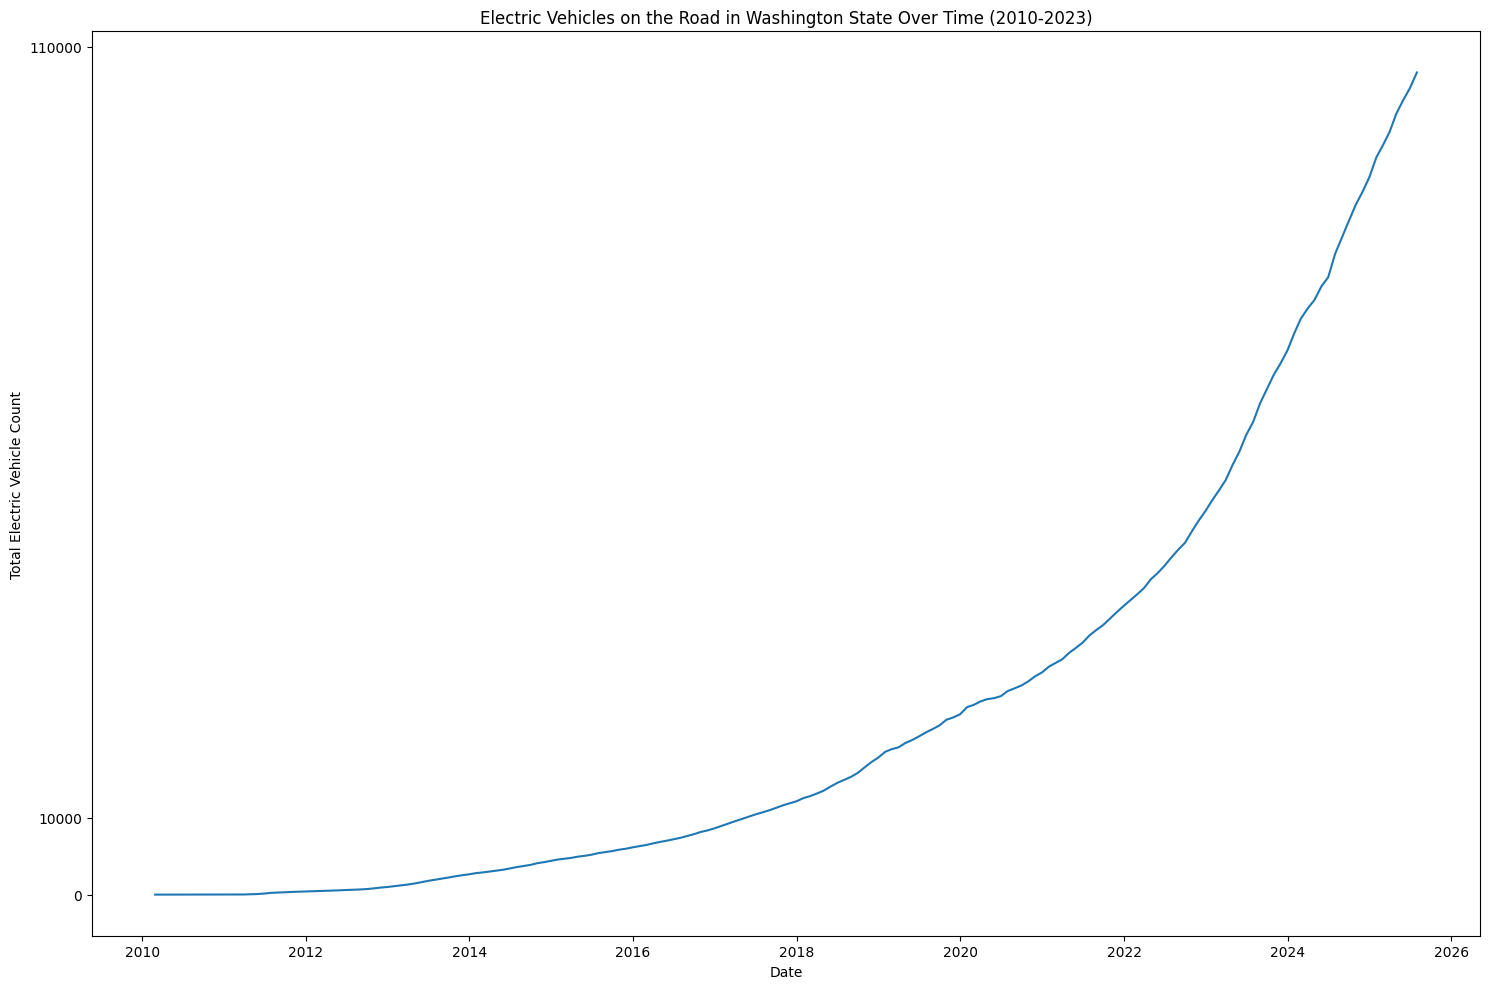

In [63]:
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(x="transaction_date", y="State Total", data=df_cumsum, ax=ax)
ax.set_xlabel("Date")
ax.set_ylabel("Total Electric Vehicle Count")
ax.set_title("Electric Vehicles on the Road in Washington State Over Time (2010-2023)")
ax.set_yticks((0, 110000, 10000))
plt.tight_layout()
plt.savefig("images/output_103_0.png", facecolor="white")

In [64]:
#Electric Vehicles on the Road Over Time by County

df["county"].value_counts()

county
King         95306
Clark        13059
Snohomish     6760
Kitsap        5566
Thurston      3907
Cowlitz       1195
Jefferson      866
Yakima         793
Island         348
Clallam        136
Stevens         61
Klickitat       58
Name: count, dtype: int64

In [65]:
#filterting for the top 10
top_ten_countries = ["King", "Clark", "Snohomish", "Kitsap", "Thurston", "Cowlitz", "Jefferson", "Yakima", "Island", "Clallam"]

In [66]:
df_cumsum

King  Jefferson    Clark  Kitsap  Thurston  Snohomish  \
transaction_date                                                             
2010-02-28            0.0        0.0      0.0       1       0.0        0.0   
2010-03-31            0.0        0.0      1.0       1       0.0        0.0   
2010-04-30            1.0        0.0      1.0       1       0.0        0.0   
2010-05-31            1.0        0.0      1.0       1       0.0        0.0   
2010-06-30            1.0        0.0      1.0       1       0.0        0.0   
...                   ...        ...      ...     ...       ...        ...   
2025-03-31        73901.0      583.0  10433.0    3978    2822.0     5364.0   
2025-04-30        75726.0      598.0  10687.0    4042    2881.0     5467.0   
2025-05-31        77074.0      613.0  10869.0    4106    2939.0     5529.0   
2025-06-30        78202.0      624.0  11059.0    4164    2992.0     5619.0   
2025-07-31        79647.0      633.0  11288.0    4243    3059.0     5751.0   

                  Yakima  Island  Cowlitz  Stevens  Clallam  Klickitat  \
transaction_date                                                         
2010-02-28           0.0     0.0      0.0      0.0      0.0        0.0   
2010-03-31           0.0     0.0      0.0      0.0      0.0        0.0   
2010-04-30           0.0     0.0      0.0      0.0      0.0        0.0   
2010-05-31           0.0     0.0      0.0      0.0      0.0        0.0   
2010-06-30           0.0     0.0      0.0      0.0      0.0        0.0   
...                  ...     ...      ...      ...      ...        ...   
2025-03-31         527.0   248.0    928.0     39.0     90.0       45.0   
2025-04-30         540.0   261.0    946.0     39.0     95.0       46.0   
2025-05-31         551.0   268.0    960.0     40.0     96.0       48.0   
2025-06-30         563.0   271.0    978.0     40.0     96.0       48.0   
2025-07-31         575.0   280.0   1013.0     44.0     97.0       49.0   

                  State Total  
transaction_date               
2010-02-28                1.0  
2010-03-31                2.0  
2010-04-30                3.0  
2010-05-31                3.0  
2010-06-30                3.0  
...                       ...  
2025-03-31            98958.0  
2025-04-30           101328.0  
2025-05-31           103093.0  
2025-06-30           104656.0  
2025-07-31           106679.0  

[186 rows x 13 columns]

In [67]:
df_cumsum = df_cumsum.reset_index()

In [68]:
df_cumsum = df_cumsum.loc[:, ["transaction_date", *top_ten_countries]]

In [69]:
df_cumsum

transaction_date     King    Clark  Snohomish  Kitsap  Thurston  Cowlitz  \
0         2010-02-28      0.0      0.0        0.0       1       0.0      0.0   
1         2010-03-31      0.0      1.0        0.0       1       0.0      0.0   
2         2010-04-30      1.0      1.0        0.0       1       0.0      0.0   
3         2010-05-31      1.0      1.0        0.0       1       0.0      0.0   
4         2010-06-30      1.0      1.0        0.0       1       0.0      0.0   
..               ...      ...      ...        ...     ...       ...      ...   
181       2025-03-31  73901.0  10433.0     5364.0    3978    2822.0    928.0   
182       2025-04-30  75726.0  10687.0     5467.0    4042    2881.0    946.0   
183       2025-05-31  77074.0  10869.0     5529.0    4106    2939.0    960.0   
184       2025-06-30  78202.0  11059.0     5619.0    4164    2992.0    978.0   
185       2025-07-31  79647.0  11288.0     5751.0    4243    3059.0   1013.0   

     Jefferson  Yakima  Island  Clallam  
0          0.0     0.0     0.0      0.0  
1          0.0     0.0     0.0      0.0  
2          0.0     0.0     0.0      0.0  
3          0.0     0.0     0.0      0.0  
4          0.0     0.0     0.0      0.0  
..         ...     ...     ...      ...  
181      583.0   527.0   248.0     90.0  
182      598.0   540.0   261.0     95.0  
183      613.0   551.0   268.0     96.0  
184      624.0   563.0   271.0     96.0  
185      633.0   575.0   280.0     97.0  

[186 rows x 11 columns]

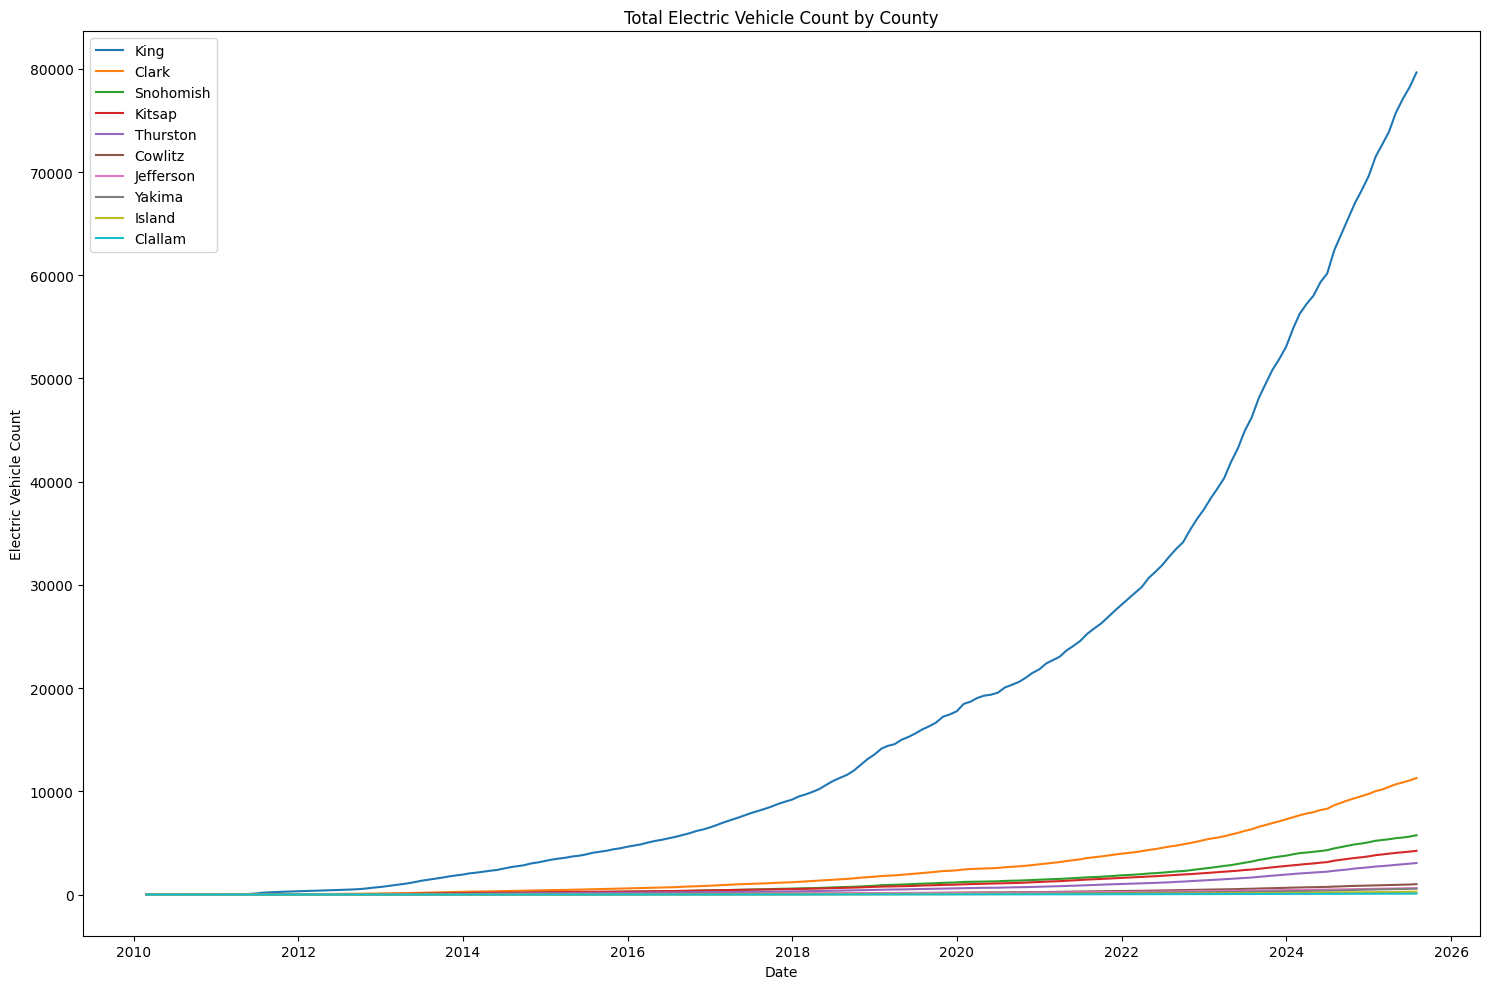

In [70]:
#ploting county trends
fig, ax = plt.subplots(figsize=(15,10))
for county in top_ten_countries:
    sns.lineplot(x="transaction_date", y=county, data= df_cumsum, ax =ax, label=county)
ax.set_xlabel("Date")
ax.set_ylabel("Electric Vehicle Count")
ax.set_title("Total Electric Vehicle Count by County")
plt.tight_layout()
plt.savefig("images/output_110_0.png", facecolor="white")

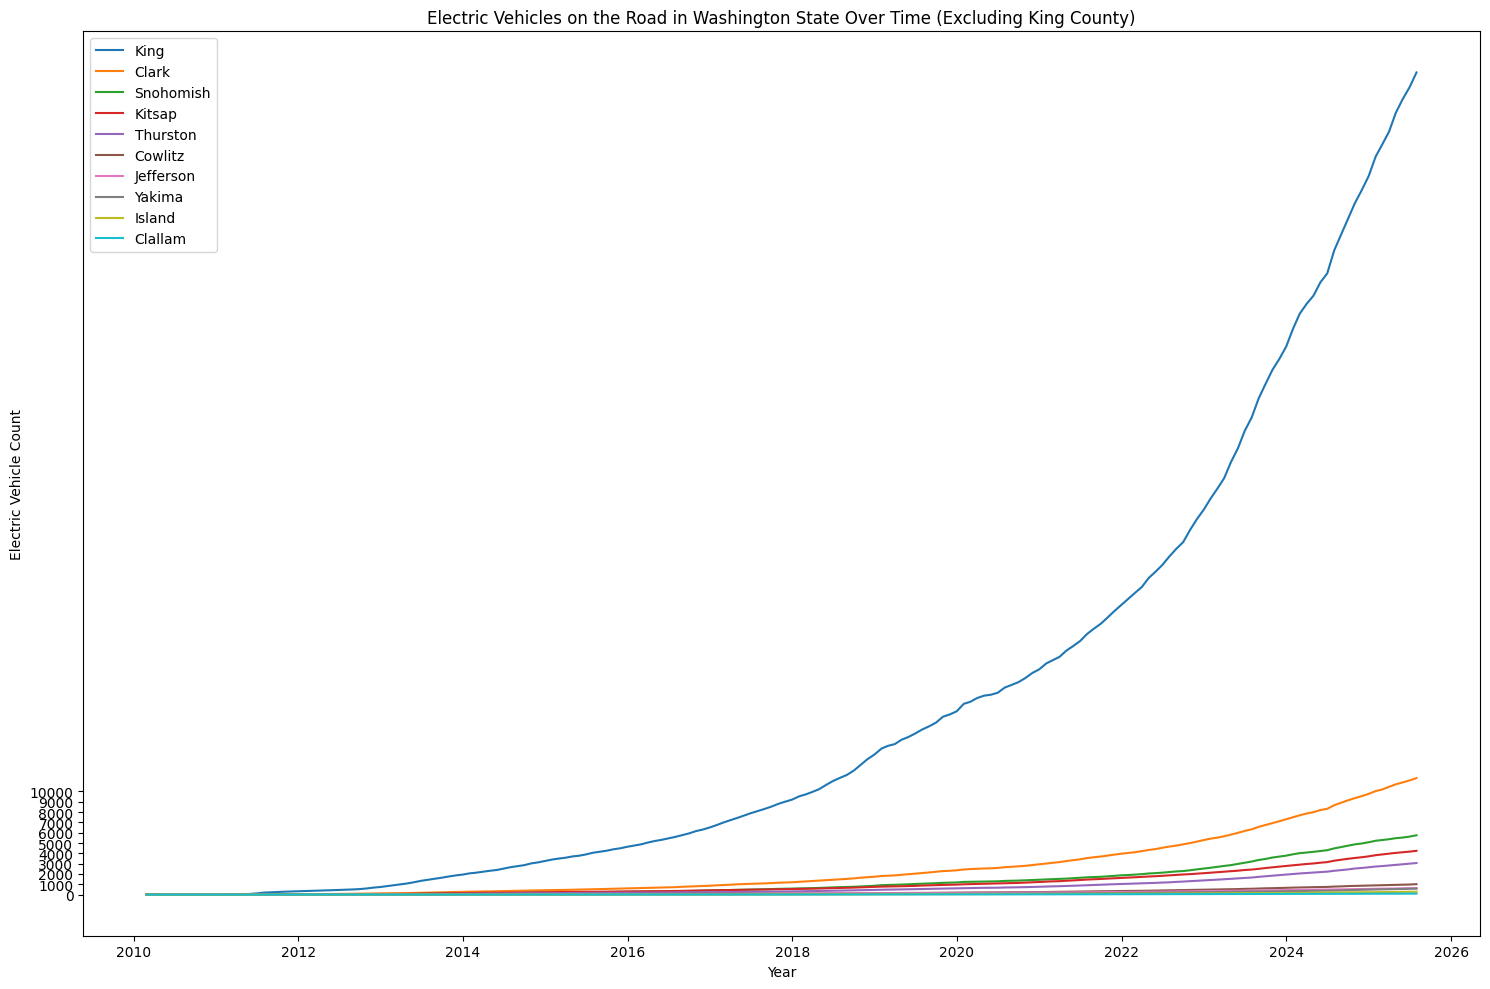

In [71]:
## ELectric Vehicles on the Road Over Time (Excluding King County)
#top_ten_countries.remove("King")

fig, ax = plt.subplots(figsize=(15,10))
for county in top_ten_countries:
    sns.lineplot(x="transaction_date", y=county, data=df_cumsum, ax=ax, label=county)
    
ax.set_xlabel("Year")
ax.set_ylabel("Electric Vehicle Count")
ax.set_title("Electric Vehicles on the Road in Washington State Over Time (Excluding King County)")
ax.set_yticks(range(0,11000,1000))
ax.legend()
plt.tight_layout()
plt.savefig("images/output_113_1.png", facecolor="white")

In [72]:
top_ten_countries += ["King"]

In [73]:
#Most purchased car models per county
def model_counts_by_county(df=df, top_n=10, county_list=top_ten_countries):
    fig, ax = plt.subplots(figsize=(10,60), nrows=len(county_list))
    for i, county in enumerate(county_list):
        df_county = df[(df["county"]==county) &
                       (df["transaction_type"]== "Original Title")]
        model_count_df =pd.DataFrame(df_county["model"].value_counts()).reset_index()
        model_count_df.columns = ["model", "count"]
        sns.barplot(x="model", y="count", data=model_count_df.head(top_n), ax=ax[i], palette="tab10")
        ax[i].set_title(f'Top {top_n} Most Purchased Models in {county} County (2010-2023)')
    plt.tight_layout();
    

C:\Users\Ali Sawah\AppData\Local\Temp\ipykernel_15812\3062239271.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="model", y="count", data=model_count_df.head(top_n), ax=ax[i], palette="tab10")
C:\Users\Ali Sawah\AppData\Local\Temp\ipykernel_15812\3062239271.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="model", y="count", data=model_count_df.head(top_n), ax=ax[i], palette="tab10")
C:\Users\Ali Sawah\AppData\Local\Temp\ipykernel_15812\3062239271.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="model", y="count", data=model

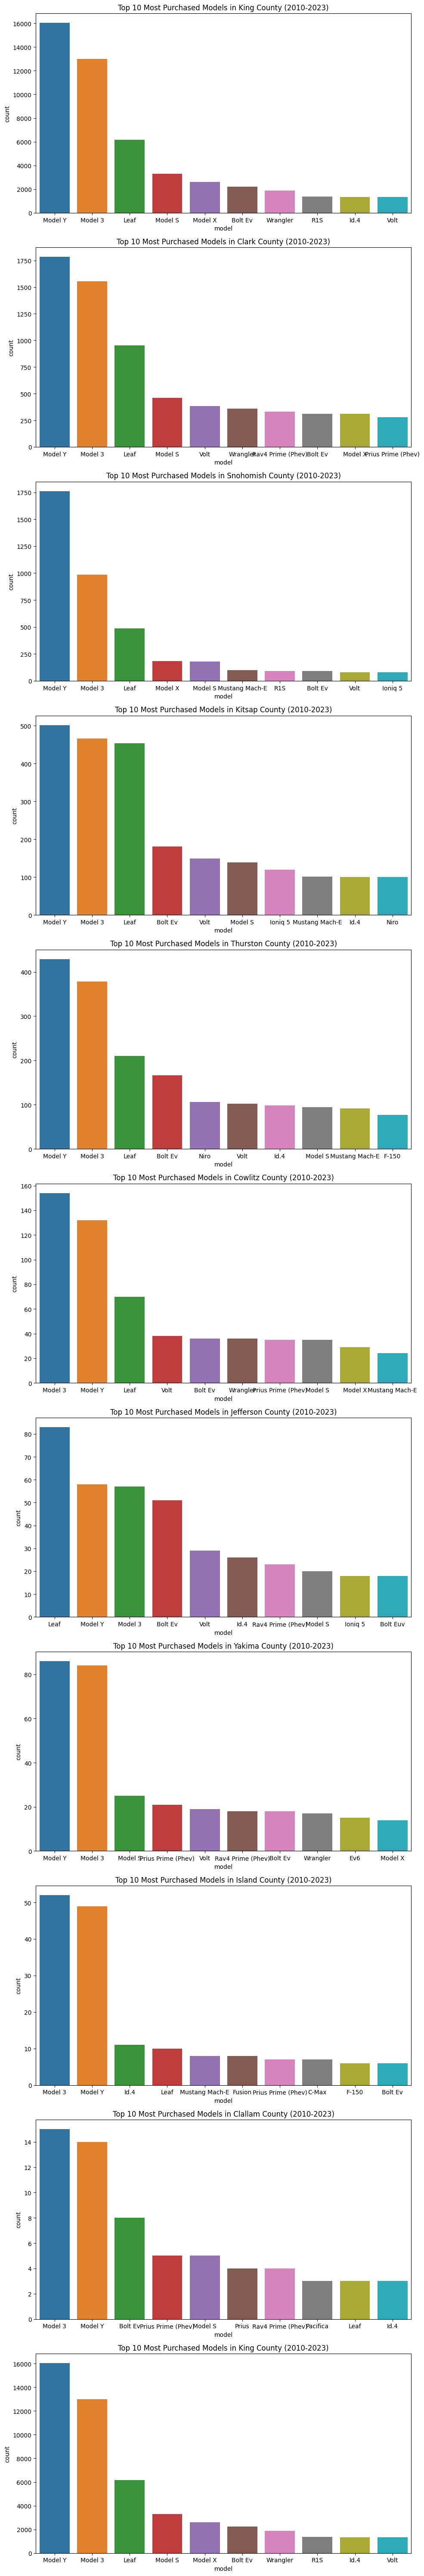

In [74]:
model_counts_by_county()
plt.savefig("images/output_119_0.png", facecolor="white")

In [75]:
# Model
#Preprocessing/Defining Functions
df_cumsum = df_cumsum.set_index("transaction_date").resample("M").asfreq()

C:\Users\Ali Sawah\AppData\Local\Temp\ipykernel_15812\687070202.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_cumsum = df_cumsum.set_index("transaction_date").resample("M").asfreq()


In [76]:
df_cumsum

King    Clark  Snohomish  Kitsap  Thurston  Cowlitz  \
transaction_date                                                           
2010-02-28            0.0      0.0        0.0       1       0.0      0.0   
2010-03-31            0.0      1.0        0.0       1       0.0      0.0   
2010-04-30            1.0      1.0        0.0       1       0.0      0.0   
2010-05-31            1.0      1.0        0.0       1       0.0      0.0   
2010-06-30            1.0      1.0        0.0       1       0.0      0.0   
...                   ...      ...        ...     ...       ...      ...   
2025-03-31        73901.0  10433.0     5364.0    3978    2822.0    928.0   
2025-04-30        75726.0  10687.0     5467.0    4042    2881.0    946.0   
2025-05-31        77074.0  10869.0     5529.0    4106    2939.0    960.0   
2025-06-30        78202.0  11059.0     5619.0    4164    2992.0    978.0   
2025-07-31        79647.0  11288.0     5751.0    4243    3059.0   1013.0   

                  Jefferson  Yakima  Island  Clallam  
transaction_date                                      
2010-02-28              0.0     0.0     0.0      0.0  
2010-03-31              0.0     0.0     0.0      0.0  
2010-04-30              0.0     0.0     0.0      0.0  
2010-05-31              0.0     0.0     0.0      0.0  
2010-06-30              0.0     0.0     0.0      0.0  
...                     ...     ...     ...      ...  
2025-03-31            583.0   527.0   248.0     90.0  
2025-04-30            598.0   540.0   261.0     95.0  
2025-05-31            613.0   551.0   268.0     96.0  
2025-06-30            624.0   563.0   271.0     96.0  
2025-07-31            633.0   575.0   280.0     97.0  

[186 rows x 10 columns]

In [77]:
df_cumsum.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 186 entries, 2010-02-28 to 2025-07-31
Freq: ME
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   King       186 non-null    float64
 1   Clark      186 non-null    float64
 2   Snohomish  186 non-null    float64
 3   Kitsap     186 non-null    int64  
 4   Thurston   186 non-null    float64
 5   Cowlitz    186 non-null    float64
 6   Jefferson  186 non-null    float64
 7   Yakima     186 non-null    float64
 8   Island     186 non-null    float64
 9   Clallam    186 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 16.0 KB


In [78]:
# Separating Data for each county
def separate_data_by_county(county, df):
    df_county = pd.DataFrame(df.loc[:, county])
    df_county.columns = ["EV's on the Road"]
    df_county.head()
    return df_county

In [79]:
#Separating data by county and parsing this information to a dictionary
county_information = {}
for county in top_ten_countries:
    county_information[county] = {}
    county_information[county]["df"] = separate_data_by_county(county, df_cumsum)

In [80]:
#Separating data by county and parsing this information to a dictionary
county_dfs = {}
for county in top_ten_countries:
    county_dfs[county] = separate_data_by_county(county, df_cumsum)

In [81]:
#Functionizing the Evaluation of Models
def evaluate_model(model):
    display(model.summary())
    model.plot_diagnostics()
    plt.tight_layout()

In [82]:
#Creatinga a function for train-test-split & Plotting
def train_test_split_ts(df, train_size, test_size):
    train_end_idx = int(round(len(df)*train_size, 0))
    train_set = df.iloc[0:train_end_idx, :]["EV's on the Road"]
    test_set = df.iloc[train_end_idx:, :]["EV's on the Road"]
    return train_set, test_set

In [83]:
#function to visulize these splits
def plot_train_test_split(train_data, test_data, county):
    train_data.plot(label="Train Data")
    test_data.plot(label="Test Data")
    ax=plt.gca()
    ax.set_xlabel("Year")
    ax.set_ylabel("Electric Vehicle on the Road")
    ax.set_title(f"Electic Vehicles on the Road in {county} County")
    ax.legend()

In [84]:
#Creating a function for getting forecasts.
def get_forecast(model, train_data, test_data, plot=True):
    #Create a dataframe with the forecast information
    forecast_df = model.get_forecast(steps=len(test_data)).conf_int()
    forecast_df.columns=["Lower Confidence Interval", "Upper Confidence Interval"]
    forecast_df["forecasts"] = model.get_forecast(steps=len(test_data)).predicted_mean
    #Plotting
    if plot==True:
            sns.set_style("whitegrid")
            fig, ax = plt.subplots(figsize=(15,10))
            sns.lineplot(data=train_data, color="black", ax=ax)
            sns.lineplot(data=forecast_df, x=forecast_df.index,
                         y="forecasts", color="blue", ax=ax, label="Forecasted Data", ls="--")
            sns.lineplot(data=test_data, color="purple", ax=ax, label="Acutal Data", ls="-.")
            ax.fill_between(forecast_df.index,
                            y1=forecast_df["Lower Confidence Interval"],
                            y2=forecast_df["Upper Confidence Interval"],
                            color="green", alpha=0.3,
                            label="Confidence Interval")
            ax.set_xlabel("Year")
            ax.legend(loc=2)
            plt.show()
            
    return forecast_df

In [85]:
##Defining a function for getting predictions for fututre
#Creating a df with the prediction information
def get_predictions(model, df, test_data, county_name, plot=True):
    prediction_df = model.get_forecast(steps=len(test_data)).conf_int()
    prediction_df.columns=["Lower Confidence Interval", "Upper Confidence Interval"]
    prediction_df["Predictions"] = model.get_forecast(steps=len(test_data)).predicted_mean
    #plotting
    if plot==True:
            sns.set_style("whitegrid")
            fix, ax = plt.subplots(figsize=(15,10))
            sns.lineplot(data=df, ax=ax)
            sns.lineplot(data=prediction_df, x=prediction_df.index, y="Predictions", color="orange", label="Predicted Data", ls='--')
            ax.fill_between(prediction_df.index,
                            y1=prediction_df["Lower Confidence Interval"],
                            y2=prediction_df["Upper Confidence Interval"],
                            color="green", alpha=0.3, label="Confidence Interval")
            ax.set_xlabel("Year")
            ax.set_ylabel("Electric Vehicle on the Road")
            ax.set_title(f"Electric Vehicles on the Road in {county_name} County")
            plt.show()
    return prediction_df


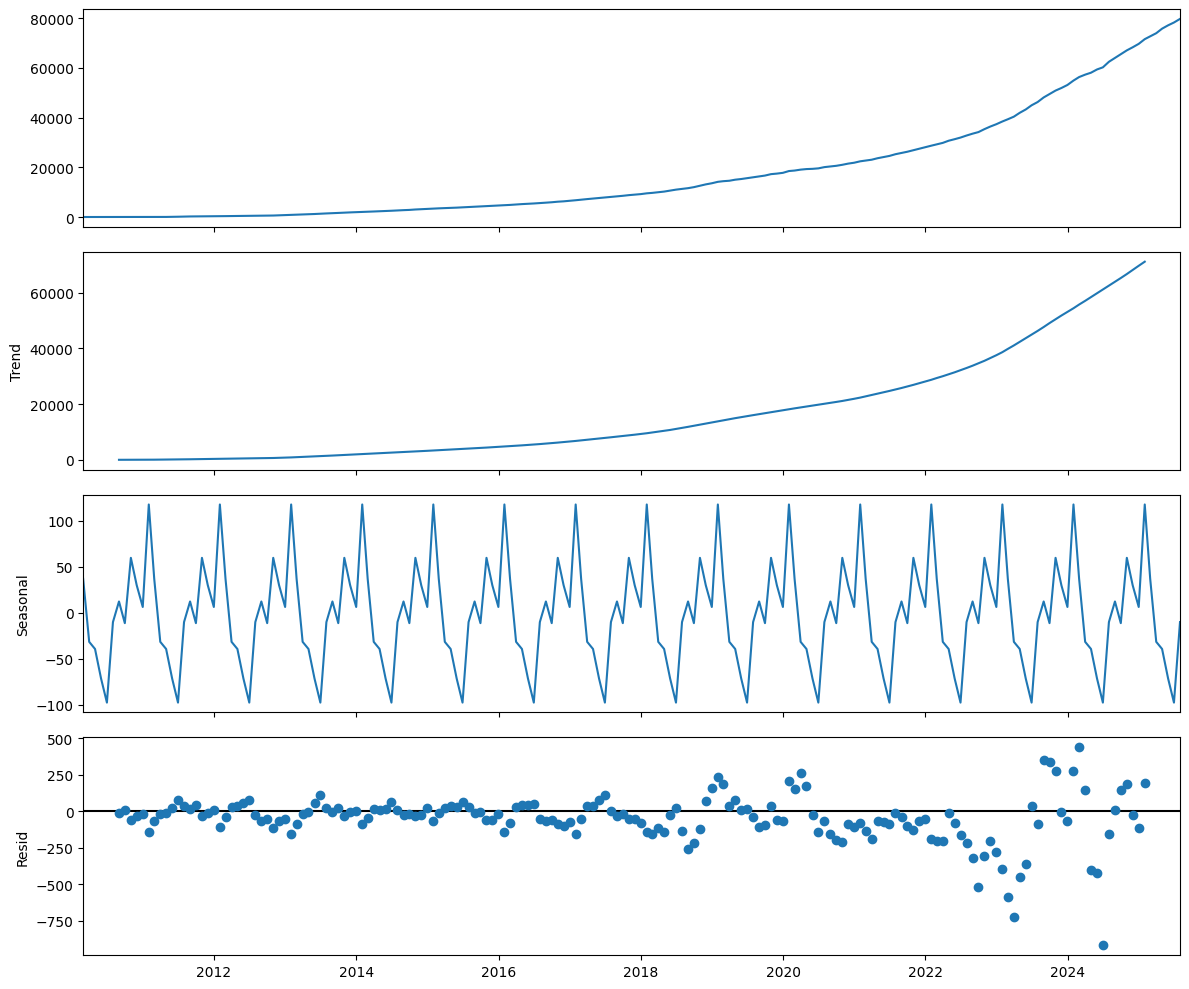

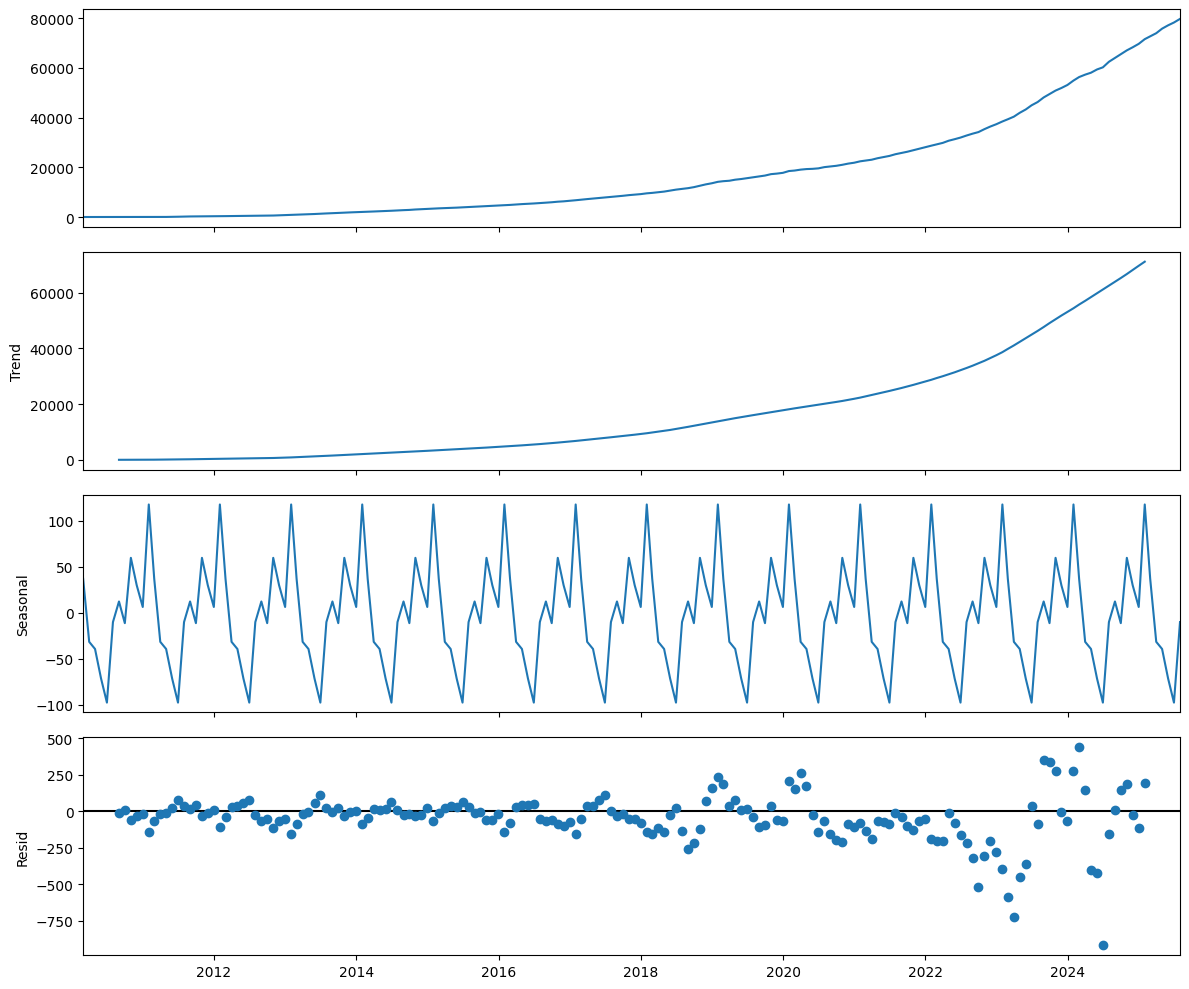

In [86]:
#King county Seasonability check
import statsmodels.tsa.api as tsa

plt.rcParams["figure.figsize"] = (12,10)
decomp = tsa.seasonal_decompose(county_information["King"]["df"])
decomp.plot()

In [87]:
#Train_Test_Split
#Spliting dataset into train and test sets for validation
train_king, test_king =train_test_split_ts(county_information["King"]["df"], 0.8,0.2)

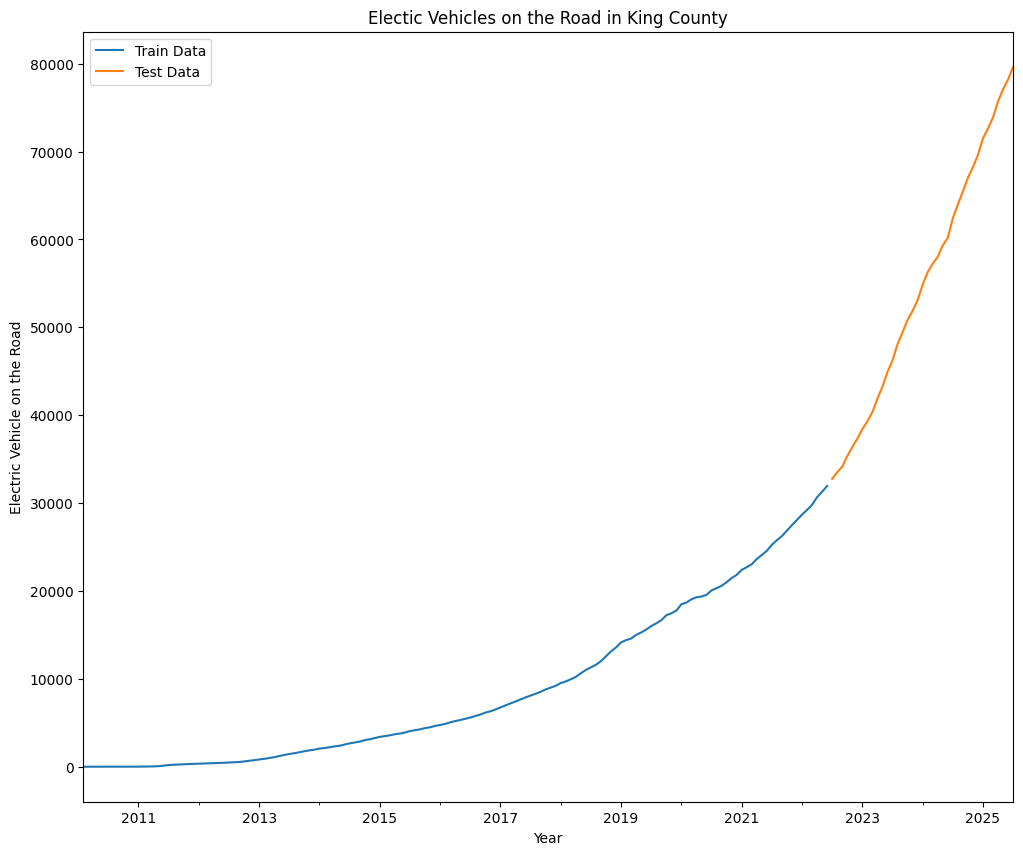

In [88]:
plot_train_test_split(train_king, test_king, 'King')

In [89]:
#Finding Best Parameters with Auto-Arima
import pmdarima as pm

auto_model = pm.auto_arima(train_king, start_p=0, start_q=0, max_p=4,
                           max_d=3, max_q=4, start_P=0, start_Q=0, max_P=3,
                           max_D=3, max_Q=3, m=12)
auto_model.summary()

c:\Users\Ali Sawah\Desktop\forecasting EV adoption and charging demand in Washington State\.venv_2\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Ali Sawah\Desktop\forecasting EV adoption and charging demand in Washington State\.venv_2\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Ali Sawah\Desktop\forecasting EV adoption and charging demand in Washington State\.venv_2\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Ali Sawah\Desktop\forecasting EV adoption and charging demand in Washington State\.venv_2\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite'

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  149
Model:             SARIMAX(0, 2, 1)x(1, 0, [], 12)   Log Likelihood                -851.028
Date:                             Tue, 19 Aug 2025   AIC                           1710.055
Time:                                     21:16:33   BIC                           1722.017
Sample:                                 02-28-2010   HQIC                          1714.916
                                      - 06-30-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.0208      1.952      1.547      0.122      -0.806       6.847
ma.L1         -0.7056      0.045    -15.624      0.000      -0.794      -0.617
ar.S.L12       0.3972      0.051      7.759      0.000       0.297       0.497
sigma2      6137.9030    426.149     14.403      0.000    5302.666    6973.140
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               131.96
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):              36.74   Skew:                             0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                   EV's on the Road   No. Observations:                  149
Model:             SARIMAX(0, 2, 1)x(1, 0, 1, 12)   Log Likelihood                -776.116
Date:                            Tue, 19 Aug 2025   AIC                           1560.231
Time:                                    21:16:34   BIC                           1571.792
Sample:                                02-28-2010   HQIC                          1564.929
                                     - 06-30-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6747      0.055    -12.364      0.000      -0.782      -0.568
ar.S.L12       0.5570      0.200      2.785      0.005       0.165       0.949
ma.S.L12      -0.1136      0.187     -0.606      0.544      -0.481       0.254
sigma2      6845.3667    526.460     13.003      0.000    5813.524    7877.209
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                90.91
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):              28.30   Skew:                             0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

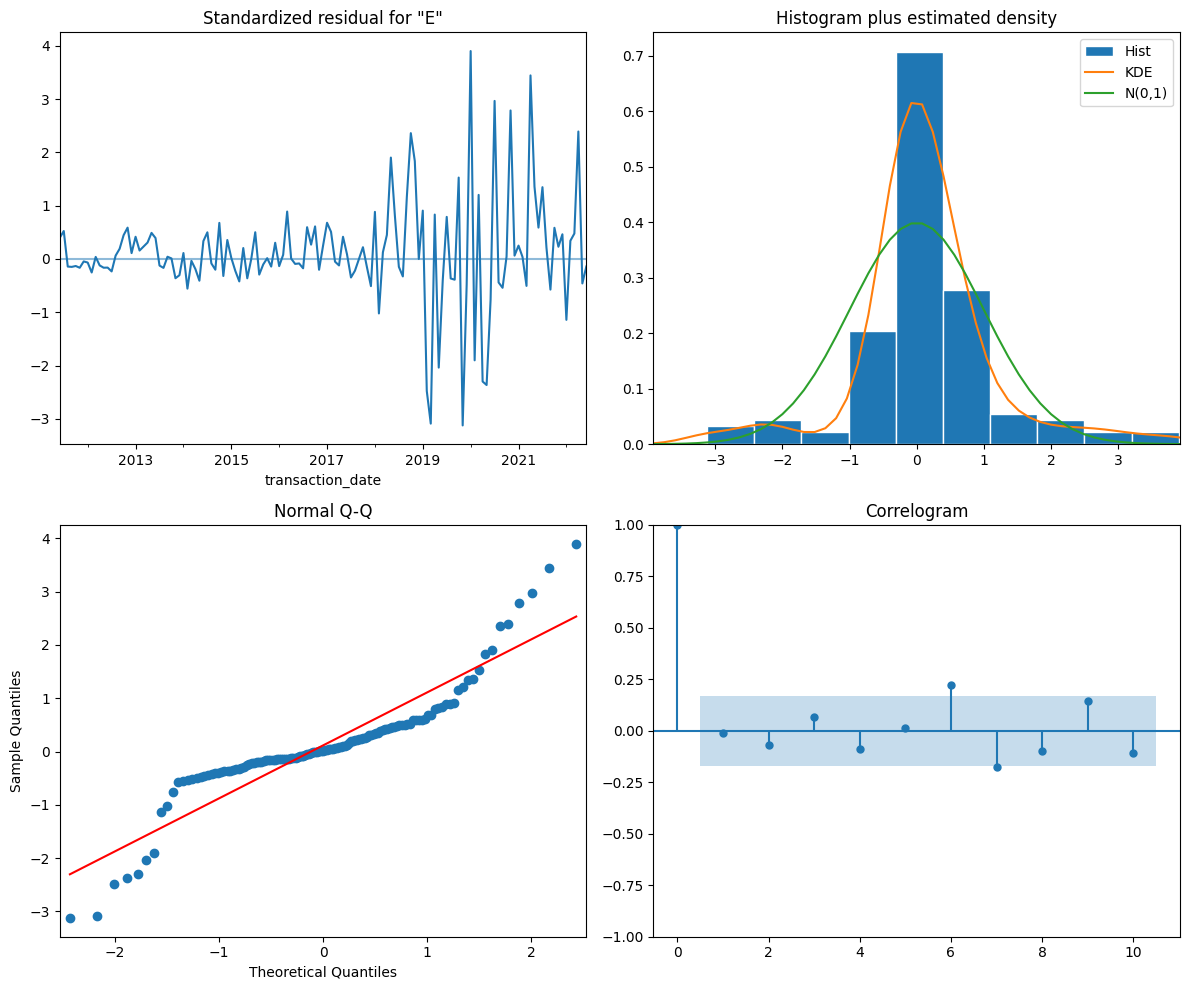

In [90]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_king, order=(0,2,1), seasonal_order=(1,0,1,12), enforce_invertibility=False, enforce_stationarity=False).fit()
evaluate_model(model)

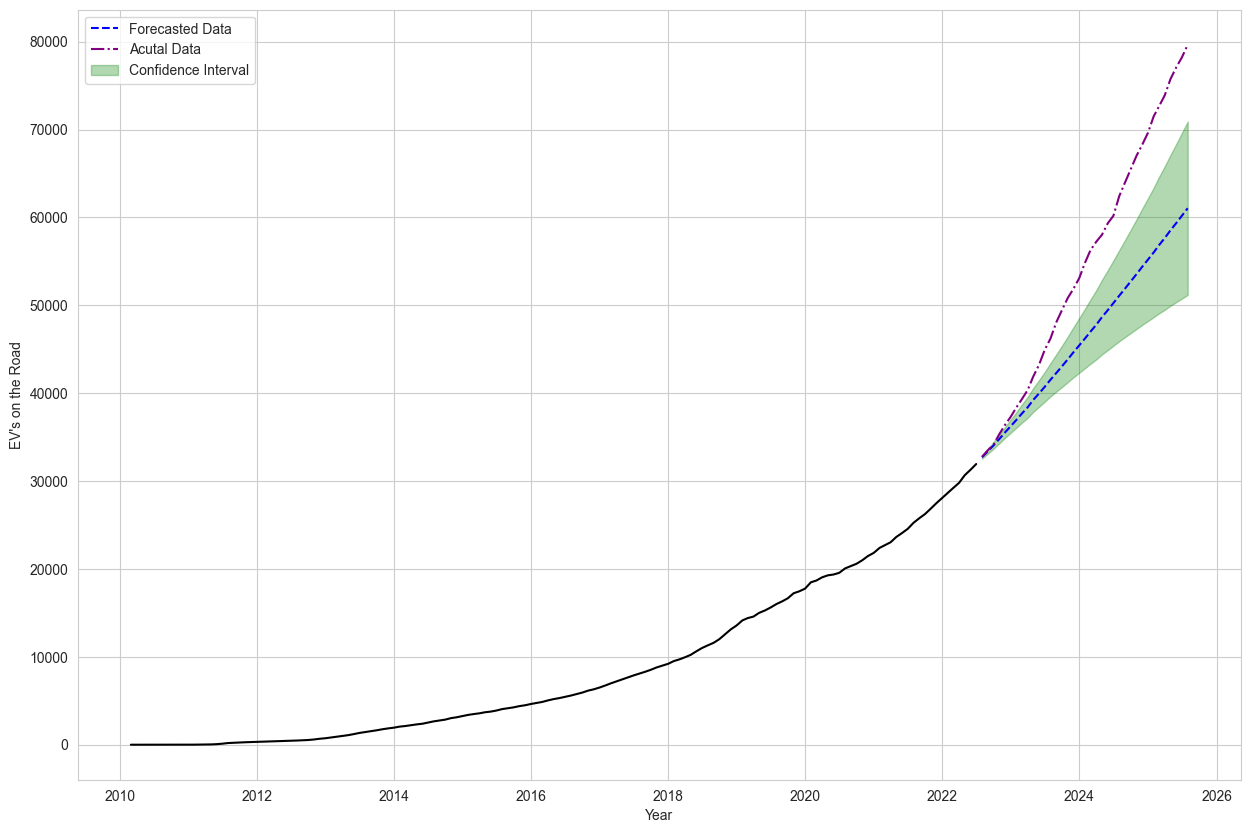

In [91]:
df_king_forecast = get_forecast(model, train_king, test_king, plot=True)

In [92]:
#Future Predictions
#fitting model to all abserved data
model = SARIMAX(county_information["King"]["df"], order=(1,1,0), seasonal_order=(0,1,0,12), enforce_invertibility=False, enforce_stationarity=False).fit()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                   EV's on the Road   No. Observations:                  186
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood               -1187.599
Date:                            Tue, 19 Aug 2025   AIC                           2379.198
Time:                                    21:16:35   BIC                           2385.493
Sample:                                02-28-2010   HQIC                          2381.752
                                     - 07-31-2025                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4599      0.037     12.395      0.000       0.387       0.533
sigma2      5.819e+04   2972.838     19.573      0.000    5.24e+04     6.4e+04
===================================================================================
Ljung-Box (L1) (Q):                   8.60   Jarque-Bera (JB):               551.50
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):             188.10   Skew:                             0.50
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

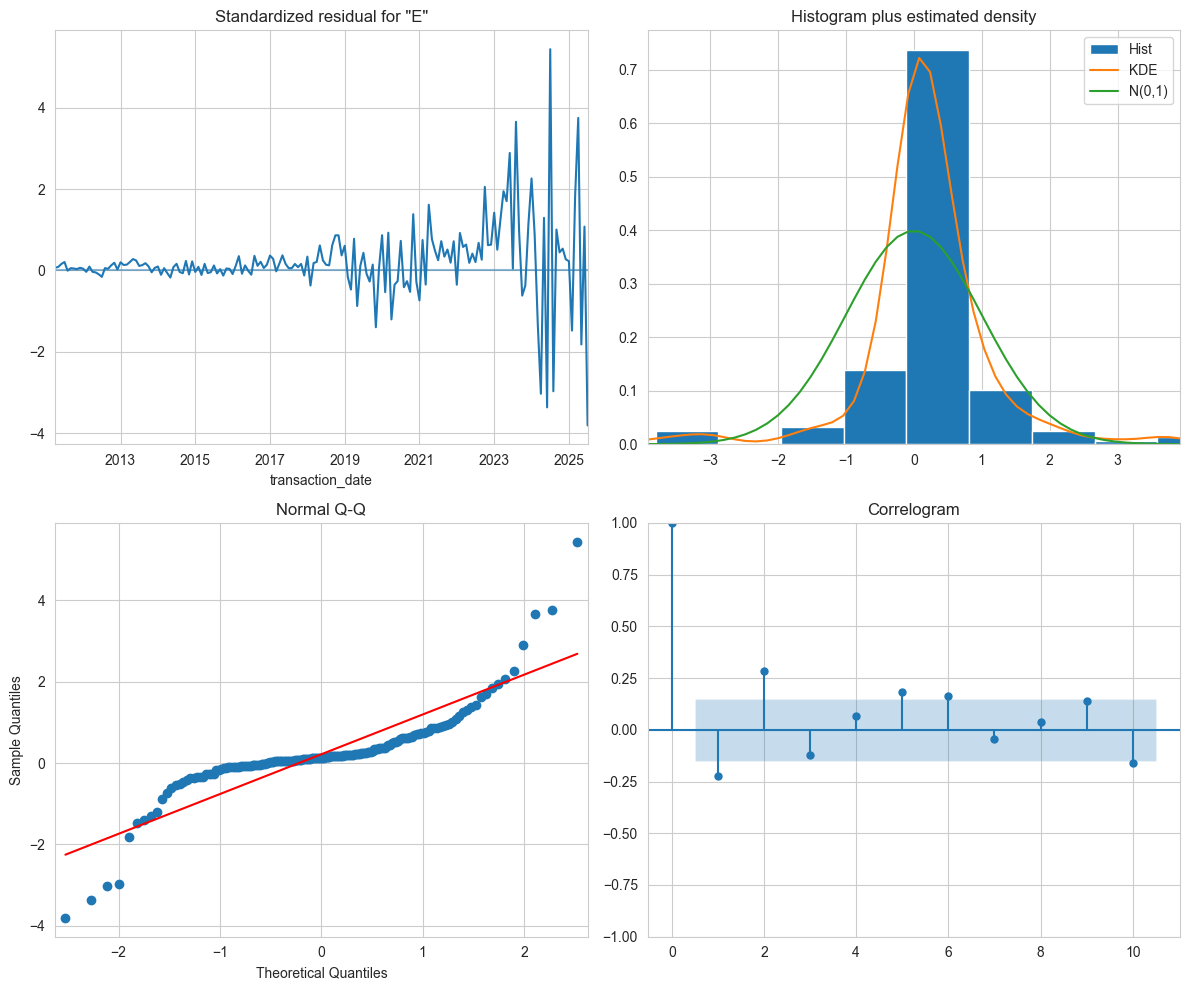

In [93]:
evaluate_model(model)

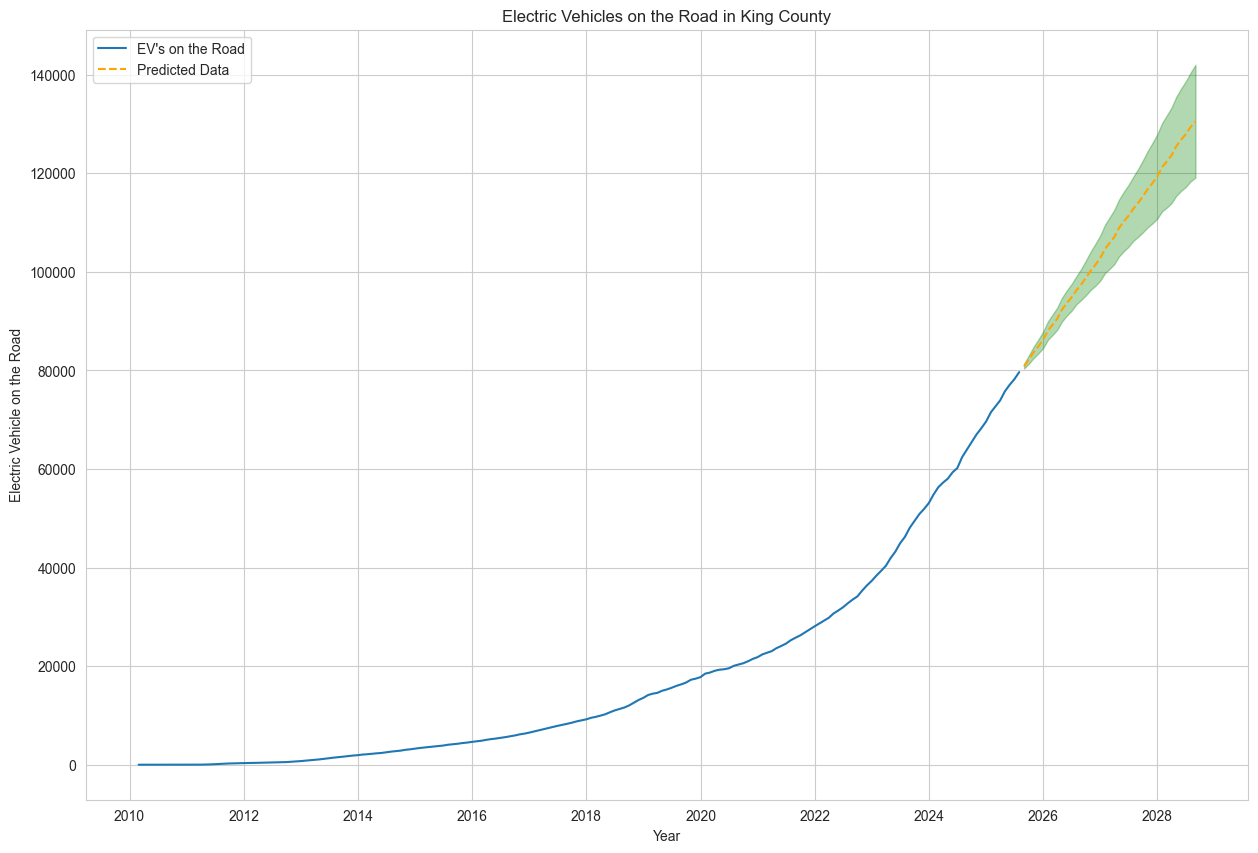

In [94]:
#Plotting & Saving Predictions
#creating a df of predictions and plotting
df_king_preds = get_predictions(model, county_information['King']["df"], test_king, "King", plot=True)

In [95]:
county_information["King"]

{'df':                   EV's on the Road
 transaction_date                  
 2010-02-28                     0.0
 2010-03-31                     0.0
 2010-04-30                     1.0
 2010-05-31                     1.0
 2010-06-30                     1.0
 ...                            ...
 2025-03-31                 73901.0
 2025-04-30                 75726.0
 2025-05-31                 77074.0
 2025-06-30                 78202.0
 2025-07-31                 79647.0
 
 [186 rows x 1 columns]}

In [96]:
#Saving predictions df to dict for later use
county_information["King"]["Predictions"] = df_king_preds

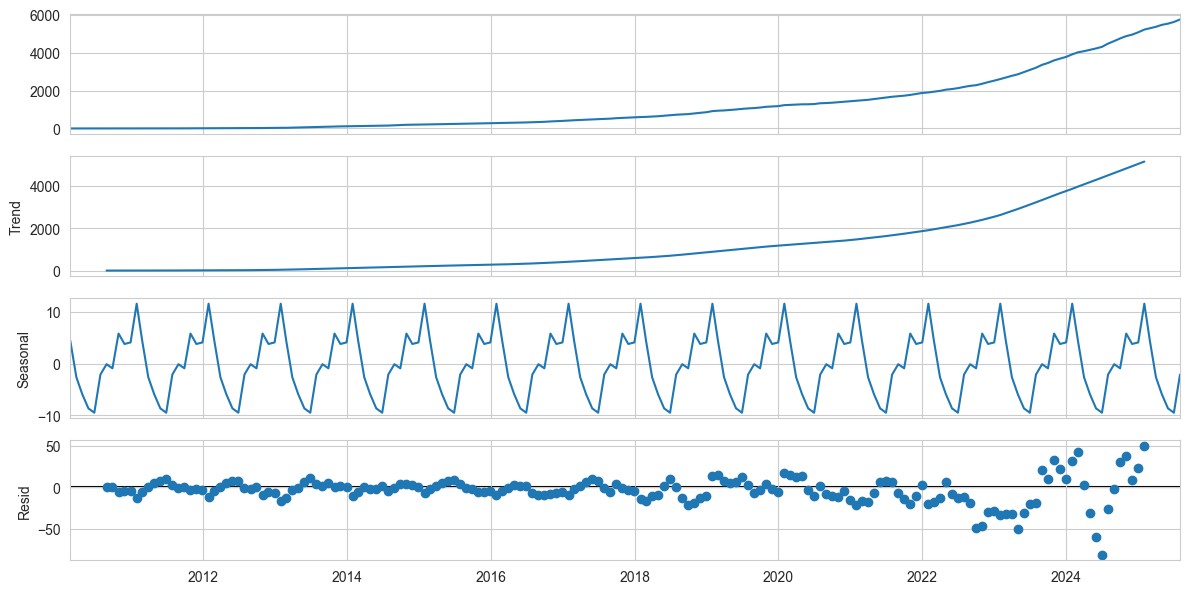

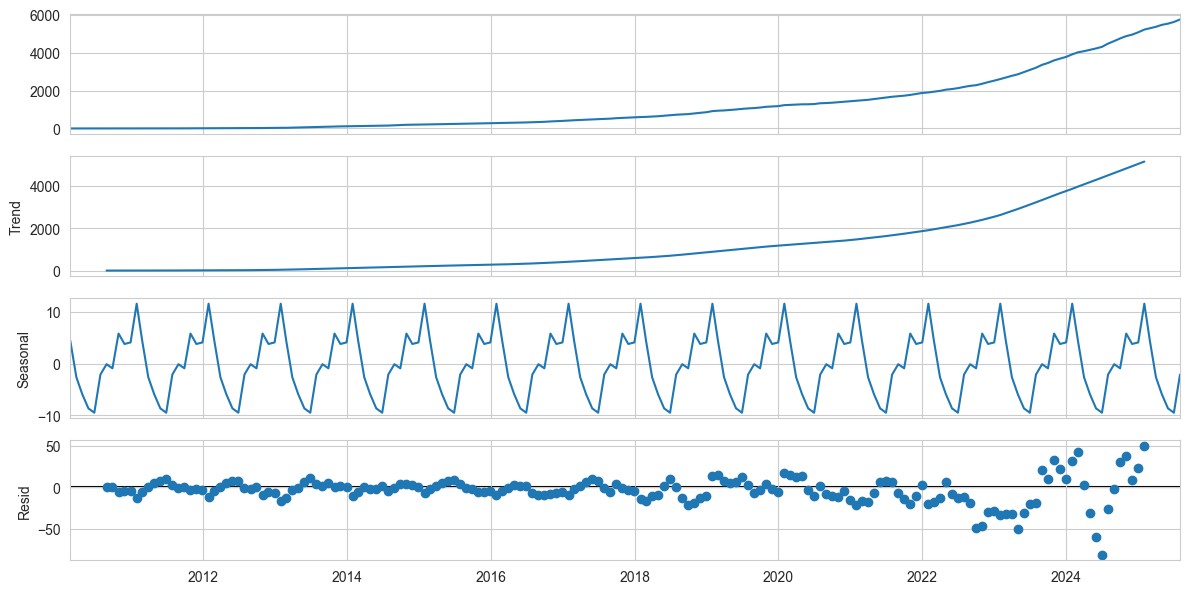

In [97]:
#Snohomish County
plt.rcParams["figure.figsize"] = (12,6)
decomp = tsa.seasonal_decompose(county_information["Snohomish"]["df"])
decomp.plot()

In [98]:
#Train_Test_split
#Splitting the dataset into train and test sets for validation
train_sno, test_sno = train_test_split_ts(county_information["Snohomish"]["df"], 0.75, 0.25)

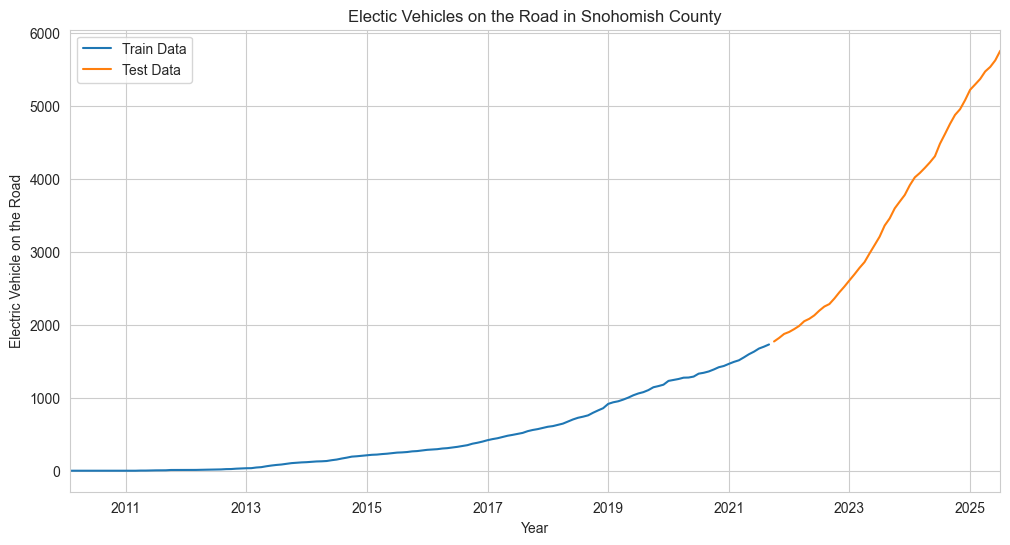

In [99]:
#Plotting_Train_Test sets
plot_train_test_split(train_sno, test_sno, "Snohomish")

In [100]:
#validate model with forecasts for test data
model = SARIMAX(train_sno, order=(1,1,1), seasonal_order=(1,0,1,12),
                enforce_invertibility=False, enforce_stationarity=False).fit()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                   EV's on the Road   No. Observations:                  140
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -423.836
Date:                            Tue, 19 Aug 2025   AIC                            857.672
Time:                                    21:16:37   BIC                            871.813
Sample:                                02-28-2010   HQIC                           863.416
                                     - 09-30-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0015      0.014     71.539      0.000       0.974       1.029
ma.L1         -0.7103      0.048    -14.762      0.000      -0.805      -0.616
ar.S.L12       0.5467      0.333      1.640      0.101      -0.107       1.200
ma.S.L12      -0.2435      0.342     -0.713      0.476      -0.913       0.426
sigma2        51.1964      4.165     12.291      0.000      43.032      59.360
===================================================================================
Ljung-Box (L1) (Q):                   0.51   Jarque-Bera (JB):                97.83
Prob(Q):                              0.47   Prob(JB):                         0.00
Heteroskedasticity (H):              15.90   Skew:                             0.91
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

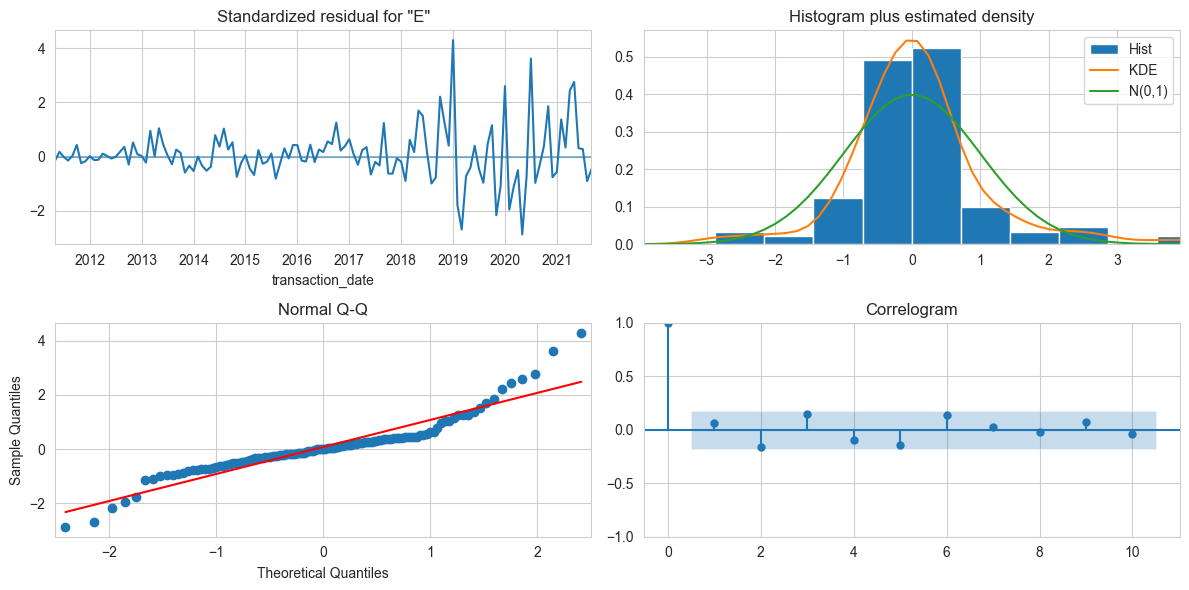

In [101]:
evaluate_model(model)

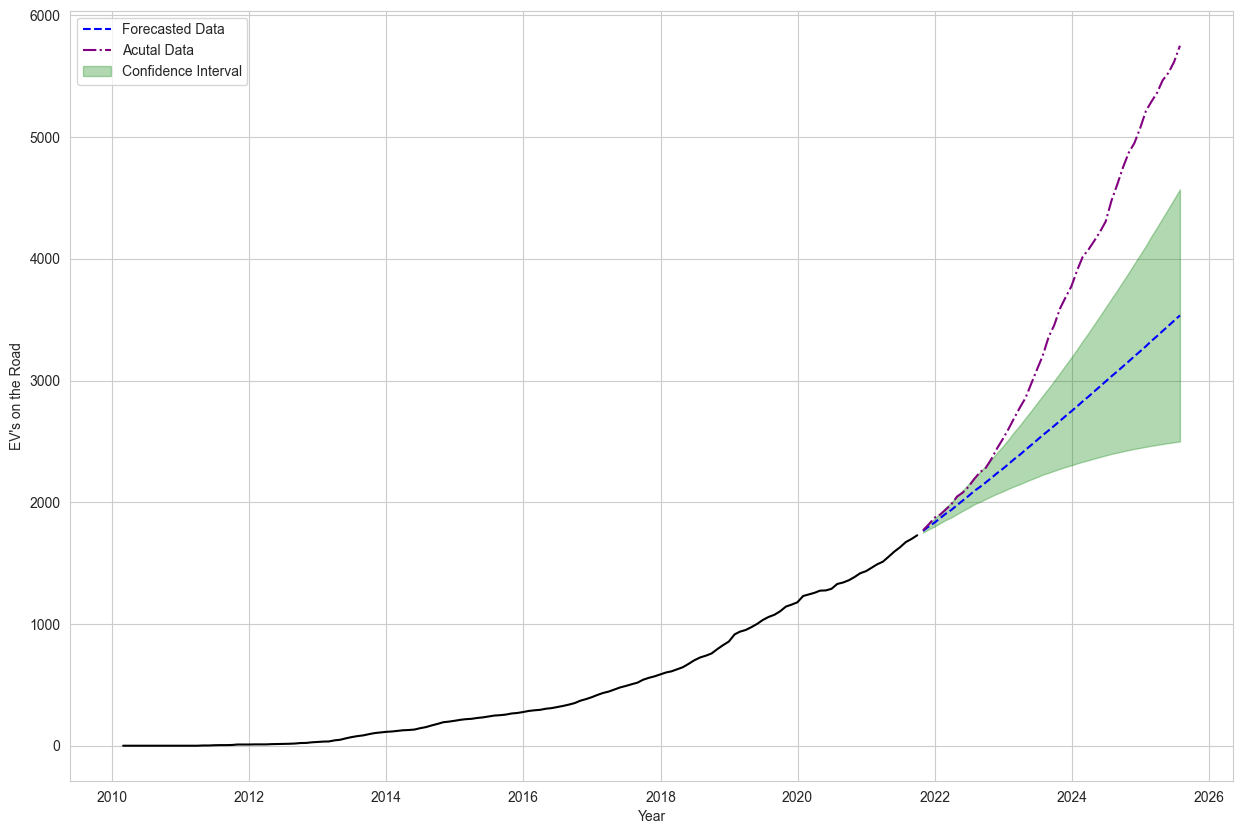

In [102]:
df_sno_forecast = get_forecast(model, train_sno, test_sno, plot=True)

In [103]:
#Future Predictions
#Fitting model to all observed data
model = SARIMAX(county_information["Snohomish"]["df"], order=(1,1,1), seasonal_order=(1,0,1,12), enforce_invertibility=False, enforce_stationarity=False).fit()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                   EV's on the Road   No. Observations:                  186
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -701.038
Date:                            Tue, 19 Aug 2025   AIC                           1412.075
Time:                                    21:16:39   BIC                           1427.784
Sample:                                02-28-2010   HQIC                          1418.449
                                     - 07-31-2025                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9996      0.008    131.973      0.000       0.985       1.014
ma.L1         -0.6671      0.042    -15.818      0.000      -0.750      -0.584
ar.S.L12       0.2527      0.267      0.947      0.344      -0.270       0.776
ma.S.L12       0.1619      0.229      0.706      0.480      -0.288       0.611
sigma2       212.3883     12.203     17.404      0.000     188.470     236.306
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):               421.19
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):              63.35   Skew:                             0.65
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

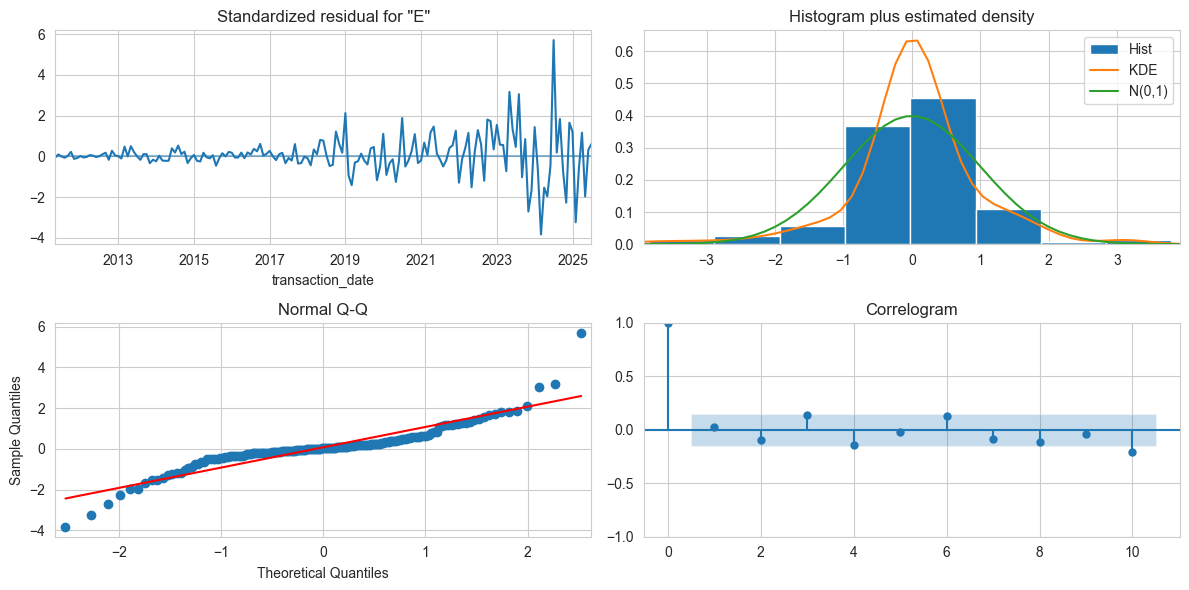

In [104]:
evaluate_model(model)

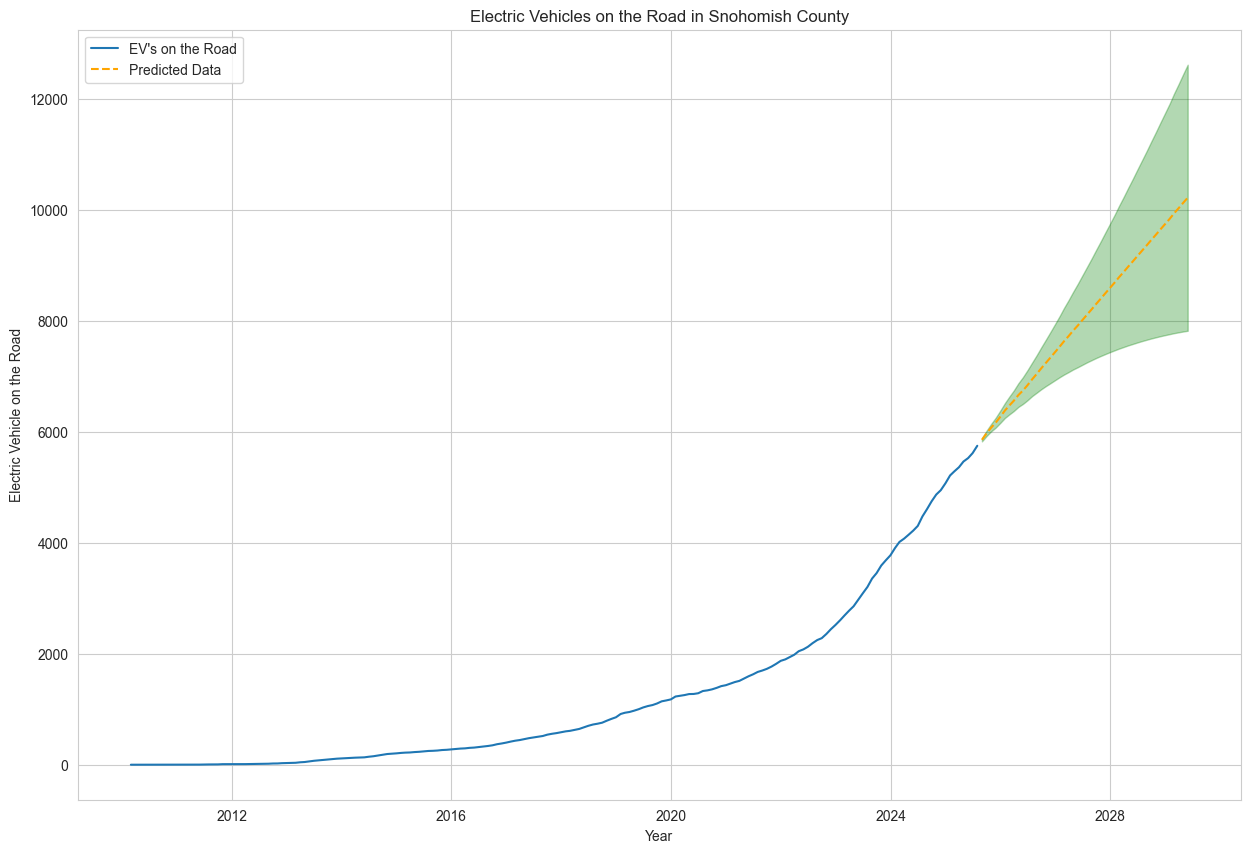

In [105]:
#Plotting and saving predictions
df_sno_preds = get_predictions(model, county_information["Snohomish"]["df"], test_sno, "Snohomish", plot=True)

In [106]:
#Saving_predictions
county_information["Snohomish"]["Predictions"] = df_sno_preds

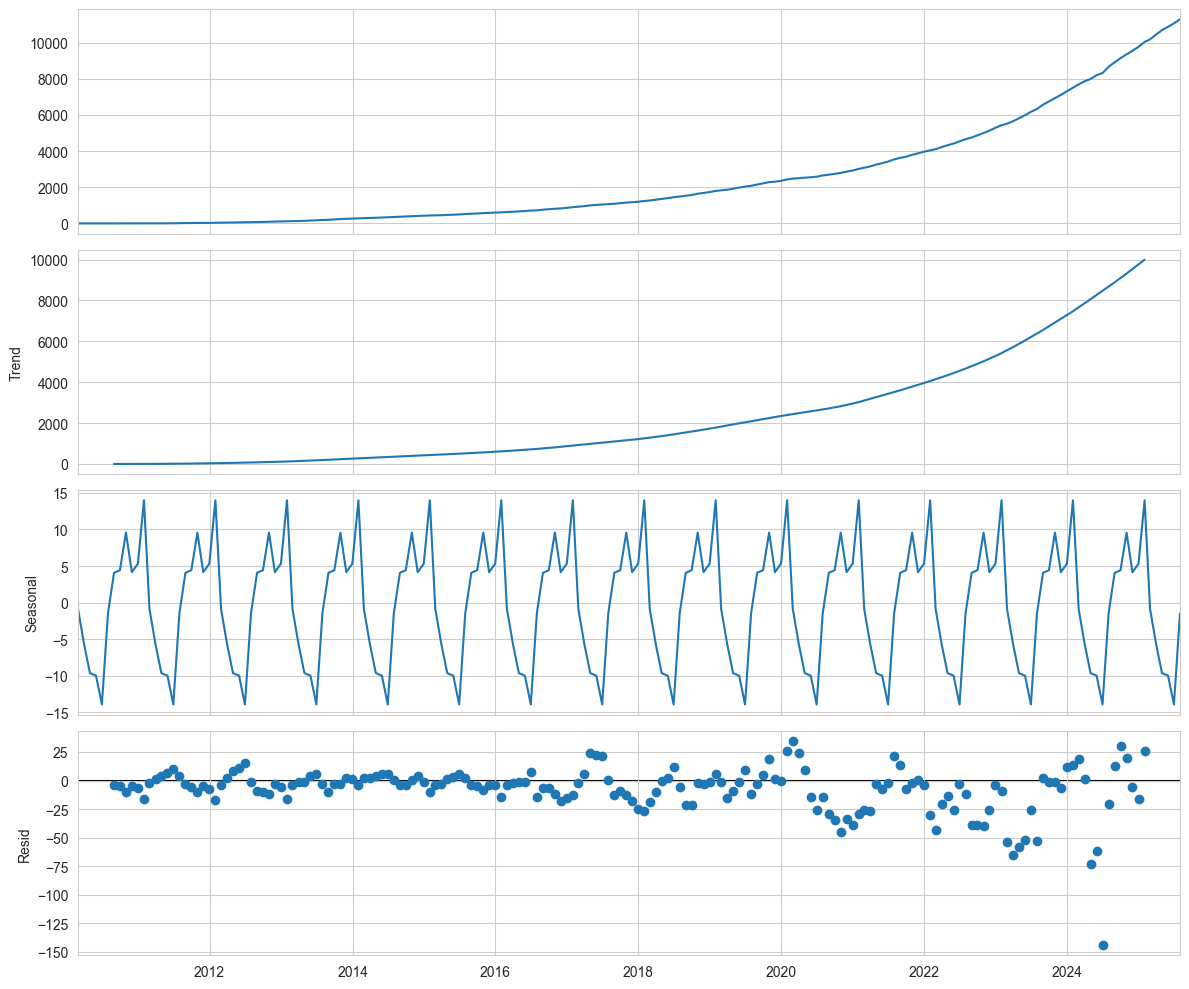

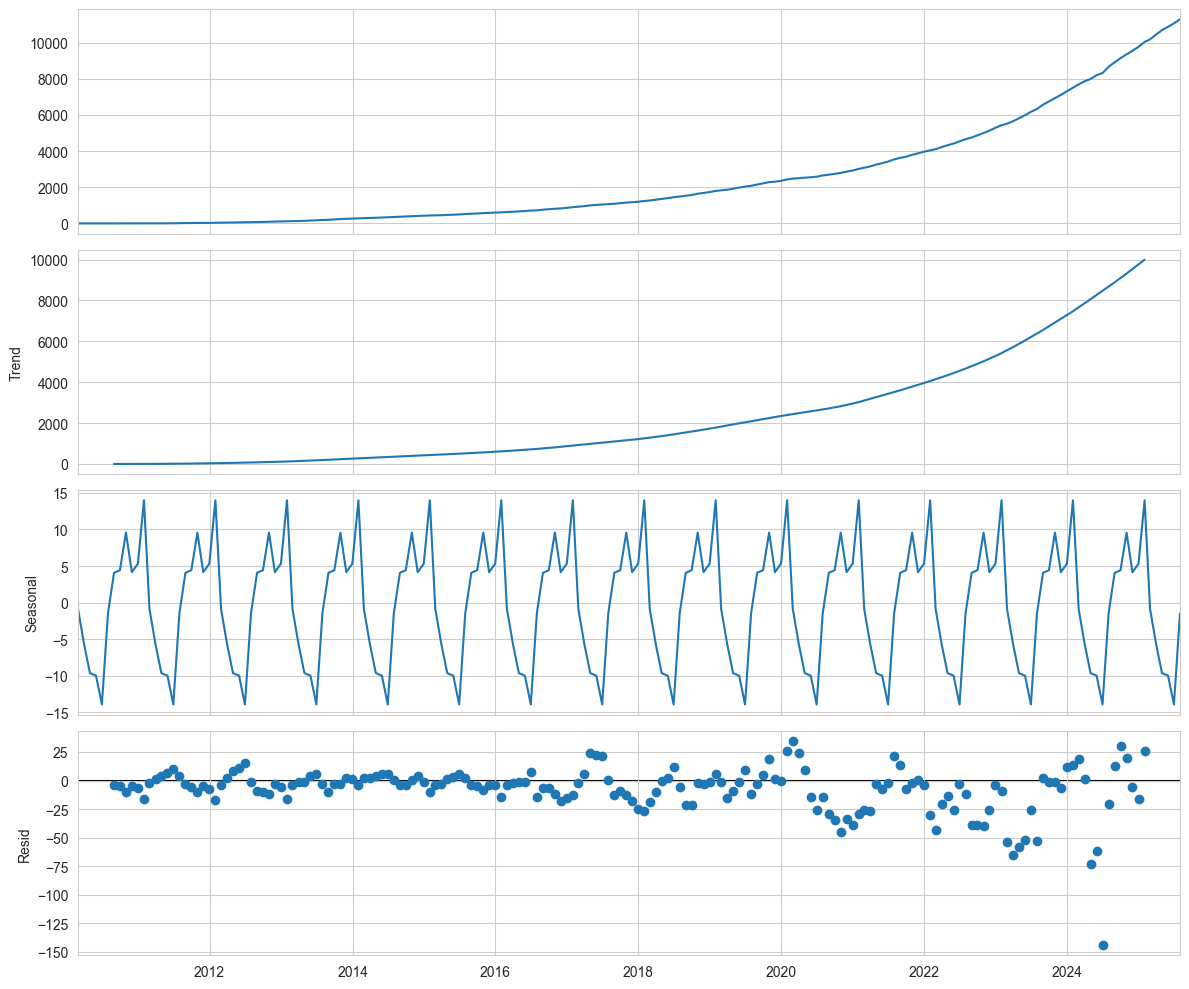

In [107]:
#Clark County
#Seasonality Check
plt.rcParams["figure.figsize"]=(12,10)
decomp = tsa.seasonal_decompose(county_information["Clark"]["df"])
decomp.plot()

In [108]:
#Train_Test_Split
#Spliting dataset into train and test sets for validation
train_clark, test_clark = train_test_split_ts(county_information["Clark"]["df"],0.75,0.25)

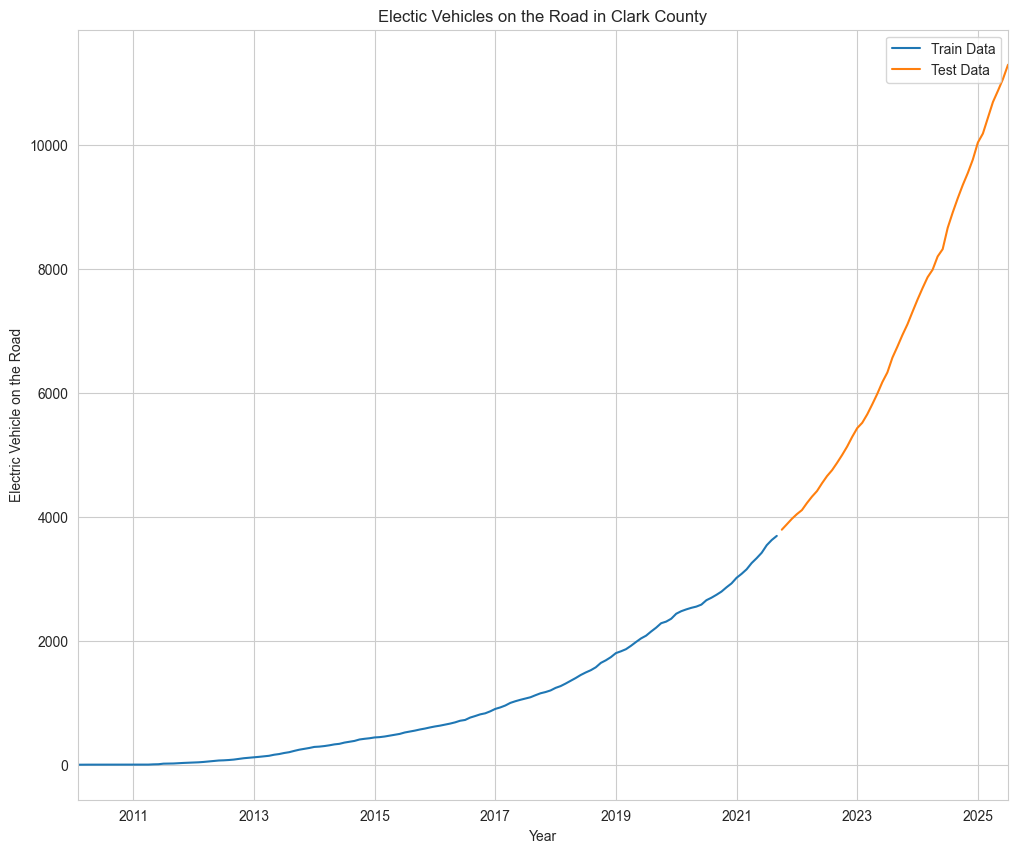

In [109]:
#Plotting train and test sets
plot_train_test_split(train_clark, test_clark, "Clark")

In [110]:
#finding best parameters
auto_model = pm.auto_arima(train_clark, start_p=0, start_q=0, d=1, max_p=4,
                           max_q=4, max_P=3, max_Q=3, start_P =0, start_Q=0,
                           m=12, verbose=2)
auto_model.summary()

c:\Users\Ali Sawah\Desktop\forecasting EV adoption and charging demand in Washington State\.venv_2\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Ali Sawah\Desktop\forecasting EV adoption and charging demand in Washington State\.venv_2\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Ali Sawah\Desktop\forecasting EV adoption and charging demand in Washington State\.venv_2\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Ali Sawah\Desktop\forecasting EV adoption and charging demand in Washington State\.venv_2\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite'

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  140
Model:             SARIMAX(4, 1, 0)x(1, 0, 0, 12)   Log Likelihood                -524.896
Date:                            Tue, 19 Aug 2025   AIC                           1063.793
Time:                                    21:16:52   BIC                           1084.334
Sample:                                02-28-2010   HQIC                          1072.140
                                     - 09-30-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.9748      1.571      0.621      0.535      -2.104       4.053
ar.L1          0.4546      0.082      5.527      0.000       0.293       0.616
ar.L2          0.0521      0.075      0.694      0.488      -0.095       0.199
ar.L3          0.2944      0.064      4.586      0.000       0.169       0.420
ar.L4          0.1633      0.062      2.640      0.008       0.042       0.284
ar.S.L12       0.2526      0.057      4.452      0.000       0.141       0.364
sigma2       108.6375      8.426     12.893      0.000      92.123     125.152
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                78.31
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):              24.45   Skew:                             0.53
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                   EV's on the Road   No. Observations:                  140
Model:             SARIMAX(4, 1, 0)x(1, 0, 0, 12)   Log Likelihood                -469.870
Date:                            Tue, 19 Aug 2025   AIC                            951.741
Time:                                    21:16:53   BIC                            968.614
Sample:                                02-28-2010   HQIC                           958.594
                                     - 09-30-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4522      0.088      5.148      0.000       0.280       0.624
ar.L2          0.0566      0.083      0.679      0.497      -0.107       0.220
ar.L3          0.3100      0.072      4.323      0.000       0.169       0.451
ar.L4          0.2046      0.063      3.271      0.001       0.082       0.327
ar.S.L12       0.2639      0.067      3.949      0.000       0.133       0.395
sigma2       121.7923     10.321     11.800      0.000     101.563     142.022
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                47.57
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):              16.83   Skew:                             0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

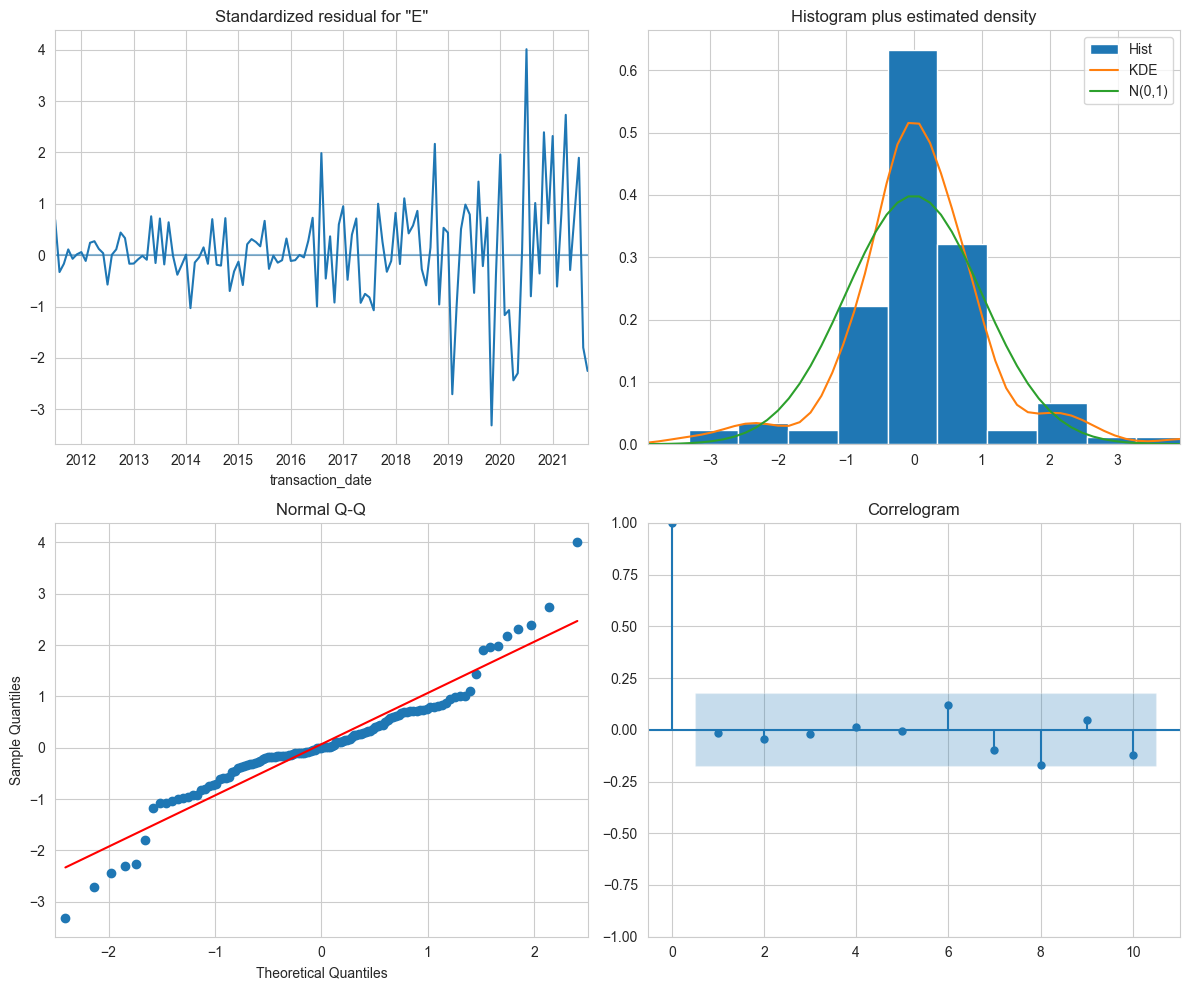

In [111]:
#Validate Model with Forecasts for Test Data
model = SARIMAX(train_clark, order=(4, 1, 0), seasonal_order=(1, 0, 0, 12), enforce_invertibility=False, enforce_stationarity=False).fit()
evaluate_model(model)

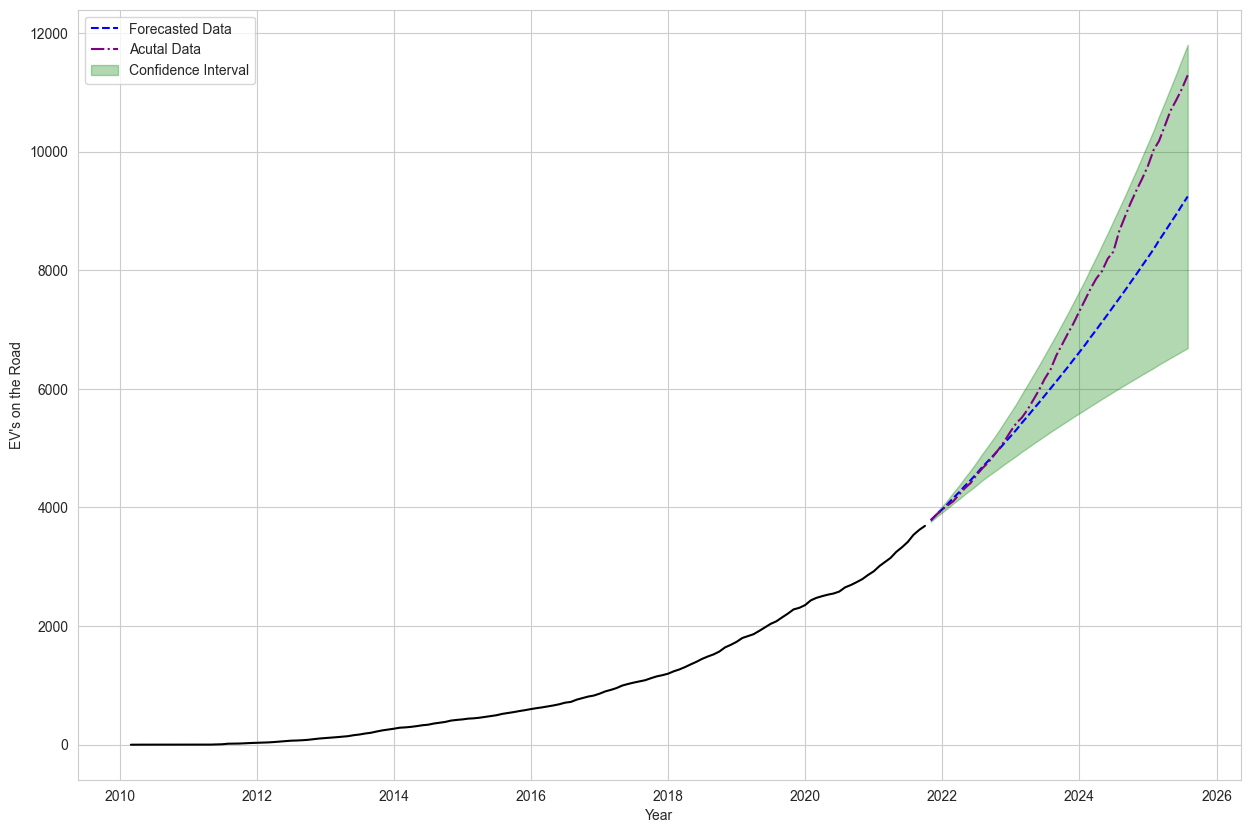

In [112]:
df_clark_forecast = get_forecast(model, train_clark, test_clark, plot=True)

In [113]:
#Future Predictions
#Fitting Model to all observed data
model = SARIMAX(county_information["Clark"]["df"], order=(4, 1, 0), seasonal_order=(1, 0, 0, 12), enforce_invertibility=False, enforce_stationarity=False).fit()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                   EV's on the Road   No. Observations:                  186
Model:             SARIMAX(4, 1, 0)x(1, 0, 0, 12)   Log Likelihood                -780.322
Date:                            Tue, 19 Aug 2025   AIC                           1572.644
Time:                                    21:16:54   BIC                           1591.423
Sample:                                02-28-2010   HQIC                          1580.265
                                     - 07-31-2025                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1960      0.050      3.908      0.000       0.098       0.294
ar.L2          0.3605      0.057      6.287      0.000       0.248       0.473
ar.L3          0.2839      0.057      4.981      0.000       0.172       0.396
ar.L4          0.1786      0.051      3.513      0.000       0.079       0.278
ar.S.L12       0.0690      0.089      0.777      0.437      -0.105       0.243
sigma2       599.8569     32.727     18.329      0.000     535.712     664.001
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):              2015.27
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):              93.67   Skew:                             1.87
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

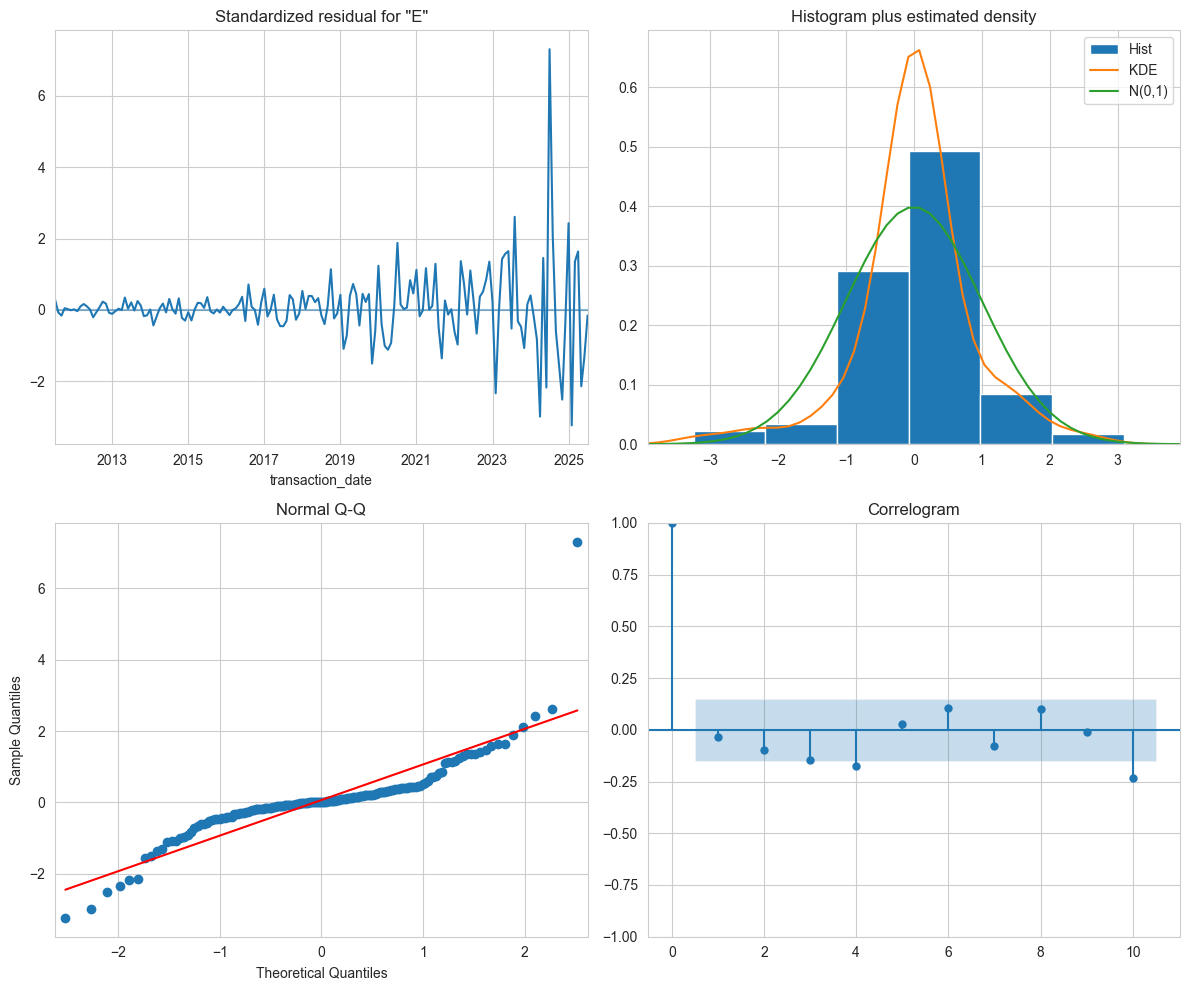

In [114]:
evaluate_model(model)

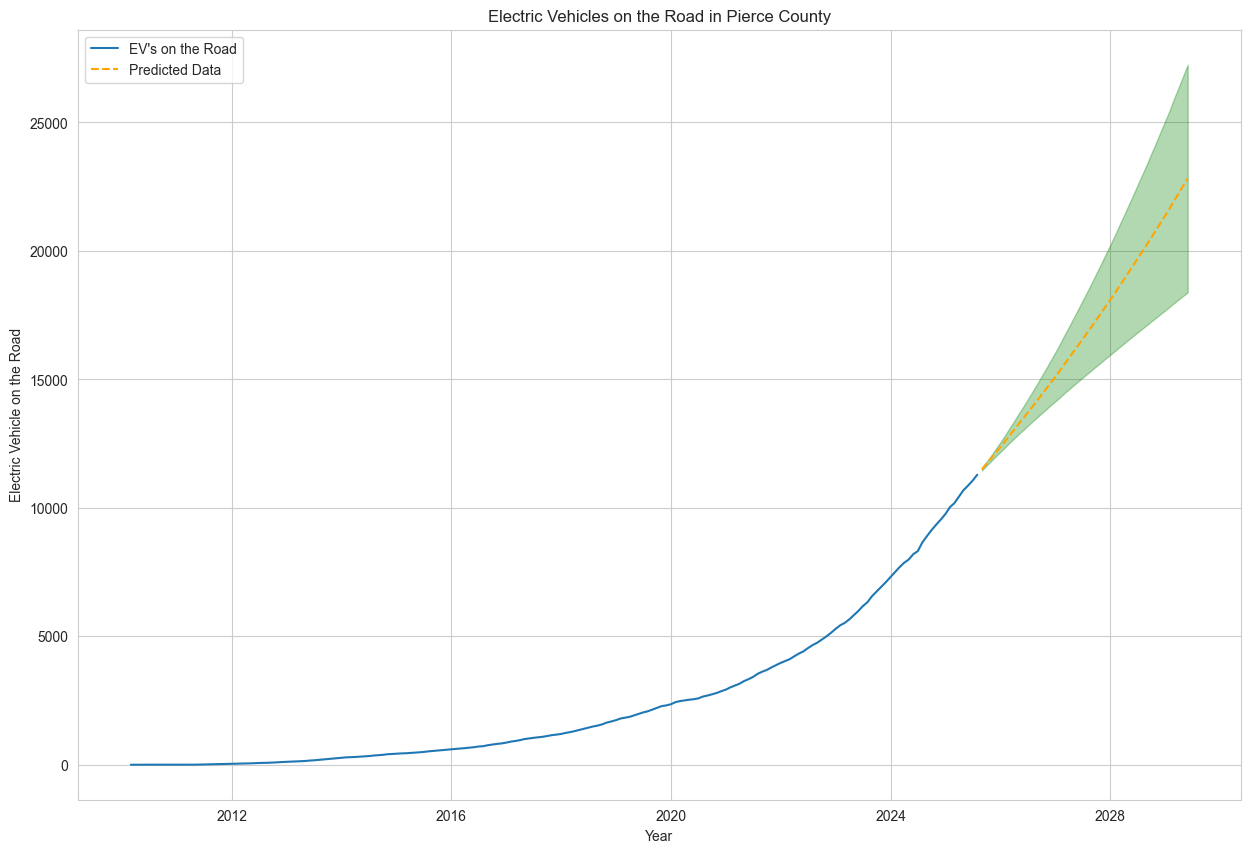

In [115]:
##Ploting & Saving Predictions
df_clark_preds = get_predictions(model, county_information["Clark"]["df"], test_clark, "Pierce", plot=True)

In [116]:
#saving Predictions
county_information["Clark"]["Predictions"] = df_clark_preds

In [117]:
county_information.keys()

dict_keys(['King', 'Clark', 'Snohomish', 'Kitsap', 'Thurston', 'Cowlitz', 'Jefferson', 'Yakima', 'Island', 'Clallam'])

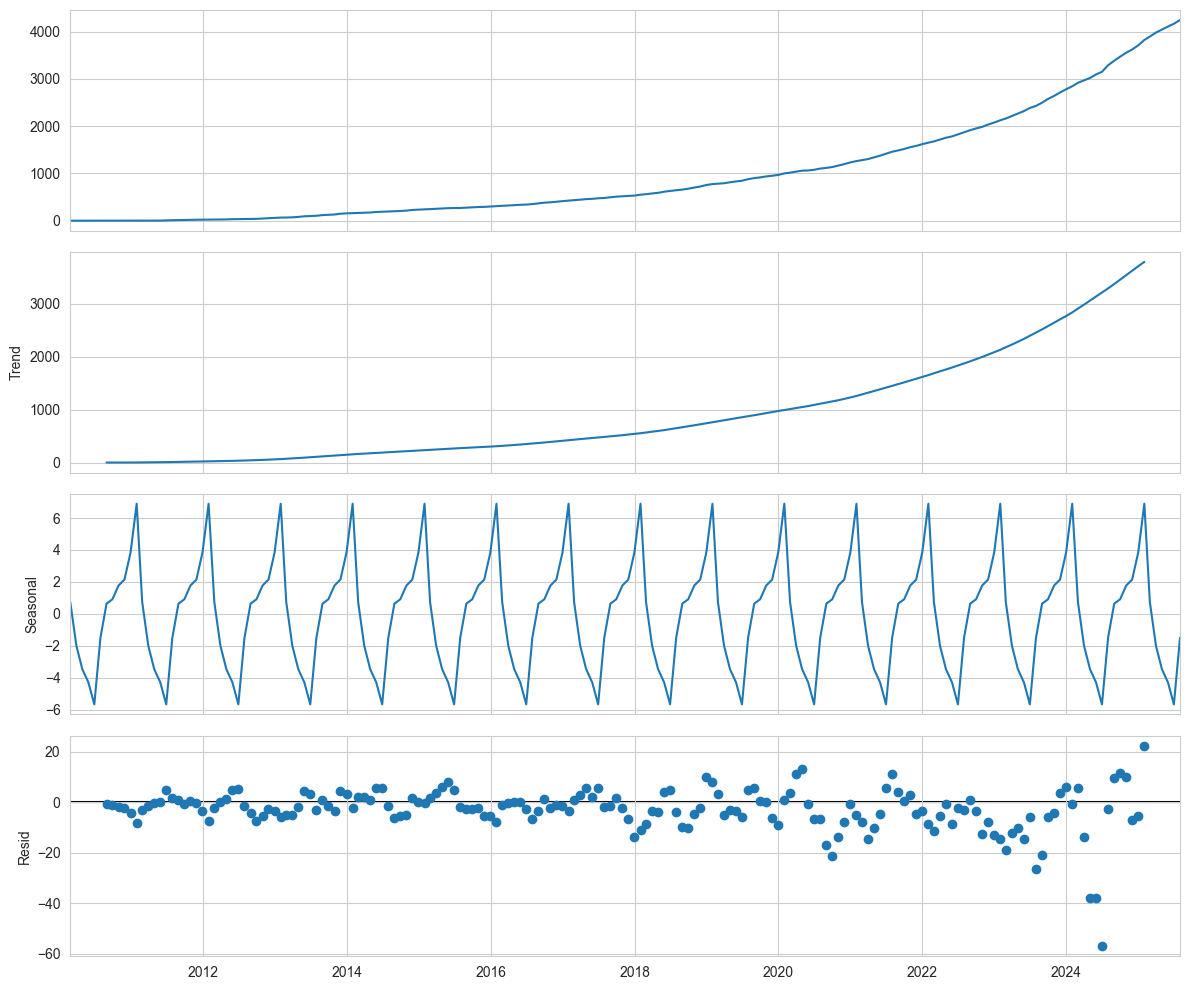

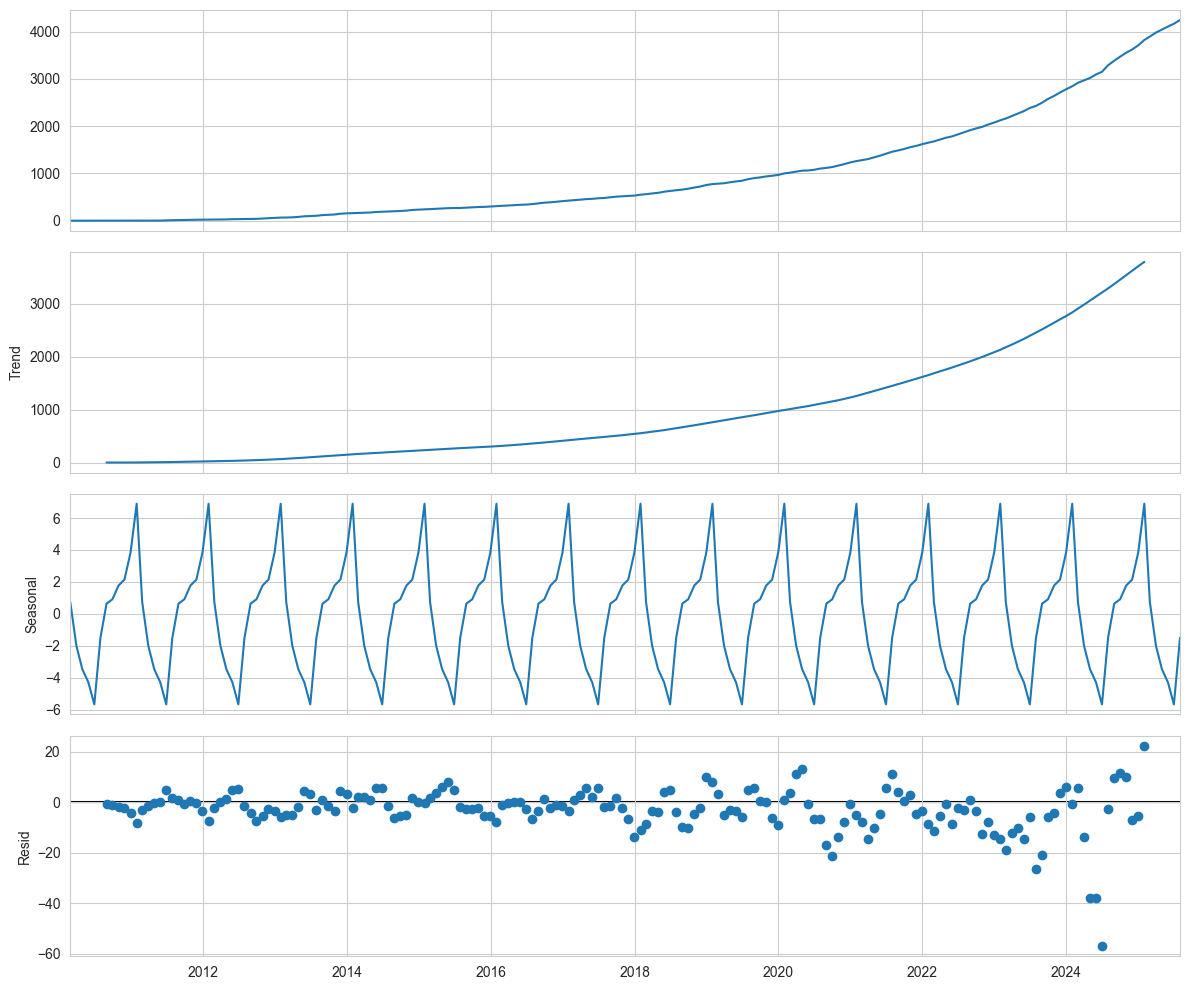

In [118]:
#Kitsap County
#Seasonability Check
plt.rcParams["figure.figsize"] = (12,10)
decomp = tsa.seasonal_decompose(county_information["Kitsap"]["df"])
decomp.plot()

In [119]:
#train_test_splt=it
train_kitsap, test_kitsap = train_test_split_ts(county_information["Kitsap"]["df"], 0.75, 0.25)

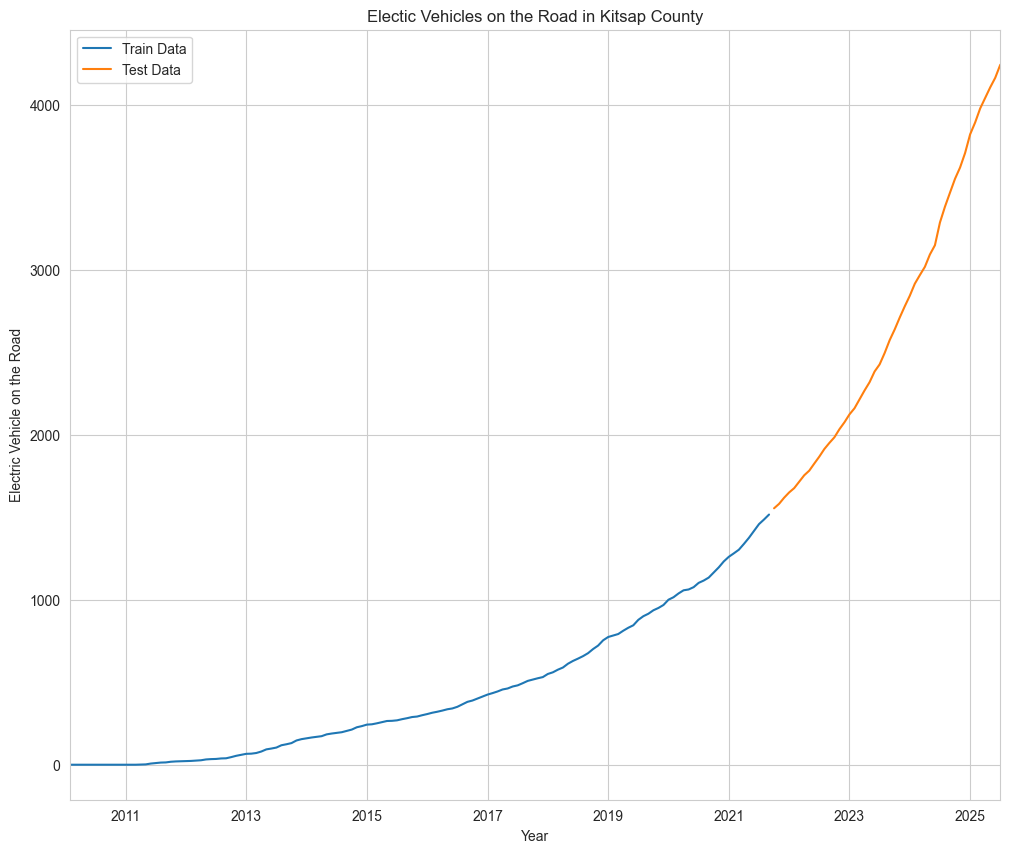

In [120]:
plot_train_test_split(train_kitsap, test_kitsap, "Kitsap")

In [121]:
#Finding best parameters
auto_model = pm.auto_arima(train_kitsap, start_p=0, start_q=0, d=1, max_p=4,
                           max_q=4, max_P=3, max_Q=3, start_P=1, start_Q=0,
                           m=12, verbose=2)
auto_model.summary()

c:\Users\Ali Sawah\Desktop\forecasting EV adoption and charging demand in Washington State\.venv_2\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Ali Sawah\Desktop\forecasting EV adoption and charging demand in Washington State\.venv_2\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Ali Sawah\Desktop\forecasting EV adoption and charging demand in Washington State\.venv_2\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Ali Sawah\Desktop\forecasting EV adoption and charging demand in Washington State\.venv_2\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite'

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  140
Model:             SARIMAX(3, 1, 3)x(2, 0, [], 12)   Log Likelihood                -413.971
Date:                             Tue, 19 Aug 2025   AIC                            845.942
Time:                                     21:17:46   BIC                            872.353
Sample:                                 02-28-2010   HQIC                           856.675
                                      - 09-30-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0924      0.081     -1.140      0.254      -0.251       0.066
ar.L2          0.1912      0.074      2.591      0.010       0.047       0.336
ar.L3          0.8932      0.068     13.046      0.000       0.759       1.027
ma.L1          0.4931      0.096      5.150      0.000       0.305       0.681
ma.L2          0.0231      0.114      0.202      0.840      -0.201       0.247
ma.L3         -0.6170      0.094     -6.559      0.000      -0.801      -0.433
ar.S.L12      -0.1215      0.095     -1.279      0.201      -0.308       0.065
ar.S.L24       0.2430      0.087      2.785      0.005       0.072       0.414
sigma2        21.6551      2.174      9.961      0.000      17.394      25.916
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                14.68
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               6.99   Skew:                             0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

c:\Users\Ali Sawah\Desktop\forecasting EV adoption and charging demand in Washington State\.venv_2\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                    EV's on the Road   No. Observations:                  140
Model:             SARIMAX(3, 1, 3)x(2, 0, [], 12)   Log Likelihood                -342.010
Date:                             Tue, 19 Aug 2025   AIC                            702.020
Time:                                     21:17:47   BIC                            726.487
Sample:                                 02-28-2010   HQIC                           711.947
                                      - 09-30-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4315      1.198      0.360      0.719      -1.917       2.780
ar.L2          0.6087      0.857      0.710      0.478      -1.072       2.289
ar.L3         -0.0102      0.454     -0.023      0.982      -0.899       0.879
ma.L1         -0.1181      1.269     -0.093      0.926      -2.604       2.368
ma.L2         -0.7847      0.557     -1.408      0.159      -1.877       0.308
ma.L3         -0.0919      0.755     -0.122      0.903      -1.572       1.389
ar.S.L12      -0.0462      0.156     -0.296      0.767      -0.352       0.259
ar.S.L24       0.2195      0.121      1.818      0.069      -0.017       0.456
sigma2        26.8011      8.687      3.085      0.002       9.775      43.827
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 8.87
Prob(Q):                              0.97   Prob(JB):                         0.01
Heteroskedasticity (H):               3.29   Skew:                             0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

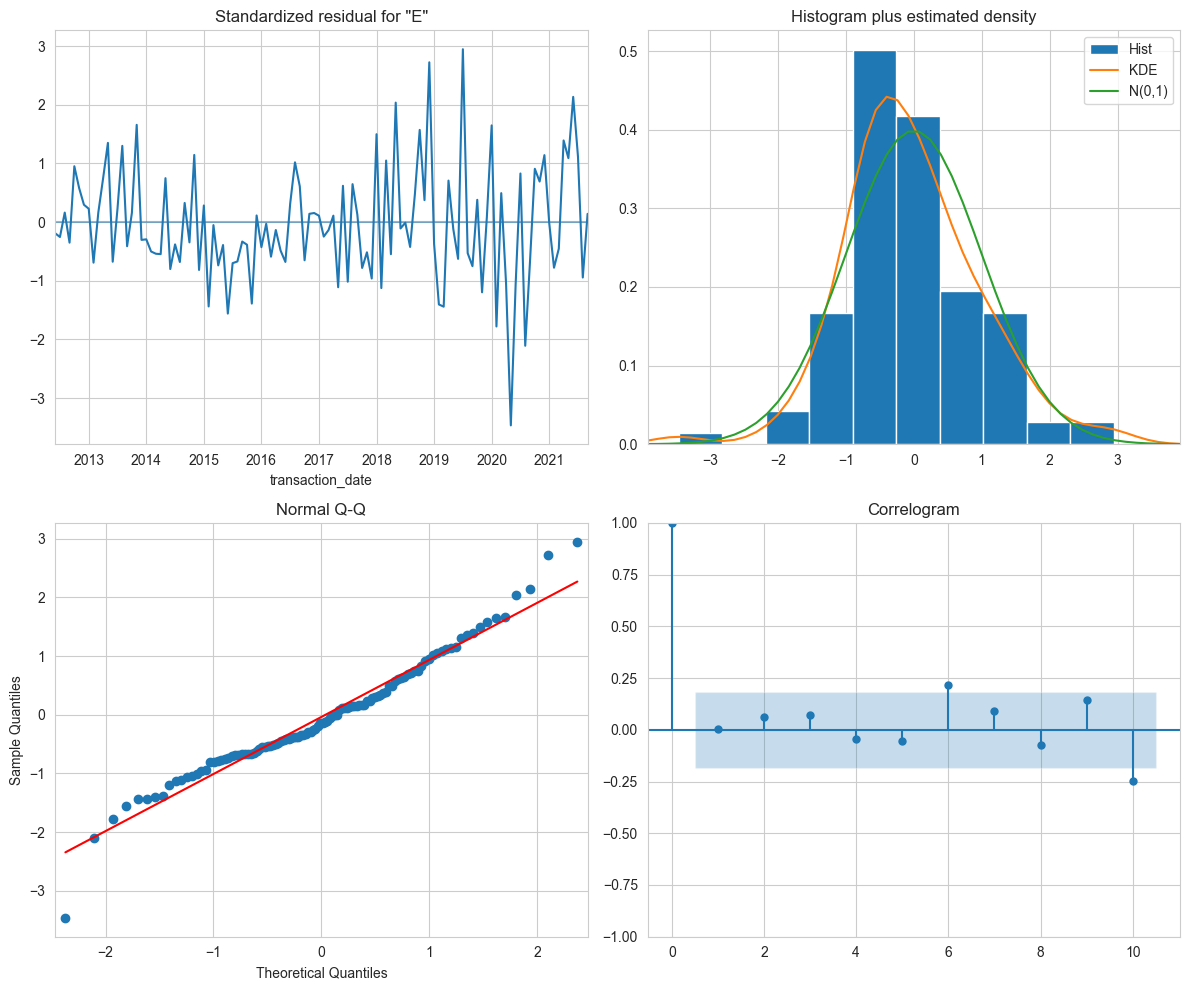

In [122]:
#Validate Model with Forecasts for Test Data
model = SARIMAX(train_kitsap, order=(3, 1, 3), seasonal_order=(2, 0, [], 12),
                enforce_invertibility=False, enforce_stationarity=False).fit()
evaluate_model(model)

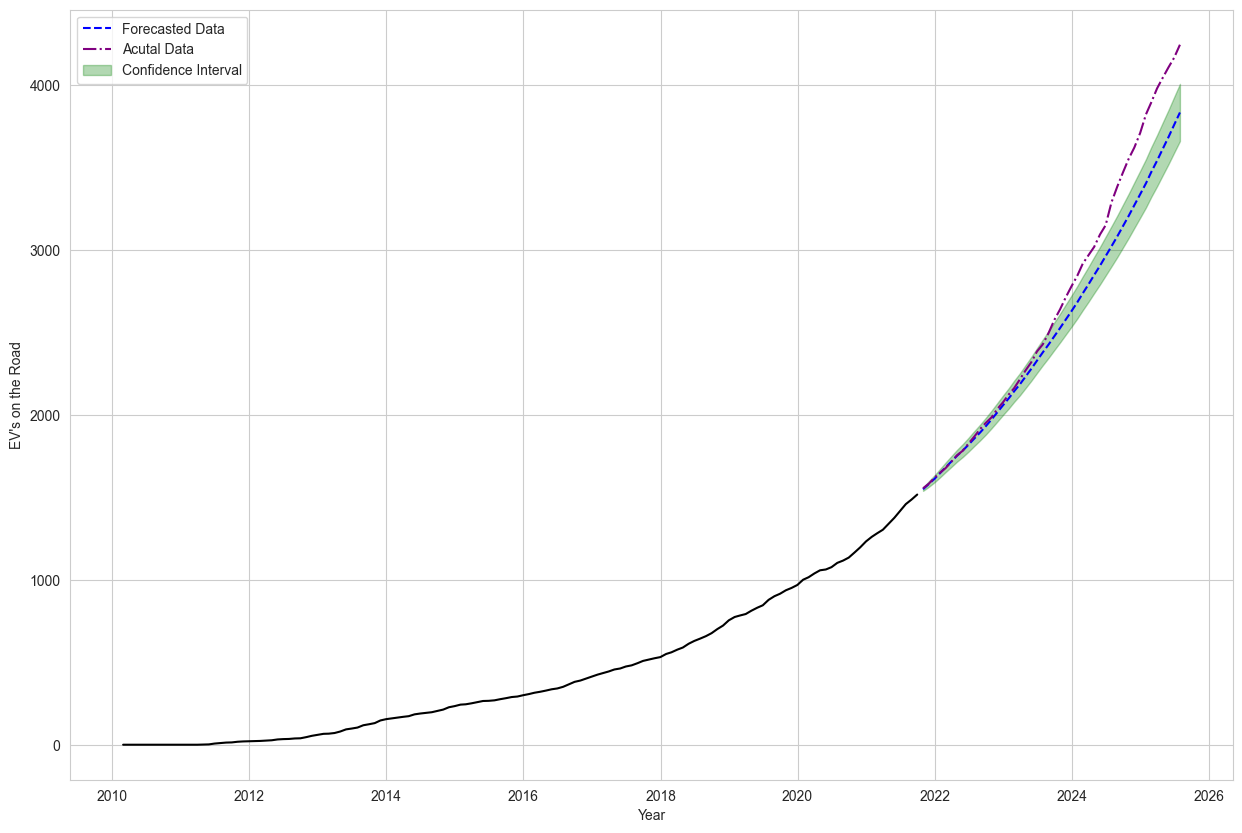

In [123]:
df_kitsap_forecast = get_forecast(model, train_kitsap, test_kitsap, plot=True)

c:\Users\Ali Sawah\Desktop\forecasting EV adoption and charging demand in Washington State\.venv_2\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                    EV's on the Road   No. Observations:                  186
Model:             SARIMAX(3, 1, 3)x(2, 0, [], 12)   Log Likelihood                -574.652
Date:                             Tue, 19 Aug 2025   AIC                           1167.304
Time:                                     21:17:49   BIC                           1194.868
Sample:                                 02-28-2010   HQIC                          1178.498
                                      - 07-31-2025                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2218      0.183      6.666      0.000       0.863       1.581
ar.L2         -0.5317      0.316     -1.682      0.093      -1.151       0.088
ar.L3          0.3340      0.185      1.809      0.070      -0.028       0.696
ma.L1         -0.9945      0.251     -3.960      0.000      -1.487      -0.502
ma.L2          0.6104      0.268      2.277      0.023       0.085       1.136
ma.L3         -0.6126      0.188     -3.252      0.001      -0.982      -0.243
ar.S.L12      -0.0609      0.129     -0.471      0.638      -0.314       0.192
ar.S.L24       0.0245      0.126      0.194      0.846      -0.223       0.272
sigma2        86.3560     14.487      5.961      0.000      57.962     114.750
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              1373.07
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):              12.66   Skew:                             2.04
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

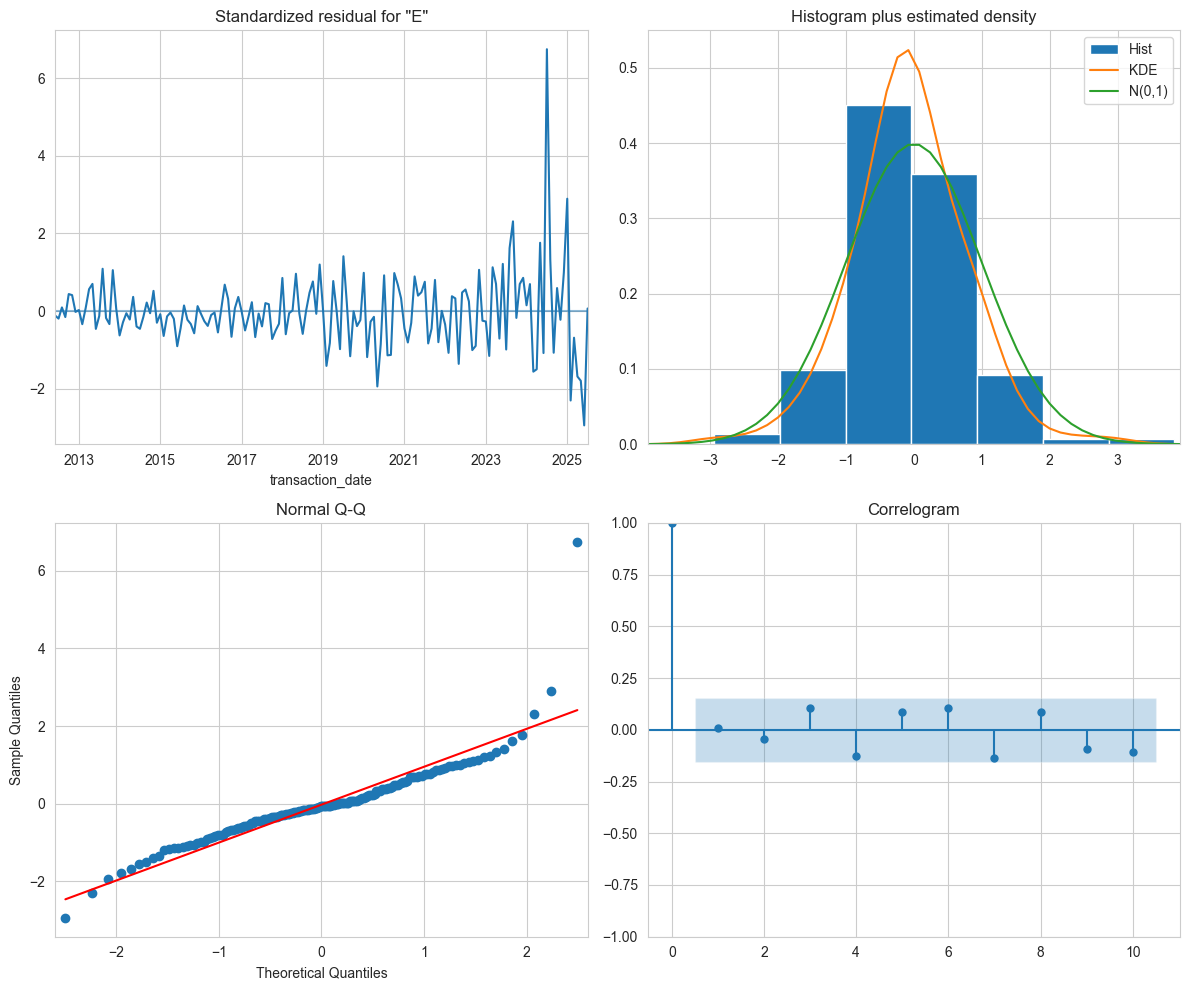

In [124]:
#Fitting Model to All observed data
model = SARIMAX(county_information["Kitsap"]["df"],order=(3, 1, 3), seasonal_order=(2, 0, [], 12),
                enforce_invertibility=False, enforce_stationarity=False).fit()

evaluate_model(model)

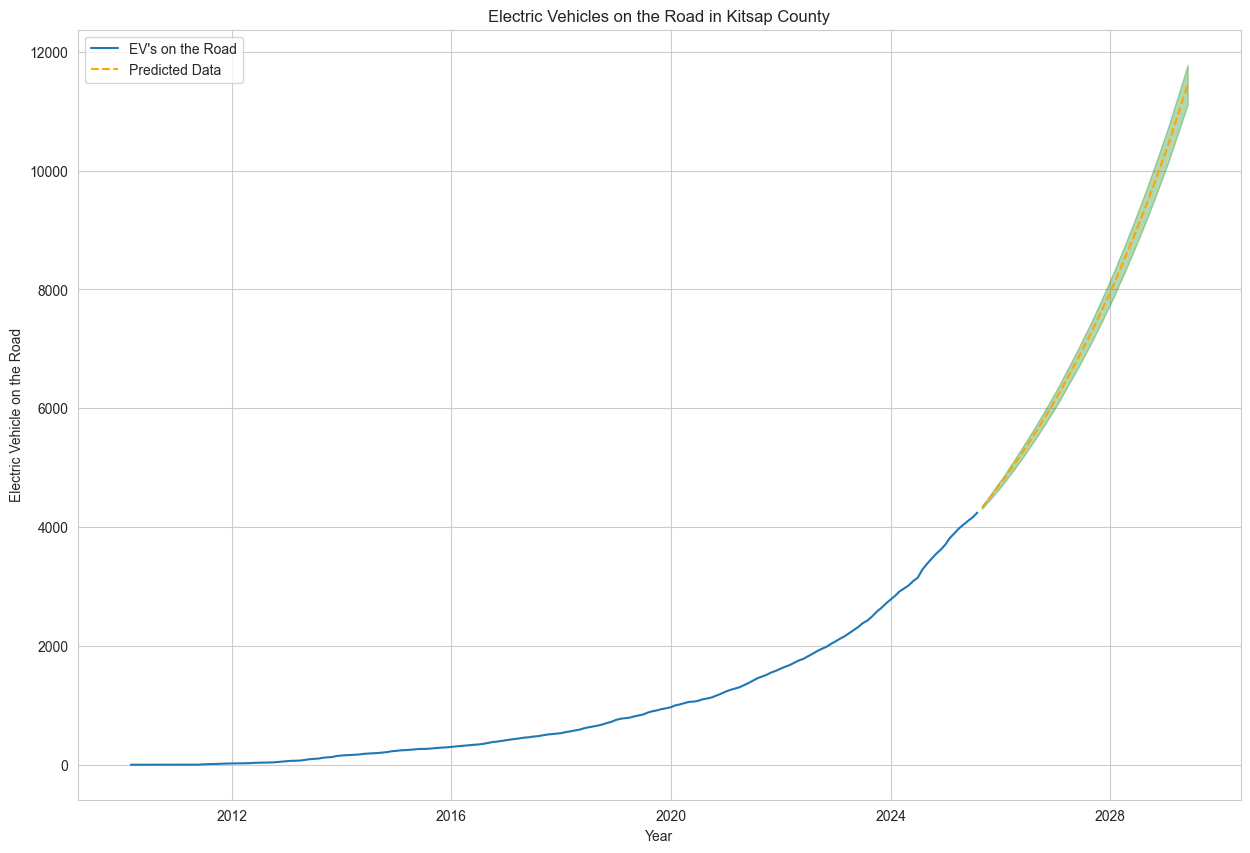

In [125]:
#getting/plotting predictions
df_kitsap_preds = get_predictions(model, county_information["Kitsap"]["df"],
                                  test_kitsap, "Kitsap", plot=True)

In [126]:
county_information["Kitsap"]["Predictions"] = df_kitsap_preds

In [127]:
county_information.keys()

dict_keys(['King', 'Clark', 'Snohomish', 'Kitsap', 'Thurston', 'Cowlitz', 'Jefferson', 'Yakima', 'Island', 'Clallam'])

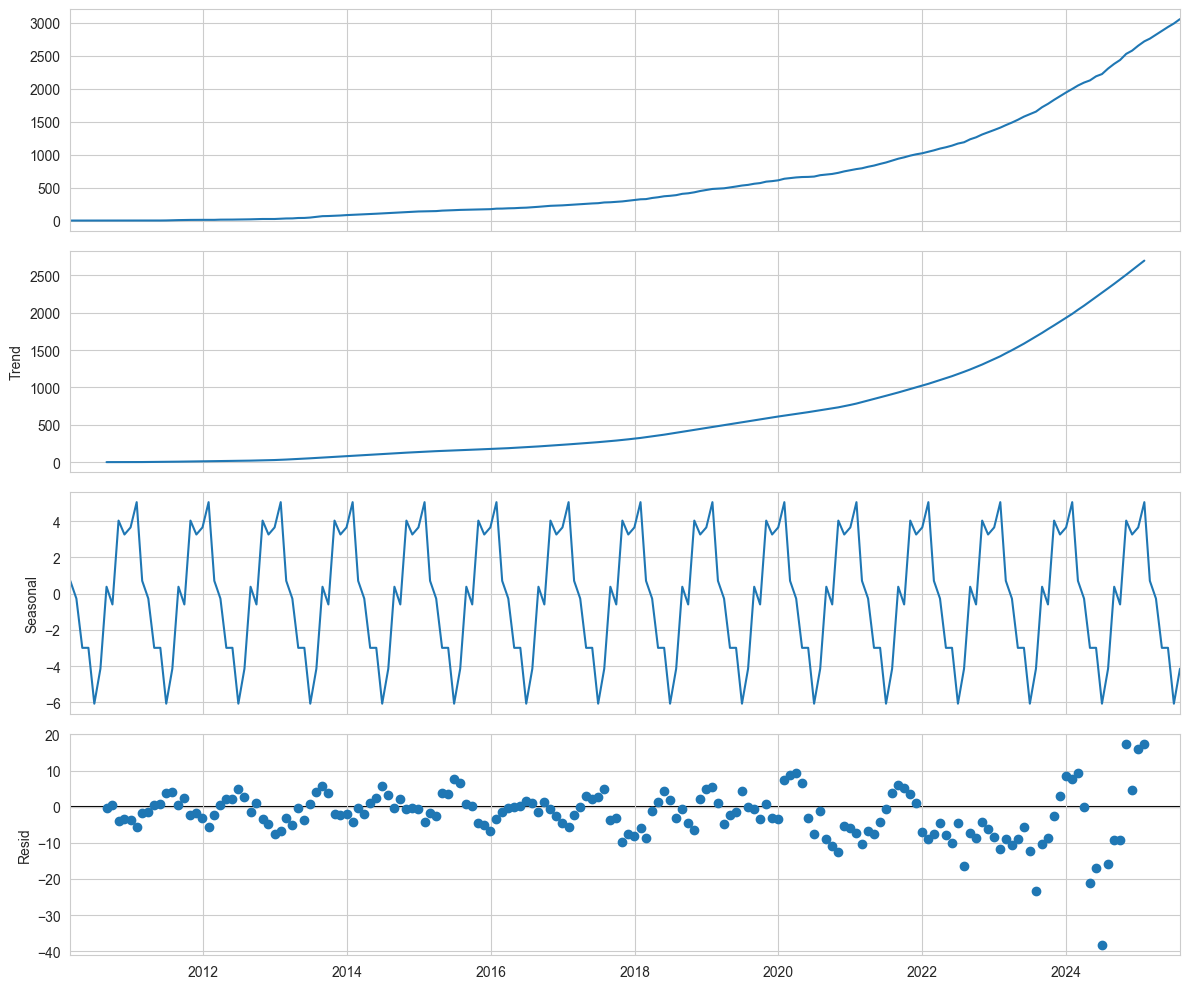

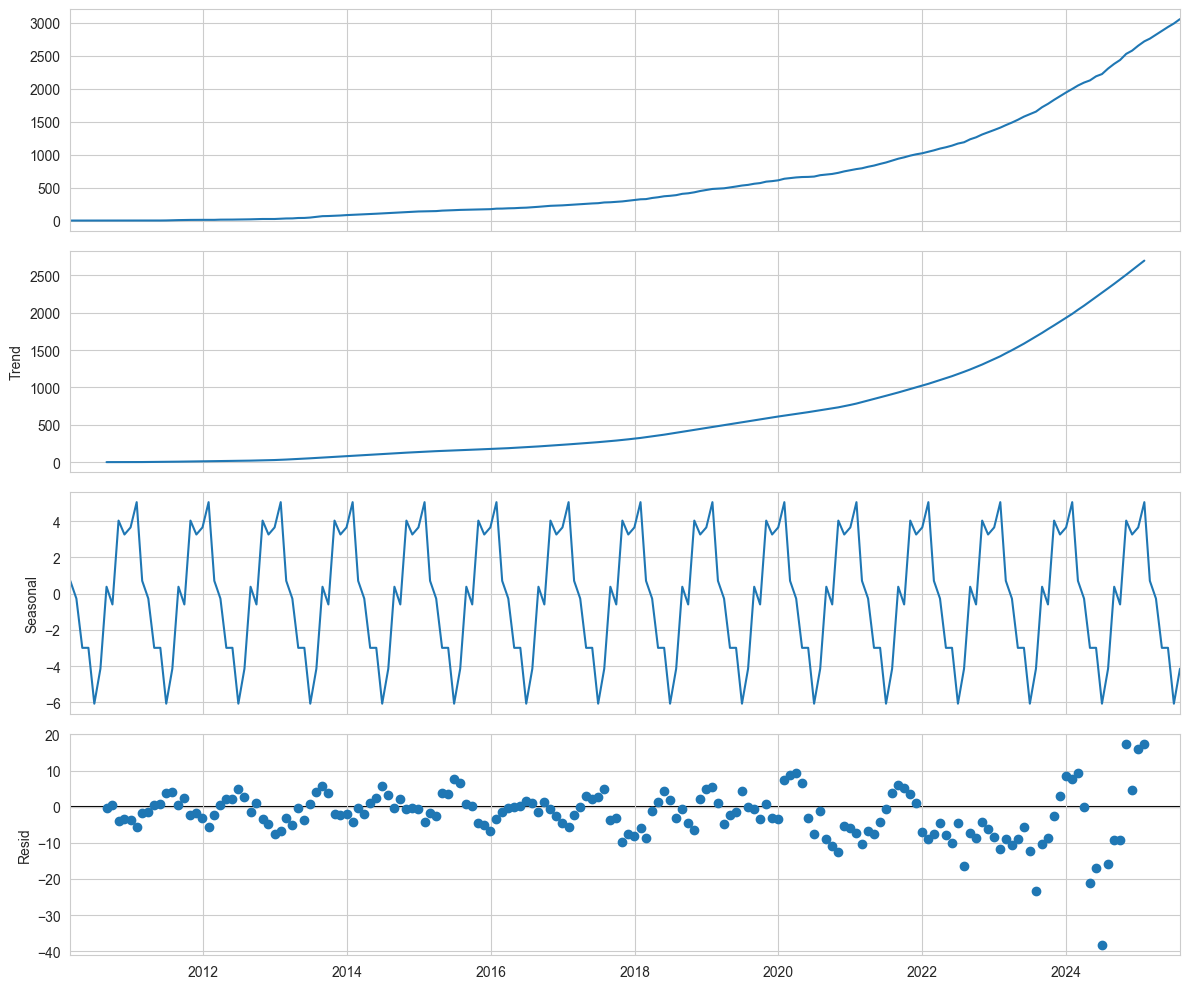

In [128]:
##Thurston County
#Seaonality Check
plt.rcParams["figure.figsize"] = (12,10)
decomp = tsa.seasonal_decompose(county_information["Thurston"]["df"])
decomp.plot()

In [129]:
#train test split
train_thurston, test_thurston = train_test_split_ts(county_information["Thurston"]["df"], 0.80,20)

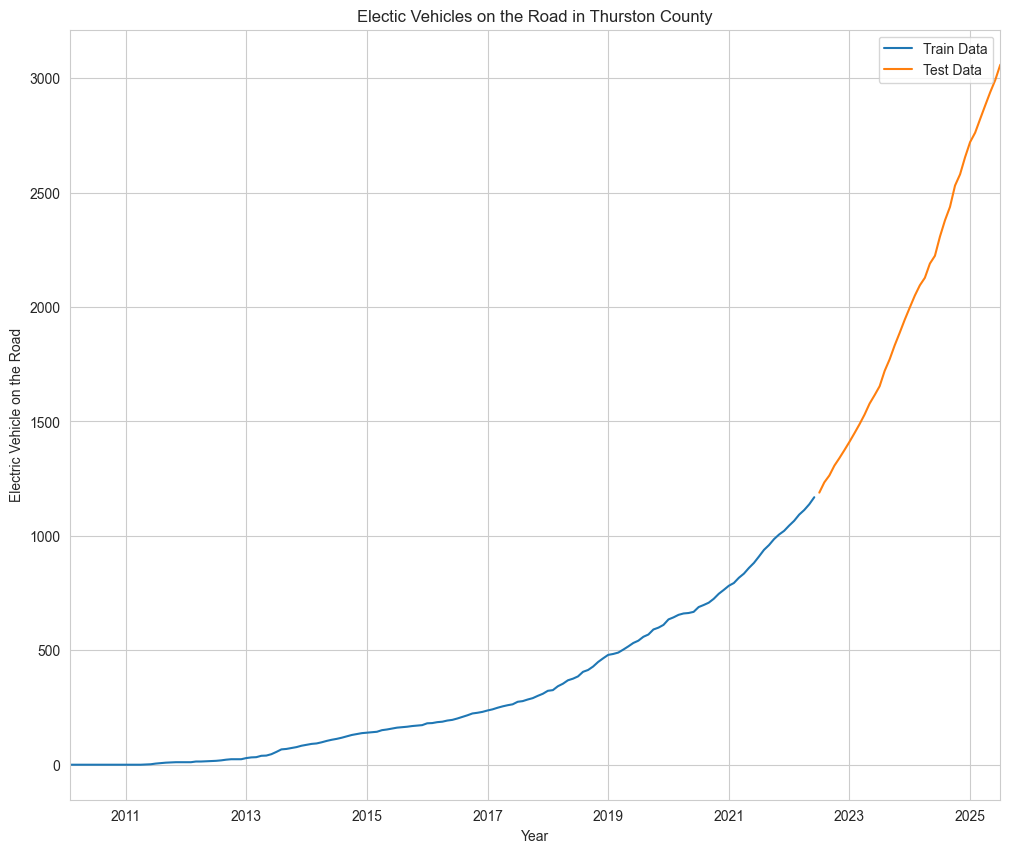

In [131]:
plot_train_test_split(train_thurston, test_thurston, "Thurston")

In [133]:
#Finding the best parameters with Auto-Arima
auto_model = pm.auto_arima(train_thurston, start_p=0, start_q=0, d=1,
                           max_p=4, max_q=4, max_P=3, max_Q=3, start_P=0, start_Q=0, m=12, verbose=2)
auto_model.summary()

c:\Users\Ali Sawah\Desktop\forecasting EV adoption and charging demand in Washington State\.venv_2\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Ali Sawah\Desktop\forecasting EV adoption and charging demand in Washington State\.venv_2\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Ali Sawah\Desktop\forecasting EV adoption and charging demand in Washington State\.venv_2\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Ali Sawah\Desktop\forecasting EV adoption and charging demand in Washington State\.venv_2\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite'

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  149
Model:             SARIMAX(1, 1, 1)x(3, 0, [], 12)   Log Likelihood                -410.598
Date:                             Tue, 19 Aug 2025   AIC                            833.197
Time:                                     21:33:42   BIC                            851.180
Sample:                                 02-28-2010   HQIC                           840.503
                                      - 06-30-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9966      0.006    163.829      0.000       0.985       1.008
ma.L1         -0.7271      0.048    -15.166      0.000      -0.821      -0.633
ar.S.L12       0.0304      0.065      0.470      0.639      -0.097       0.158
ar.S.L24       0.0957      0.091      1.047      0.295      -0.083       0.275
ar.S.L36       0.2400      0.105      2.288      0.022       0.034       0.446
sigma2        14.4019      1.474      9.769      0.000      11.513      17.291
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 8.68
Prob(Q):                              0.80   Prob(JB):                         0.01
Heteroskedasticity (H):               8.18   Skew:                             0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                    EV's on the Road   No. Observations:                  149
Model:             SARIMAX(1, 1, 1)x(3, 0, [], 12)   Log Likelihood                -318.763
Date:                             Tue, 19 Aug 2025   AIC                            649.525
Time:                                     21:35:59   BIC                            665.782
Sample:                                 02-28-2010   HQIC                           656.120
                                      - 06-30-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0167      0.008    132.248      0.000       1.002       1.032
ma.L1         -0.8050      0.050    -16.037      0.000      -0.903      -0.707
ar.S.L12      -0.0085      0.084     -0.101      0.920      -0.173       0.156
ar.S.L24       0.0865      0.116      0.743      0.458      -0.142       0.315
ar.S.L36       0.3389      0.145      2.340      0.019       0.055       0.623
sigma2        18.1050      2.417      7.491      0.000      13.368      22.842
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 0.13
Prob(Q):                              0.74   Prob(JB):                         0.94
Heteroskedasticity (H):               4.65   Skew:                             0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

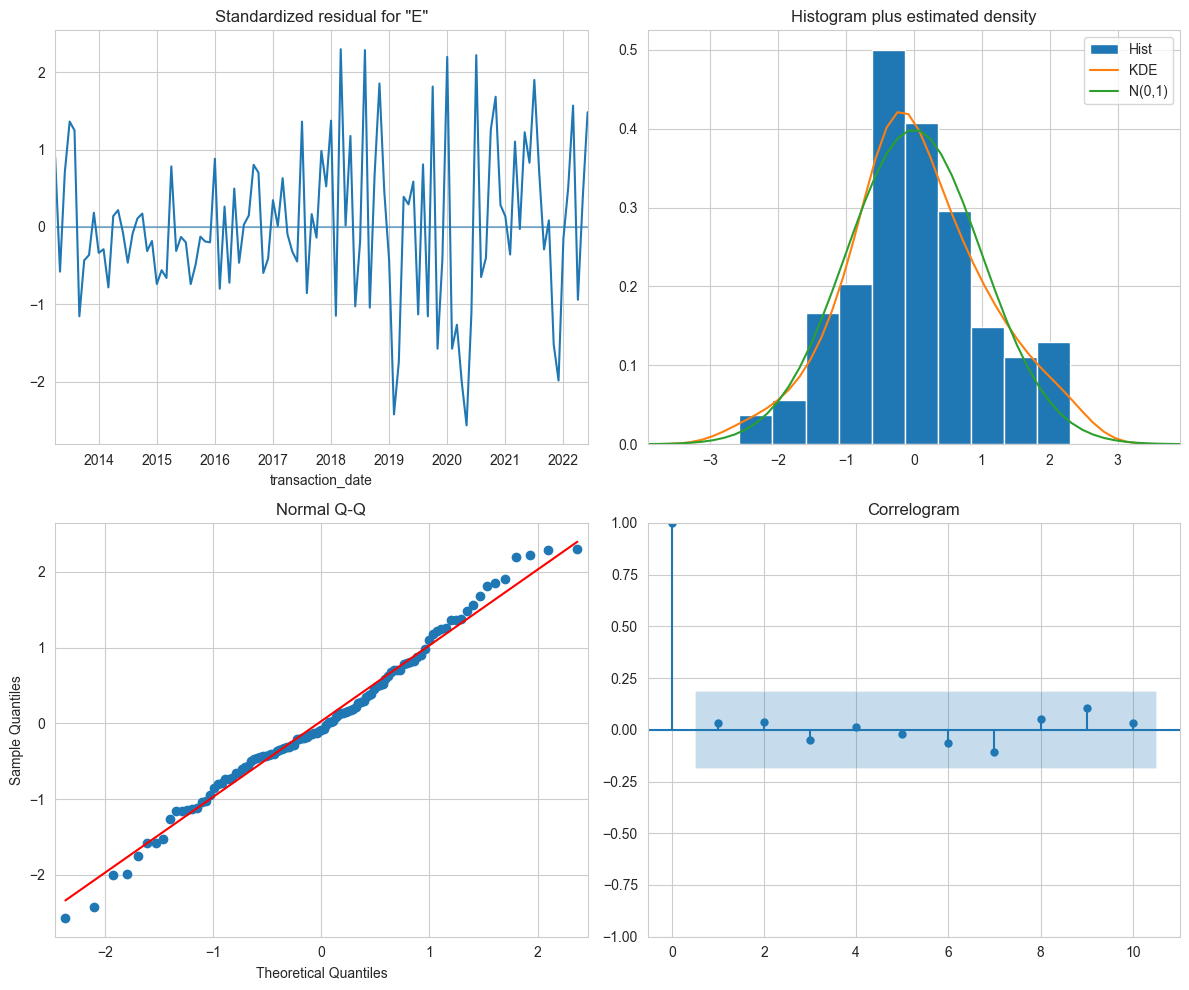

In [ ]:
#validate model performance with forecasts for Test Data
model = SARIMAX(train_thurston,) order=(1, 1, 1), seasonal_order=(3, 0, [], 12),
                enforce_invertibility=False, enforce_stationarity=False.fit()
evaluate_model(model)

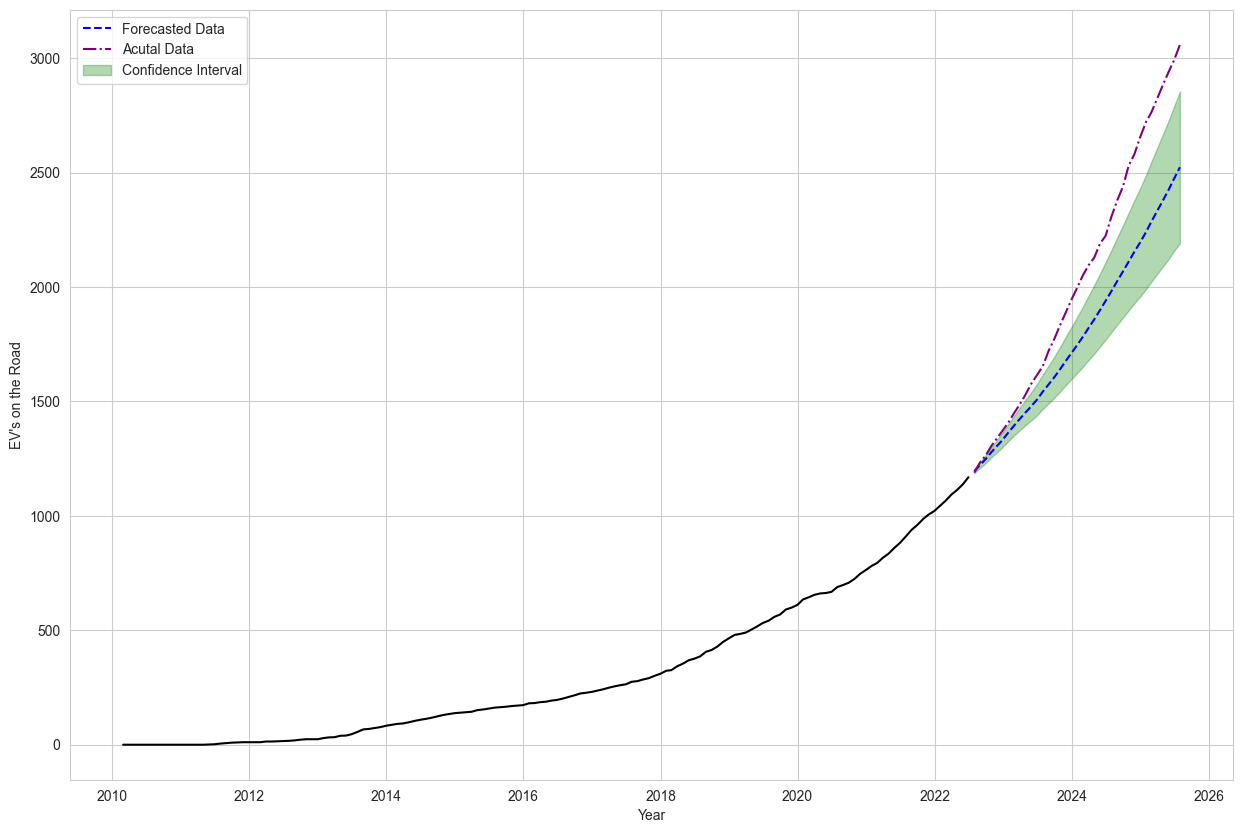

In [135]:
df_thurston_forecast = get_forecast(model, train_thurston, test_thurston, plot=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                    EV's on the Road   No. Observations:                  186
Model:             SARIMAX(1, 1, 1)x(3, 0, [], 12)   Log Likelihood                -502.458
Date:                             Tue, 19 Aug 2025   AIC                           1016.916
Time:                                     21:38:21   BIC                           1034.899
Sample:                                 02-28-2010   HQIC                          1024.222
                                      - 07-31-2025                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0086      0.006    169.901      0.000       0.997       1.020
ma.L1         -0.8039      0.055    -14.508      0.000      -0.913      -0.695
ar.S.L12       0.3322      0.102      3.256      0.001       0.132       0.532
ar.S.L24       0.1157      0.122      0.952      0.341      -0.123       0.354
ar.S.L36       0.3478      0.170      2.048      0.041       0.015       0.681
sigma2        51.6812      4.319     11.965      0.000      43.215      60.147
===================================================================================
Ljung-Box (L1) (Q):                   2.23   Jarque-Bera (JB):               137.15
Prob(Q):                              0.14   Prob(JB):                         0.00
Heteroskedasticity (H):              17.29   Skew:                             0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

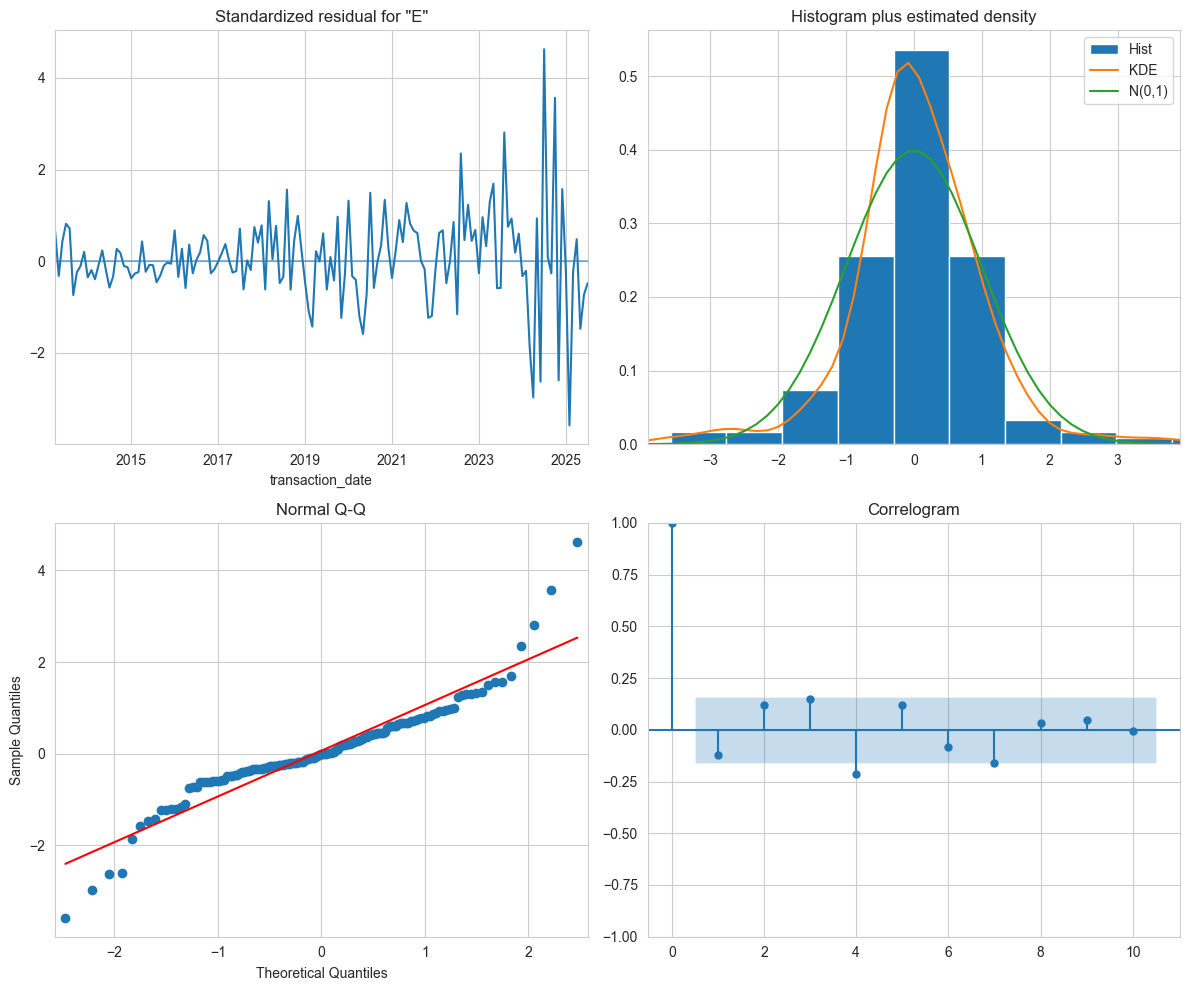

In [136]:
#Future Predictions
#Fitting model to All observed data
model = SARIMAX(county_information["Thurston"]["df"],  order=(1, 1, 1), seasonal_order=(3, 0, [], 12),
                enforce_invertibility=False, enforce_stationarity=False).fit()

evaluate_model(model)

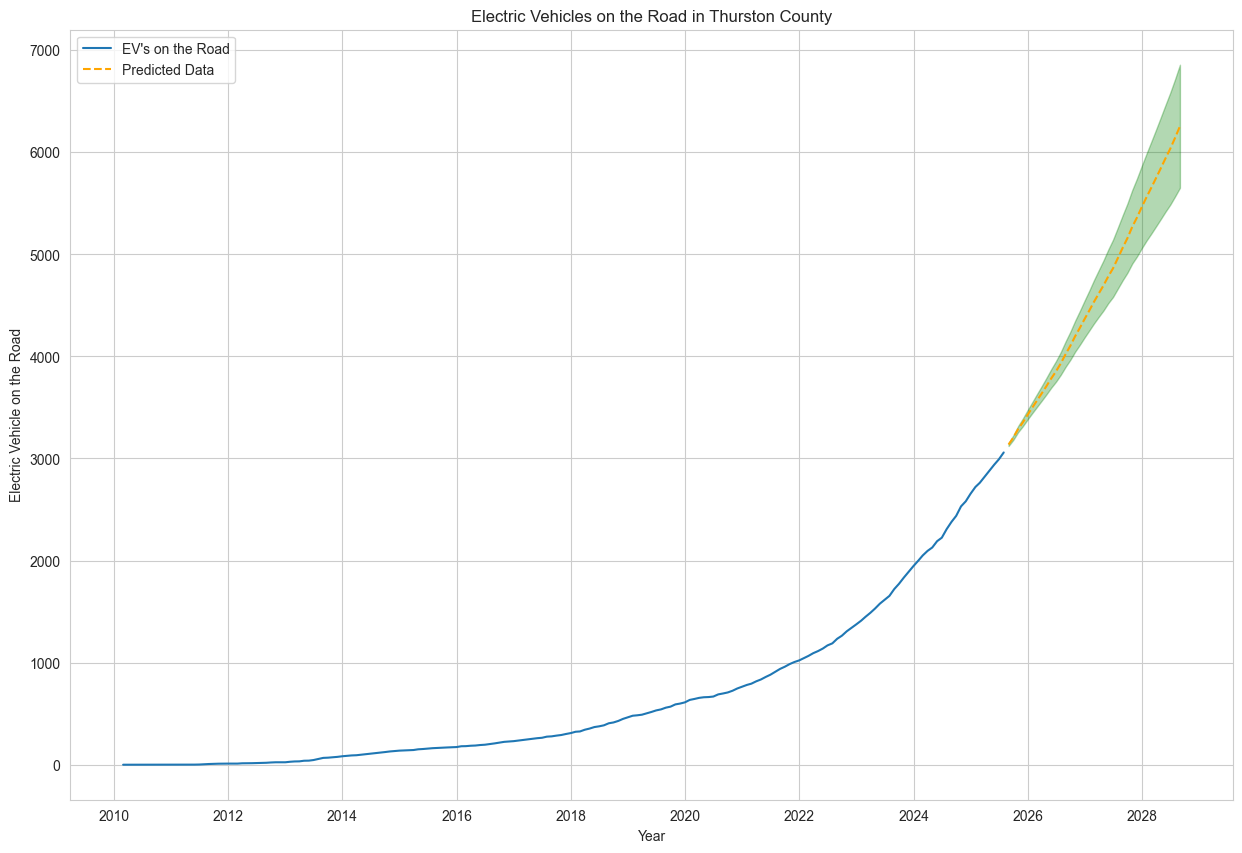

In [137]:
#Plotting & Saving predictions
df_thurston_preds = get_predictions(model, county_information["Thurston"]["df"], test_thurston, "Thurston", plot=True)

In [138]:
#saving predictions
county_information["Thurston"]["Predictions"] = df_thurston_preds

In [140]:
county_information.keys()

dict_keys(['King', 'Clark', 'Snohomish', 'Kitsap', 'Thurston', 'Cowlitz', 'Jefferson', 'Yakima', 'Island', 'Clallam'])

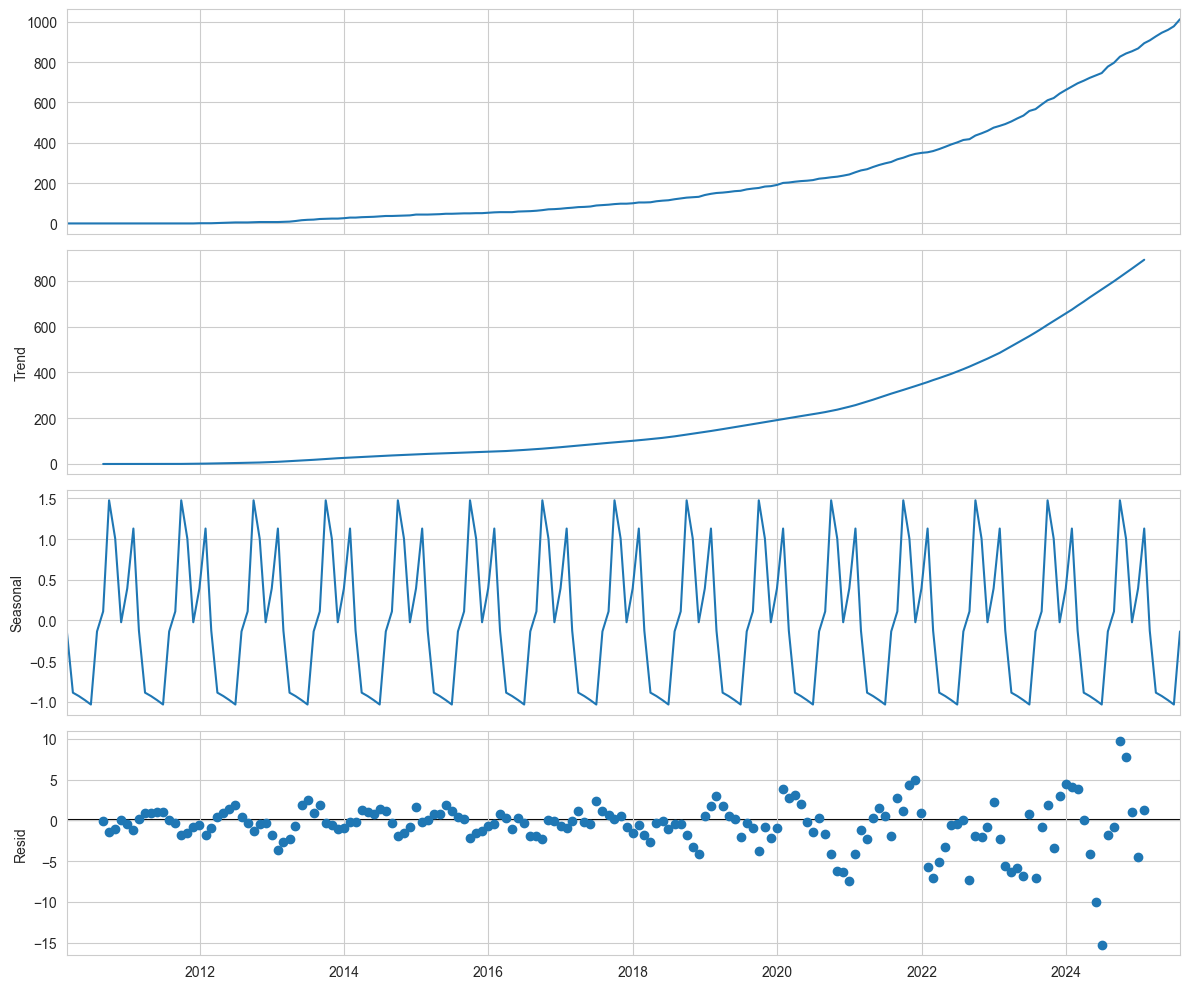

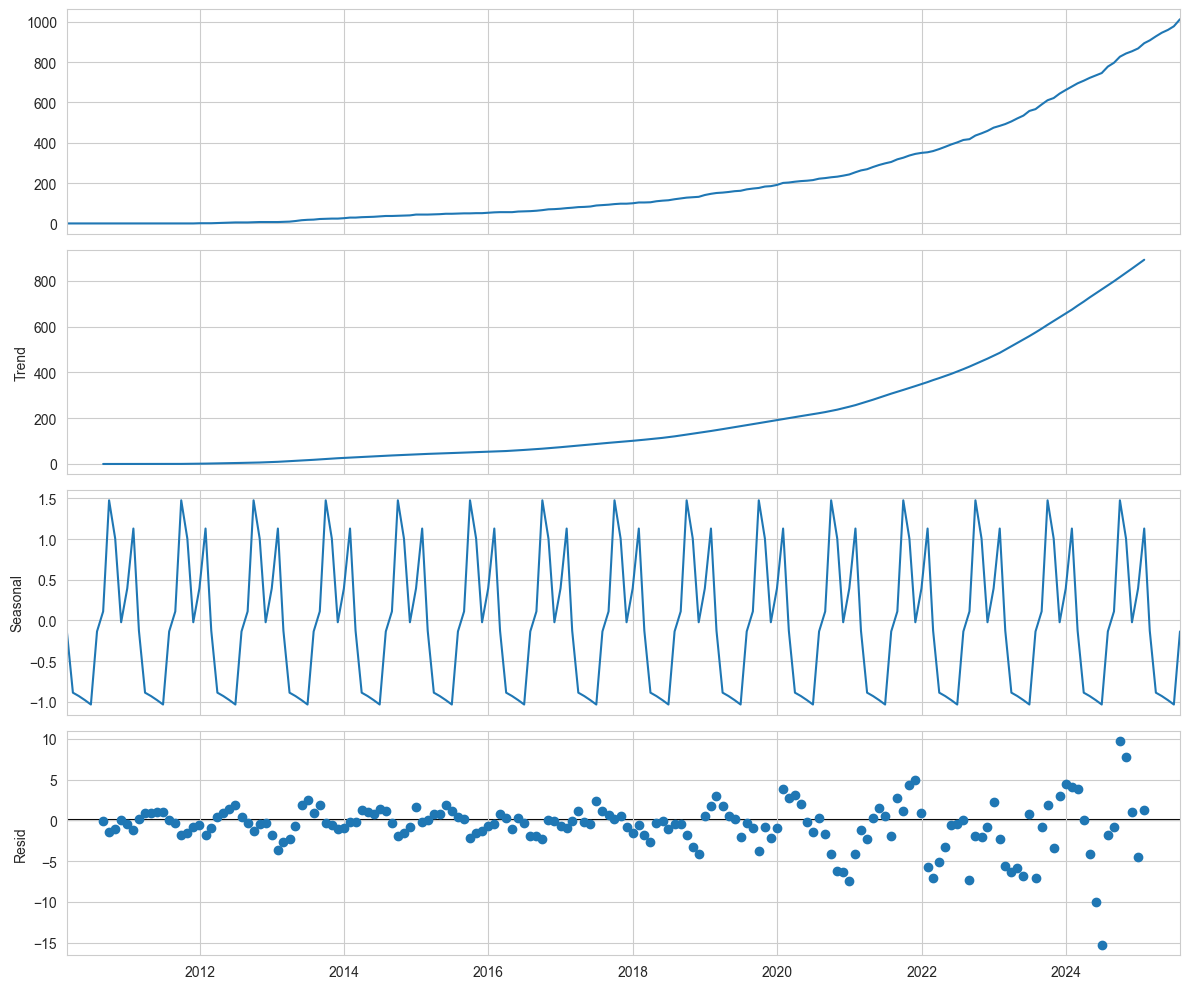

In [141]:
#Cowlitz County
#Seaonability check
plt.rcParams["figure.figsize"] = (12,10)
decomp = tsa.seasonal_decompose(county_information["Cowlitz"]["df"])
decomp.plot()

In [142]:
#train_test_split
train_cowlitz, test_cowlitz = train_test_split_ts(county_information["Cowlitz"]["df"], 0.75,0.25)

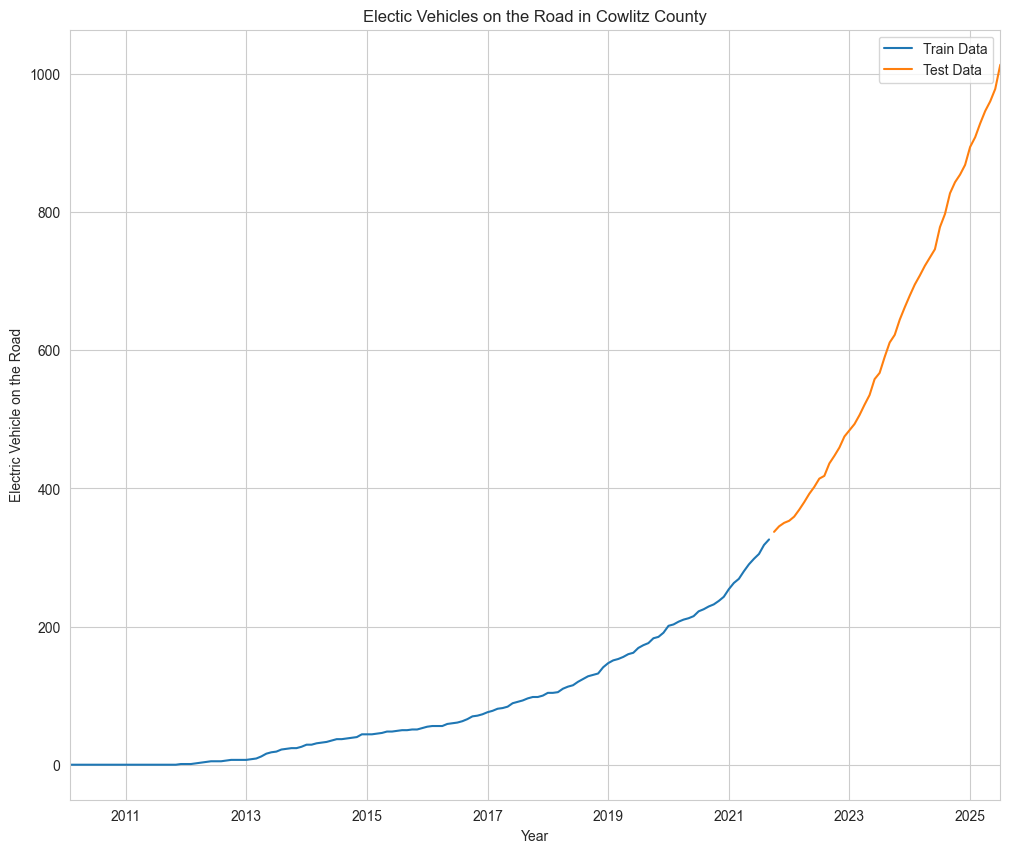

In [143]:
plot_train_test_split(train_cowlitz, test_cowlitz, "Cowlitz")

In [144]:
#Finding best parameters with auto arima
auto_model = pm.auto_arima(train_cowlitz, start_p=0, start_q=0, d=1,
                           max_p=4, max_q=4, max_P=3, max_Q=3, start_P=0, start_Q=0, m=12, verbose=2)
auto_model.summary()

c:\Users\Ali Sawah\Desktop\forecasting EV adoption and charging demand in Washington State\.venv_2\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Ali Sawah\Desktop\forecasting EV adoption and charging demand in Washington State\.venv_2\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Ali Sawah\Desktop\forecasting EV adoption and charging demand in Washington State\.venv_2\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Ali Sawah\Desktop\forecasting EV adoption and charging demand in Washington State\.venv_2\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite'

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  140
Model:             SARIMAX(4, 1, 2)x(1, 0, [1], 12)   Log Likelihood                -261.687
Date:                              Tue, 19 Aug 2025   AIC                            543.374
Time:                                      21:47:43   BIC                            572.718
Sample:                                  02-28-2010   HQIC                           555.299
                                       - 09-30-2021                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0311      0.097      0.320      0.749      -0.159       0.221
ar.L1         -0.1858      0.184     -1.008      0.313      -0.547       0.175
ar.L2          0.6646      0.125      5.310      0.000       0.419       0.910
ar.L3          0.2911      0.125      2.330      0.020       0.046       0.536
ar.L4          0.1880      0.120      1.564      0.118      -0.048       0.424
ma.L1          0.4535      0.166      2.725      0.006       0.127       0.780
ma.L2         -0.5160      0.146     -3.534      0.000      -0.802      -0.230
ar.S.L12       0.8287      0.320      2.592      0.010       0.202       1.455
ma.S.L12      -0.6727      0.361     -1.866      0.062      -1.379       0.034
sigma2         2.4315      0.261      9.320      0.000       1.920       2.943
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                53.49
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               8.00   Skew:                             1.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

c:\Users\Ali Sawah\Desktop\forecasting EV adoption and charging demand in Washington State\.venv_2\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                     EV's on the Road   No. Observations:                  140
Model:             SARIMAX(4, 1, 2)x(1, 0, [1], 12)   Log Likelihood                -236.759
Date:                              Tue, 19 Aug 2025   AIC                            491.518
Time:                                      21:49:31   BIC                            516.827
Sample:                                  02-28-2010   HQIC                           501.798
                                       - 09-30-2021                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5190      0.202      2.572      0.010       0.123       0.915
ar.L2          0.5157      0.229      2.256      0.024       0.068       0.964
ar.L3          0.1942      0.109      1.774      0.076      -0.020       0.409
ar.L4         -0.1951      0.108     -1.807      0.071      -0.407       0.016
ma.L1          0.5157      4.473      0.115      0.908      -8.252       9.283
ma.L2         -1.5153      7.053     -0.215      0.830     -15.339      12.308
ar.S.L12       0.0007      0.847      0.001      0.999      -1.658       1.660
ma.S.L12       0.1099      0.874      0.126      0.900      -1.602       1.822
sigma2         1.1592      5.477      0.212      0.832      -9.575      11.894
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                19.69
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               6.36   Skew:                             0.67
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

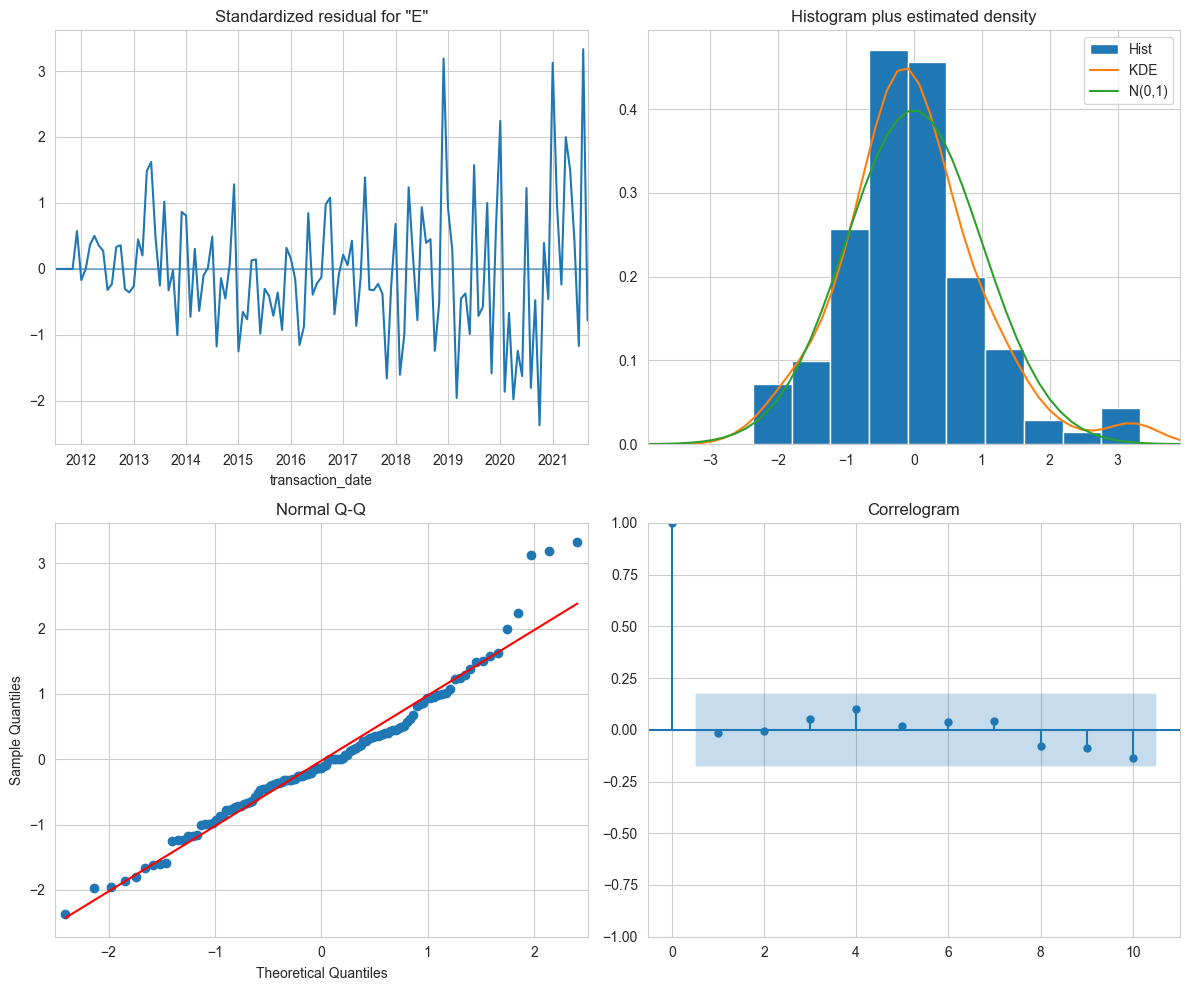

In [145]:
#Validate model with forecasts for test data
model = SARIMAX(train_cowlitz, order=(4, 1, 2), seasonal_order=(1, 0, [1], 12), enforce_invertibility=False,
                enforce_stationarity=False).fit()
evaluate_model(model)

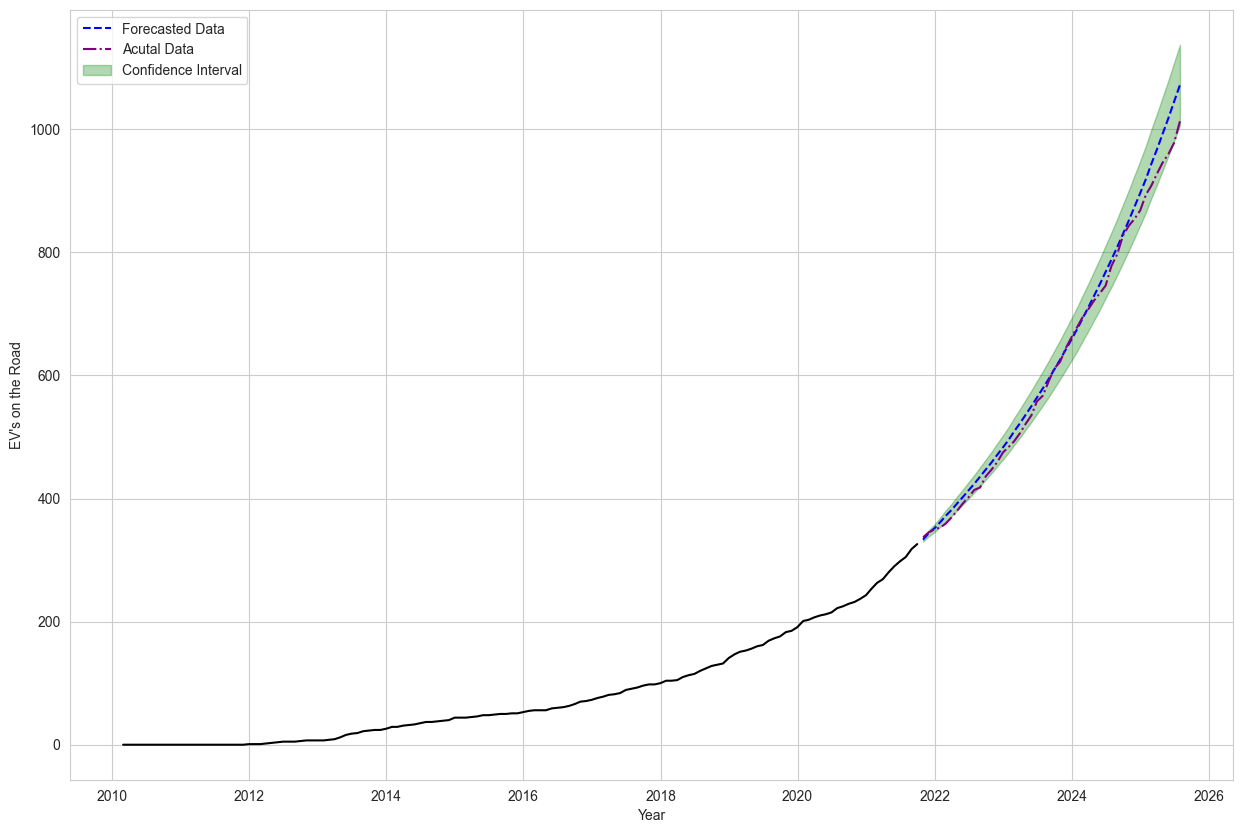

In [146]:
df_cowlitz_forecast = get_forecast(model, train_cowlitz, test_cowlitz, plot=True)

c:\Users\Ali Sawah\Desktop\forecasting EV adoption and charging demand in Washington State\.venv_2\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                     EV's on the Road   No. Observations:                  186
Model:             SARIMAX(4, 1, 2)x(1, 0, [1], 12)   Log Likelihood                -446.328
Date:                              Tue, 19 Aug 2025   AIC                            910.657
Time:                                      21:52:21   BIC                            938.826
Sample:                                  02-28-2010   HQIC                           922.088
                                       - 07-31-2025                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0831      3.967      0.273      0.785      -6.693       8.859
ar.L2         -0.1558      4.659     -0.033      0.973      -9.287       8.976
ar.L3          0.0961      1.041      0.092      0.926      -1.945       2.137
ar.L4          0.0011      0.441      0.003      0.998      -0.864       0.866
ma.L1         10.1641    492.675      0.021      0.984    -955.462     975.790
ma.L2        -11.1083    490.383     -0.023      0.982    -972.242     950.025
ar.S.L12      -0.6059      0.594     -1.019      0.308      -1.771       0.559
ma.S.L12       0.5556      0.607      0.915      0.360      -0.634       1.745
sigma2         0.0888      7.842      0.011      0.991     -15.281      15.458
===================================================================================
Ljung-Box (L1) (Q):                   2.92   Jarque-Bera (JB):               127.88
Prob(Q):                              0.09   Prob(JB):                         0.00
Heteroskedasticity (H):              26.86   Skew:                             0.99
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

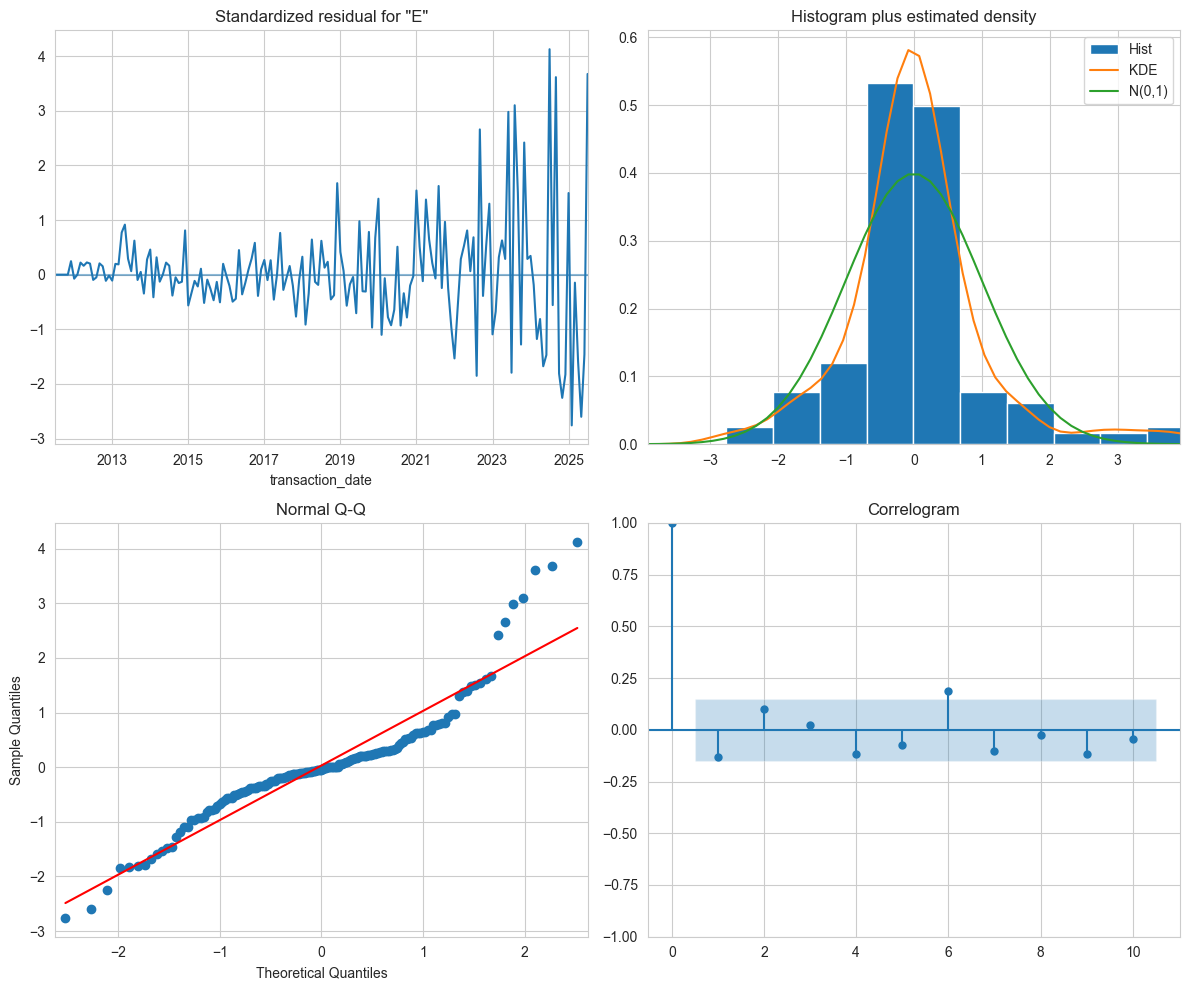

In [147]:
#Future Predictions
#Fitting model to all observed data
model = SARIMAX(county_information["Cowlitz"]["df"], order=(4, 1, 2), seasonal_order=(1, 0, [1], 12), enforce_invertibility=False,
                enforce_stationarity=False).fit()
evaluate_model(model)

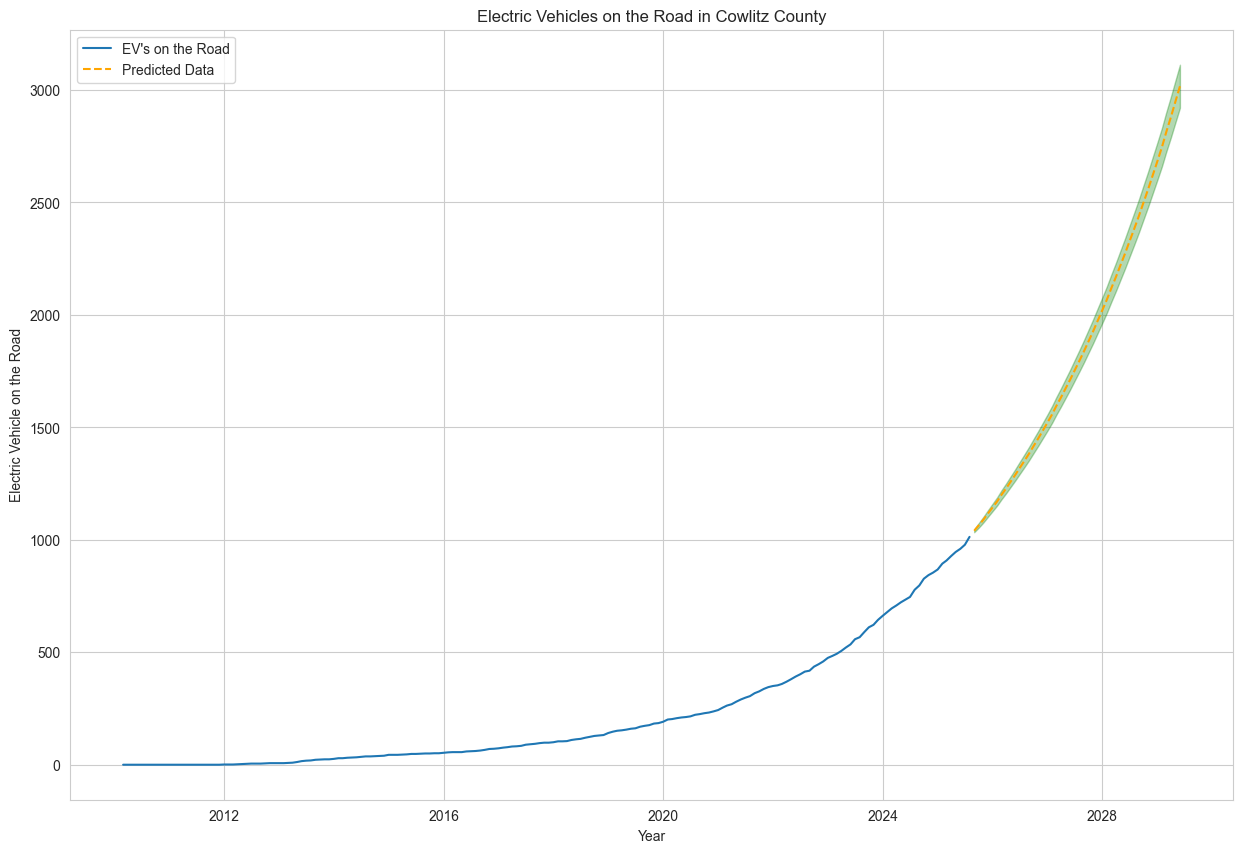

In [148]:
#Plotting & Saving Predictions
df_cowlitz_preds = get_predictions(model, county_information["Cowlitz"]["df"], test_cowlitz, "Cowlitz", plot=True)

In [149]:
#saving_predictions
county_information["Cowlitz"]["Predictions"] = df_cowlitz_preds

In [150]:
county_information.keys()

dict_keys(['King', 'Clark', 'Snohomish', 'Kitsap', 'Thurston', 'Cowlitz', 'Jefferson', 'Yakima', 'Island', 'Clallam'])

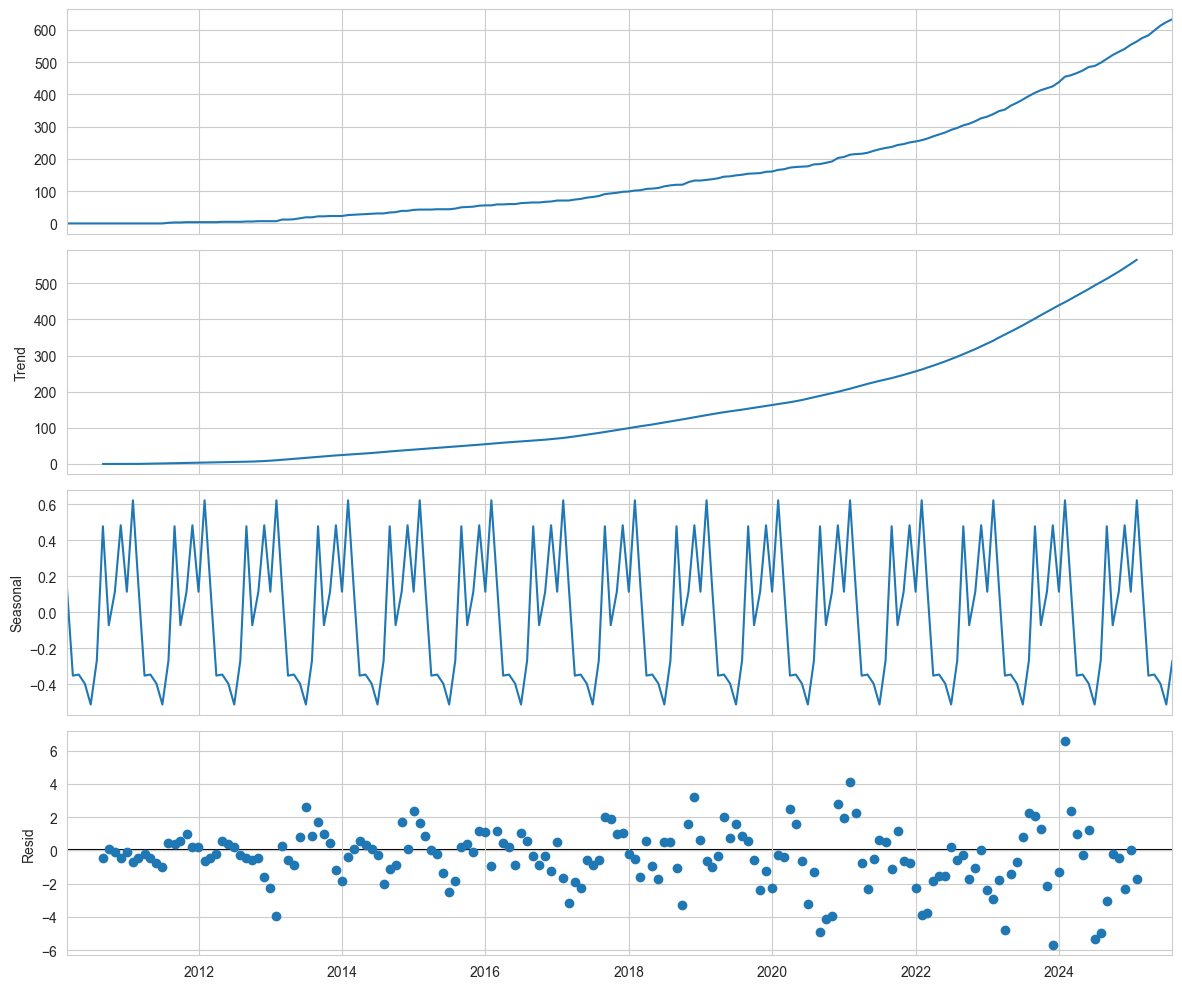

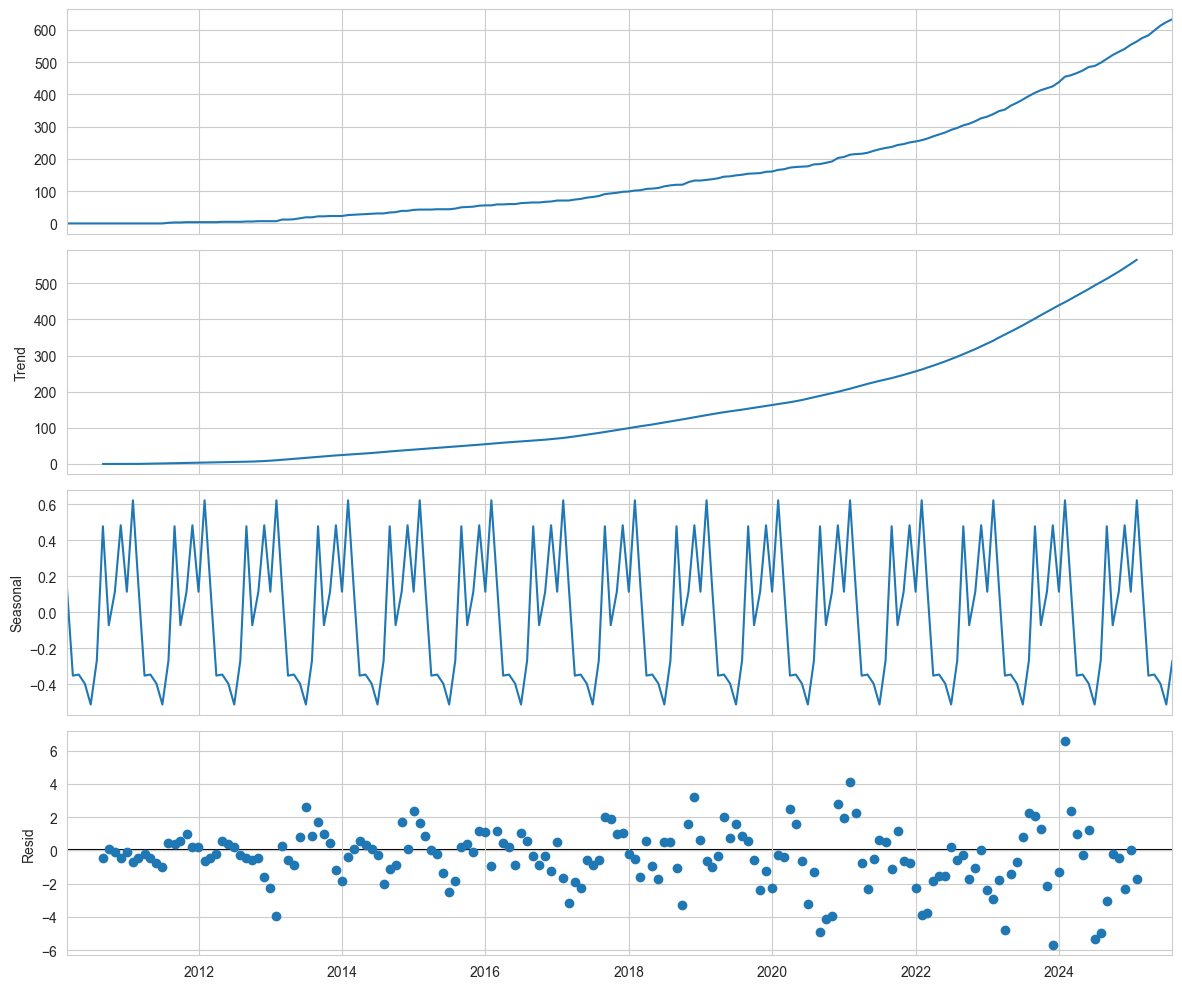

In [151]:
#Jefferson County
plt.rcParams["figure.figsize"] = (12,10)
decomp = tsa.seasonal_decompose(county_information["Jefferson"]["df"])
decomp.plot()

In [152]:
#train_test_split
train_jefferson, test_jefferson = train_test_split_ts(county_information["Jefferson"]["df"], 0.75, 0.25)

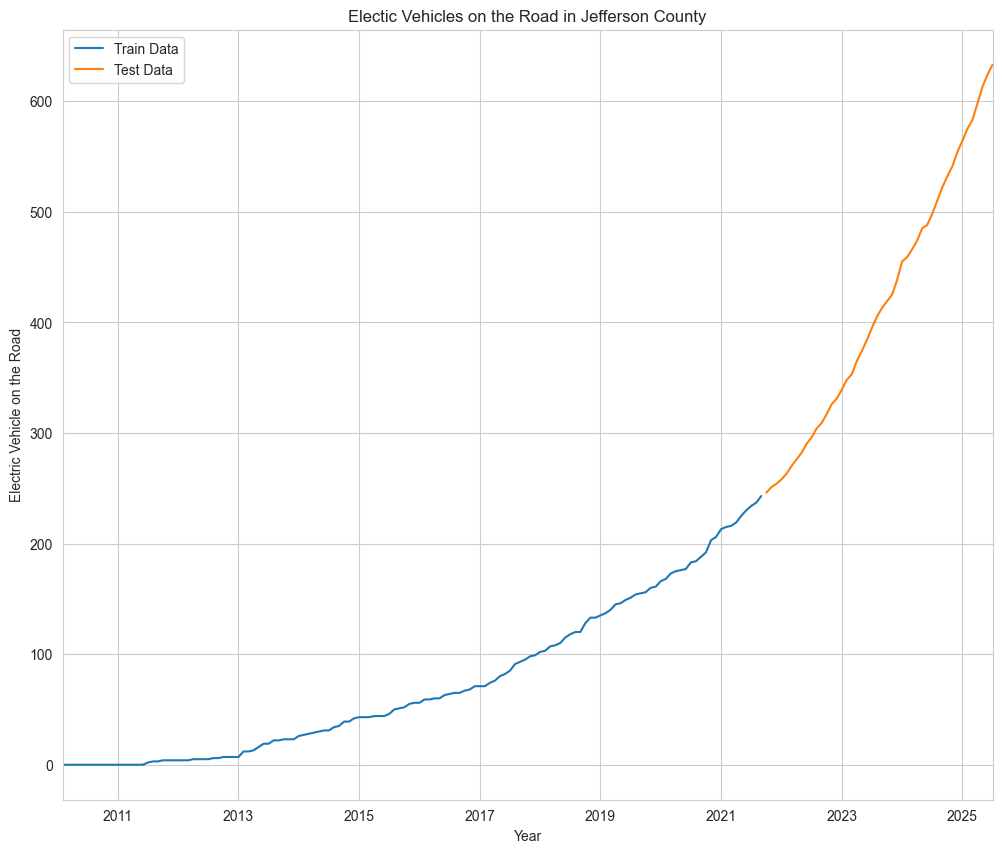

In [153]:
plot_train_test_split(train_jefferson, test_jefferson, "Jefferson")

In [154]:
#Finding best parameters
auto_model = pm.auto_arima(train_jefferson,start_p=0, start_q=0, d=1,
                           max_p=4, max_q=4, max_P=3, max_Q=3, start_P=0, start_Q=0, m=12, verbose=2)
auto_model.summary()

c:\Users\Ali Sawah\Desktop\forecasting EV adoption and charging demand in Washington State\.venv_2\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Ali Sawah\Desktop\forecasting EV adoption and charging demand in Washington State\.venv_2\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Ali Sawah\Desktop\forecasting EV adoption and charging demand in Washington State\.venv_2\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Ali Sawah\Desktop\forecasting EV adoption and charging demand in Washington State\.venv_2\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite'

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  140
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -266.119
Date:                Wed, 20 Aug 2025   AIC                            542.237
Time:                        21:44:48   BIC                            556.910
Sample:                    02-28-2010   HQIC                           548.200
                         - 09-30-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0466      0.092      0.506      0.613      -0.134       0.227
ar.L2          0.9493      0.093     10.181      0.000       0.767       1.132
ma.L1         -0.0059      0.123     -0.048      0.962      -0.247       0.235
ma.L2         -0.7862      0.125     -6.313      0.000      -1.030      -0.542
sigma2         2.6393      0.203     12.971      0.000       2.240       3.038
===================================================================================
Ljung-Box (L1) (Q):                   0.61   Jarque-Bera (JB):               102.26
Prob(Q):                              0.43   Prob(JB):                         0.00
Heteroskedasticity (H):               4.80   Skew:                             1.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       EV's on the Road   No. Observations:                  140
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -256.514
Date:                Wed, 20 Aug 2025   AIC                            523.029
Time:                        21:51:21   BIC                            537.592
Sample:                    02-28-2010   HQIC                           528.947
                         - 09-30-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0804      0.104      0.773      0.440      -0.124       0.284
ar.L2          0.9521      0.105      9.049      0.000       0.746       1.158
ma.L1         -0.1414    121.650     -0.001      0.999    -238.570     238.287
ma.L2         -0.8586    104.429     -0.008      0.993    -205.535     203.818
sigma2         2.4634    299.657      0.008      0.993    -584.853     589.780
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                61.35
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               3.76   Skew:                             0.93
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

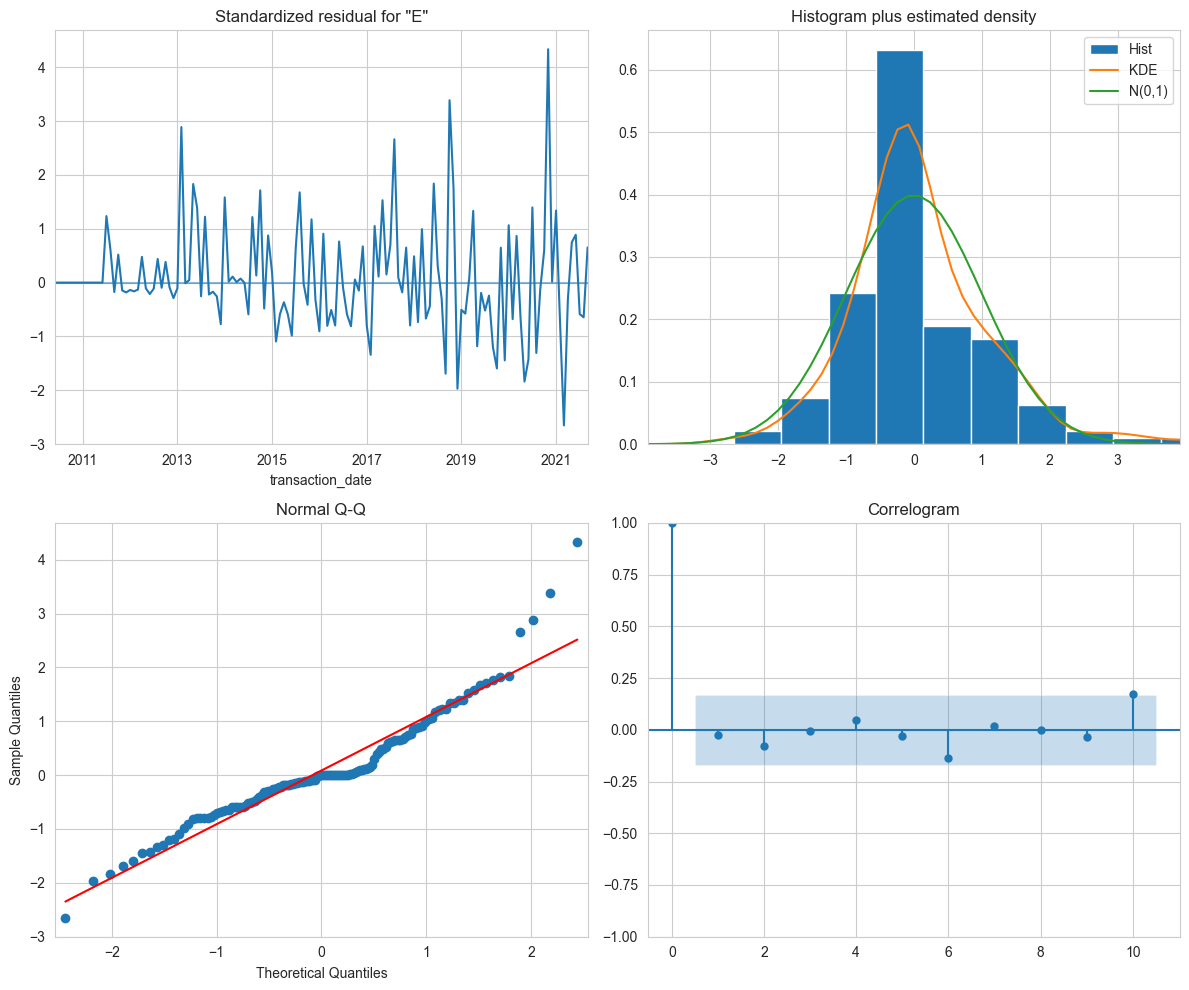

In [155]:
#validate model with forecasts for test data
model = SARIMAX(train_jefferson, order=(2, 1, 2), enforce_invertibility=False, enforce_stationarity=False).fit()
evaluate_model(model)

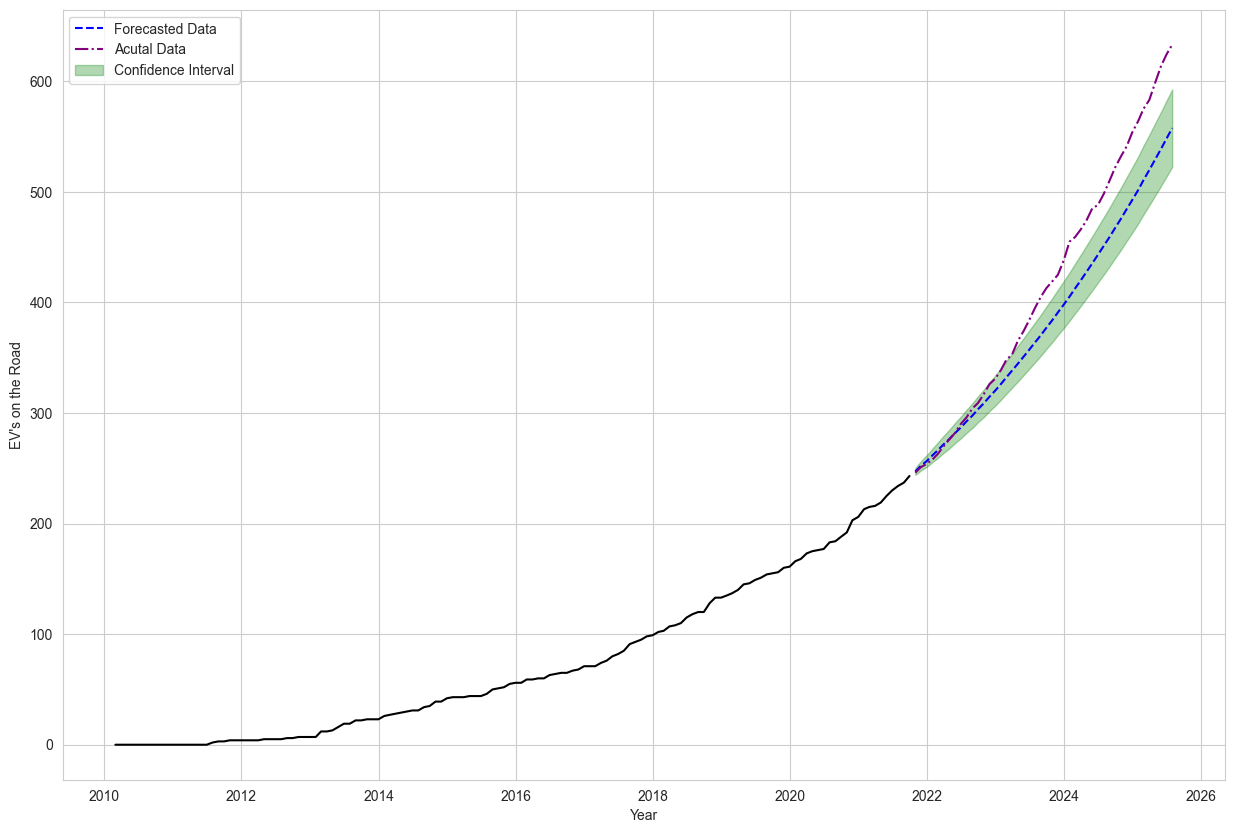

In [156]:
df_jefferson_forecast = get_forecast(model, train_jefferson, test_jefferson, plot=True)

In [1]:
#Future Predictions
#fitting model to all observed data
model = SARIMAX(county_information["Jefferson"]["df"],order=(2, 1, 2), enforce_invertibility=False, enforce_stationarity=False).fit()
evaluate_model(model)

NameError: name 'SARIMAX' is not defined